<a href="https://colab.research.google.com/github/SergioUNAM/miR29_GeneExpCancer/blob/master/miR_29_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install markdown
!pip install gseapy

# Análisis de datos de expresión génica de miR-29

Este notebook tiene como objetivo analizar datos de expresión génica relacionados con miR-29. A lo largo del análisis, se realizarán pasos de carga, limpieza, procesamiento y enriquecimiento funcional de los datos obtenidos de un archivo de Excel.

## Limpieza de los datos

### Importación de librerías

### Importación de librerías

En esta sección se importan las librerías esenciales para llevar a cabo el análisis de expresión génica relacionado con miR-29. Cada una de estas bibliotecas desempeña un rol fundamental en las diferentes etapas del análisis, que incluyen:

- **Manejo y análisis de datos**: `pandas` y `numpy` se utilizan para cargar, manipular y transformar datos tabulares y numéricos.
- **Solicitudes a APIs externas**: `requests` y `json` permiten realizar consultas a servicios como STRING y manejar respuestas en formato JSON.
- **Visualización**: Se emplean `matplotlib` y `seaborn` para la creación de gráficos y visualizaciones estadísticas avanzadas.
- **Pruebas estadísticas y machine learning**: `scipy.stats` ofrece pruebas t para comparar grupos, mientras que `sklearn` proporciona herramientas de reducción de dimensionalidad (PCA) y agrupamiento (K-means).
- **Análisis de redes**: `networkx` permite construir redes de interacción génica a partir de los datos de enriquecimiento funcional.
- **Configuraciones adicionales**: Se desactivan algunas advertencias innecesarias y se ajusta la visualización de datos largos en el entorno de notebook.

Estas herramientas son clave para llevar a cabo el procesamiento, análisis y representación visual de los resultados obtenidos en el estudio.

In [ ]:
!pip install markdown

# Importación de librerías esenciales para el análisis de expresión génica

import pandas as pd  # Manipulación y análisis de datos tabulares
import numpy as np   # Operaciones matemáticas y algebraicas avanzadas
import requests      # Realización de solicitudes HTTP a APIs externas
import json          # Manejo de datos en formato JSON
import re            # Uso de expresiones regulares para manipulación de texto
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones
import seaborn as sns  # Gráficos estadísticos y visualización avanzada

from scipy.stats import ttest_ind  # Prueba t para comparar grupos independientes
from sklearn.decomposition import PCA  # Reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA)
from sklearn.cluster import KMeans  # Algoritmo de agrupamiento K-means
import networkx as nx  # Construcción y análisis de redes de interacción génica

import warnings
warnings.filterwarnings('ignore')  # Ignorar advertencias de tipo usuario

from IPython.display import display, Markdown  # Mostrar contenido enriquecido en celdas de notebook

# Configuración de pandas para mostrar contenido largo en celdas sin truncar
pd.set_option('display.max_colwidth', 100)

### Carga del archivo de Excel y extracción de información

En esta sección se realiza la carga de un archivo de Excel que contiene los datos de Ct de diversas pruebas qPCR relacionadas con el análisis de miR-29. El proceso se divide en dos pasos fundamentales:

1. **Carga del archivo de Excel**  
   Se define una función llamada `cargar_datos_excel` que recibe como argumento la ruta del archivo. La función intenta cargar el archivo utilizando `pandas.read_excel` y maneja posibles errores, como:
   - **FileNotFoundError**: Si el archivo no se encuentra en la ruta especificada.
   - **Errores generales**: Cualquier otro error que pueda surgir durante la carga del archivo.  
   
   Si el archivo se carga correctamente, se muestra un mensaje de éxito; de lo contrario, se interrumpe la ejecución del programa.

2. **Extracción de información relevante**  
   La función `extraer_informacion` se encarga de extraer tres elementos importantes del DataFrame cargado:
   - **Nombres de las pruebas**: Corresponden a las distintas condiciones experimentales.
   - **Pozos**: Etiquetas de los pozos de la placa de qPCR.
   - **Genes objetivo**: Lista de los genes cuya expresión se analizará.

Finalmente, se muestran los resultados de la extracción en pantalla, confirmando que el proceso se ha llevado a cabo correctamente.

In [ ]:
# Definimos la ruta del archivo de Excel
ruta_archivo = "/content/drive/MyDrive/miR-29/data_mir-29_automatización.xlsx"

def cargar_datos_excel(ruta):
    """
    Carga un archivo de Excel y maneja posibles errores durante la lectura.

    Args:
        ruta (str): Ruta del archivo de Excel a cargar.

    Returns:
        DataFrame: DataFrame con los datos cargados si la operación es exitosa.
        None: Si ocurre algún error durante la carga.
    """
    display(Markdown("### Resultados de la extracción\n"))
    try:
        df = pd.read_excel(ruta, engine='openpyxl')
        display(Markdown("#### Archivo cargado exitosamente.\n"))
        return df
    except FileNotFoundError:
        display(Markdown((f"#### Error: El archivo '{ruta}' no fue encontrado.")))
    except Exception as e:
        display(Markdown(f"### Ocurrió un error al cargar el archivo: {e}"))
    return None

# Cargamos el archivo y verificamos el resultado
df = cargar_datos_excel(ruta_archivo)
if df is None:
    raise SystemExit("No se pudo cargar el archivo. Verifique la ruta y el formato.")

def extraer_informacion(df):
    """
    Extrae los nombres de las pruebas, etiquetas de los pozos y nombres de los genes.

    Args:
        df (DataFrame): DataFrame que contiene los datos.

    Returns:
        tuple: Tres listas que contienen los nombres de las pruebas, pozos y genes.
    """
    test_names = df.iloc[0].dropna().tolist()
    pozos = df.iloc[2:, 0].tolist()
    genes = df.iloc[2:, 1].tolist()
    return test_names, pozos, genes

# Extraemos los datos y los mostramos
test_names, pozos, genes = extraer_informacion(df)

display(Markdown(f"**Nombres de las pruebas realizadas: ({len(test_names)})**"))
display(Markdown(", ".join(test_names)))

# Convertir todos los elementos de genes a string, ignorando NaN
genes_str = [str(g) for g in genes if pd.notna(g)]

display(Markdown(f"\n**Genes objetivo analizados ({len(genes_str)})**"))
display(Markdown(", ".join(genes_str)))

### Resultados de la extracción


#### Archivo cargado exitosamente.


**Nombres de las pruebas realizadas: (6)**

7BSC-102, 7BSC-158, 3CM-161, 3CM-099, 3CM-146, 3CM-09


**Genes objetivo analizados (96)**

ACVR2A, ADAM12, ADAMTS59, AK3, BACE1, BAK1, BBC3, BCL2, BCL2L11, BMF, C5orf13, CD276, CDC42, CDK6, COL51A1, COL1A1, COL1A2, COL21A1, COL2A1, COL3A1, COL4A1, COL4A2, COL5A2, COL5A3, COL7A1, CTNNBIP1, DGKD, DICER1, DNAJB11, DNMT1, DNMT3A, DNMT3B, DUSP2, ELF2, ELN, EOMES, FBN1, FEM1B, FGA, FGB, FGG, FOXJ2, GLUL, GRN, HDAC4, HRK, IFI30, IREB2, ITGA11, LAMC1, LPL, MBTD1, MCL1, MMP15, MMP24, MYCN, NAV3, NID1, PCDHA12, PIK3R1, PMP22, PPM1D, PPP1R13B, PTEN, PXDN, RFL, S100B, SERPINB9, SESTD1, SFPQ, SP1, SPARC, SPRY, SRSF10, TBX21, TCL1A, TDG, TET1, TFAP2C, TGFB3, TNFAIP3, VEGFA, ZFP36, ZFP36L1, ACTB, B2M, GAPDH, HPRT1, RPLP0, HGDC, RTC, RTC, RTC, PPC, PPC, PPC

# Clasificación de pruebas y procesamiento de valores de Ct

En este segmento del código se realiza la clasificación de los datos de expresión génica basados en los valores de **Ct** (Threshold Cycle) obtenidos de un archivo de entrada.

## Pasos del proceso

1. **Identificación de columnas Ct**: Se identifican las columnas que contienen los valores de Ct mediante una búsqueda en la segunda fila del dataframe.
2. **Inicialización de dataframes**: Se crean dos dataframes vacíos, `controles_df` y `muestras_df`, para almacenar los datos clasificados.
3. **Definición de función de clasificación**:
   - La función `clasificar_test` clasifica cada prueba en **controles** o **muestras** según el prefijo del nombre de la prueba.
   - Si el nombre del test no coincide con ninguno de los prefijos esperados, la función devuelve `None` y la prueba es ignorada.
4. **Iteración sobre las columnas de Ct**:
   - Se recorre cada columna identificada como Ct.
   - Se extrae el nombre de la prueba y los valores de Ct.
   - Se crea un dataframe temporal que incluye los valores de Ct junto con el pozo y el gen objetivo correspondiente.
   - Se clasifica el dataframe temporal utilizando la función `clasificar_test`.
   - Según la clasificación, se concatena el dataframe temporal con `controles_df` o `muestras_df`.

## Salida esperada

Al finalizar el proceso, se obtienen dos dataframes:
- **`controles_df`**: Contiene las pruebas clasificadas como controles.
- **`muestras_df`**: Contiene las pruebas clasificadas como muestras.

In [ ]:
# Identificamos las columnas que contienen los valores de Ct
indice_ct = np.where(df.iloc[1] == "Cт")[0].tolist()

# Inicializamos los dataframes finales
controles_df = pd.DataFrame()
muestras_df = pd.DataFrame()

def clasificar_test(nombre_test, df_temp):
    """
    Clasifica un dataframe temporal basado en el prefijo del nombre del test.

    Args:
        nombre_test (str): Nombre de la prueba, usado para identificar su tipo.
        df_temp (DataFrame): DataFrame temporal con los datos procesados.

    Returns:
        str: "controles" si pertenece a controles, "muestras" si pertenece a muestras, None si no coincide con ninguna clasificación.
    """
    if nombre_test.startswith("7BSC"):
        return "controles"
    elif nombre_test.startswith("3CM"):
        return "muestras"
    return None  # Ignorar si no coincide

# Iteramos sobre los índices de las columnas de Ct
for indice in indice_ct:
    """
    Procesa y clasifica las columnas de Ct según los nombres de las pruebas.

    Por cada índice identificado como columna de Ct:
    - Extrae el nombre del test.
    - Obtiene los valores de Ct.
    - Crea un dataframe temporal con los valores procesados.
    - Clasifica el dataframe como controles o muestras según el nombre del test.
    """
    # Obtenemos el nombre de la prueba correspondiente
    nombre_test = df.iloc[0, indice]

    # Obtenemos los valores de Ct para la prueba actual
    valores_ct = df.iloc[2:, indice].tolist()

    # Creamos un dataframe temporal con los valores de Ct
    df_temp = pd.DataFrame({
        'test': [nombre_test] * len(valores_ct),
        'pozo': pozos,
        'target': genes,
        'ct': valores_ct
    })

    # Clasificamos el dataframe temporal
    clasificacion = clasificar_test(nombre_test, df_temp)
    if clasificacion == "controles":
        controles_df = pd.concat([controles_df, df_temp], ignore_index=True)
    elif clasificacion == "muestras":
        muestras_df = pd.concat([muestras_df, df_temp], ignore_index=True)


# Procesamiento de valores Ct indeterminados

Esta sección del código se encarga de procesar los valores de **Ct** en los dataframes de controles y muestras, reemplazando valores indeterminados y asegurando que la columna de Ct esté en formato numérico adecuado.

## Descripción del proceso

1. **Función `procesar_ct_column`**:
   - Reemplaza los valores `'Undetermined'` en la columna de Ct por un valor numérico predefinido.
   - Convierte la columna a tipo numérico, manejando posibles errores de conversión y coercionando los valores no numéricos a `NaN`.
   
2. **Argumentos de la función**:
   - `df`: DataFrame que contiene los datos a procesar.
   - `columna_ct`: Nombre de la columna que almacena los valores de Ct (por defecto, `'ct'`).
   - `valor_indeterminado`: Valor numérico que se utilizará para reemplazar los valores `'Undetermined'` (por defecto, `39`).

3. **Salida de la función**:
   - Devuelve el DataFrame con la columna Ct procesada y convertida a tipo numérico.

## Aplicación de la función

La función se aplica a los dataframes de controles y muestras (`controles_df` y `muestras_df`) para asegurar que los valores de Ct indeterminados sean reemplazados y que la columna Ct sea consistente en ambos dataframes.

In [ ]:
def procesar_ct_column(df, columna_ct='ct', valor_indeterminado=39):
    """
    Reemplaza valores 'Undetermined' por un valor específico y convierte la columna a tipo numérico.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna a procesar.
        columna_ct (str): Nombre de la columna que contiene los valores Ct.
        valor_indeterminado (int): Valor numérico a usar en lugar de 'Undetermined'.

    Returns:
        pd.DataFrame: DataFrame con la columna procesada.
    """
    # Reemplazamos valores 'Undetermined' por el valor dado
    df[columna_ct] = df[columna_ct].replace('Undetermined', valor_indeterminado)
    # Convertimos la columna a numérico, coercionando errores a NaN
    df[columna_ct] = pd.to_numeric(df[columna_ct], errors='coerce')
    return df

# Procesamos los DataFrames de controles y muestras
controles_df = procesar_ct_column(controles_df)
muestras_df = procesar_ct_column(muestras_df)

# Filtrado de controles de máquina y concatenación de datos

En esta sección del código se realiza el filtrado de los controles de máquina de los dataframes y la concatenación de los resultados para obtener un dataframe combinado que clasifica las filas según su tipo (control o muestra).

## Pasos del proceso

1. **Definición de la función `filtrar_controles_maquina`**:
   - La función recibe un dataframe, el nombre de la columna que contiene los nombres de los targets y una lista de controles de máquina a eliminar.
   - Si no se proporciona una lista de controles de máquina, se utiliza una lista por defecto: `['PPC', 'RTC']`.
   - Devuelve un dataframe sin las filas que contienen los controles de máquina.

2. **Filtrado de dataframes**:
   - Se aplica la función `filtrar_controles_maquina` a los dataframes `controles_df` y `muestras_df` para eliminar los controles de máquina.

3. **Identificación del tipo de fila**:
   - Se agrega una columna llamada `'tipo'` en ambos dataframes para indicar si cada fila corresponde a un **control** o una **muestra**.

4. **Concatenación de dataframes**:
   - Se concatenan los dataframes `controles_df` y `muestras_df` en un único dataframe llamado `df_concatenado`.
   - Se establece `ignore_index=True` para que el índice del dataframe concatenado sea continuo.

5. **Visualización de los primeros registros**:
   - Se imprime en consola una vista previa de los primeros registros del dataframe concatenado utilizando `head()`.

## Salida esperada

El dataframe concatenado debe contener todas las filas de controles y muestras, con una nueva columna que indique el tipo de cada fila.

In [ ]:
def filtrar_controles_maquina(df, columna_target='target', controles_maquina=None):
    """
    Filtra las filas de un DataFrame eliminando las que contienen controles de máquina.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos a filtrar.
        columna_target (str): Nombre de la columna que contiene los targets (por defecto, 'target').
        controles_maquina (list, opcional): Lista de nombres de controles de máquina a eliminar.
            Si no se proporciona, se utilizará la lista por defecto: ['PPC', 'RTC'].

    Returns:
        pd.DataFrame: DataFrame filtrado sin los controles de máquina.
    """
    # Lista por defecto de controles de máquina si no se proporciona
    if controles_maquina is None:
        controles_maquina = ['PPC', 'RTC']

    # Filtrado del DataFrame eliminando los controles de máquina
    return df[~df[columna_target].isin(controles_maquina)]


# Filtrar los controles de máquina de los DataFrames
controles_df = filtrar_controles_maquina(controles_df)
muestras_df = filtrar_controles_maquina(muestras_df)

# Añadir columna para identificar el tipo de cada fila
controles_df = controles_df.assign(tipo='Control')
muestras_df = muestras_df.assign(tipo='Muestra')

# Análisis de expresión génica mediante Ct y Fold Change

En esta sección se realiza el análisis de expresión génica mediante el cálculo de valores de **Ct** (Threshold Cycle) y **Fold Change** para las muestras y controles. Se incluyen los cálculos de ΔCt, ΔΔCt y la comparación entre grupos.

## Definición del gen de referencia

Se utiliza **GAPDH** como gen de referencia para normalizar los valores de expresión.

## Cálculo de promedios de Ct

1. **Promedio por target**: Se calcula el promedio de Ct para cada target en controles y muestras.
2. **Promedio global**: Se obtiene el promedio global de Ct en ambos grupos.
3. **Promedio de Ct del gen de referencia**: Se extrae el promedio de Ct para el gen de referencia **GAPDH**.

## Cálculo de ΔCt

ΔCt se calcula como la diferencia entre los valores de Ct y el promedio global de Ct. Además, se normaliza respecto al gen de referencia:

- **ΔCt normalizado por GAPDH**: Diferencia entre Ct y el promedio de Ct del gen **GAPDH**.
- **Promedio de ΔCt**: Se calcula el promedio de ΔCt en controles y muestras, tanto global como normalizado por GAPDH.

## Cálculo de ΔΔCt y Fold Change

1. **ΔΔCt**: Se obtiene como la diferencia entre ΔCt y el promedio de ΔCt.
2. **Fold Change**: Se calcula usando la fórmula:

   
   $$\text{Fold Change} = 2^{-\Delta \Delta Ct}$$

Se calcula el **Fold Change** global y normalizado por **GAPDH**.

## Comparación entre controles y muestras

Se realiza una comparación directa entre los valores de Ct de controles y muestras:

1. **ΔCt entre controles y muestras**: Se calcula la diferencia entre los valores de Ct de ambos grupos.
2. **ΔΔCt y Fold Change**: Se calculan estos valores para la comparación entre grupos, tanto global como normalizado por el gen de referencia.

## Salida esperada

El dataframe resultante contiene los valores de Ct, ΔCt, ΔΔCt y Fold Change para cada target, permitiendo evaluar la diferencia de expresión entre controles y muestras.

In [ ]:
# Definimos el gen de referencia a utilzar

gen_referencia = 'GAPDH'

# --- Cálculo de promedios de Ct ---
# Calculamos los promedios de Ct por gen para controles y muestras
resumen_controles = controles_df.groupby('target')['ct'].mean().reset_index()
resumen_muestras = muestras_df.groupby('target')['ct'].mean().reset_index()

# Calculamos el promedio global de los promedios de Ct
promedio_ct_muestras = resumen_muestras['ct'].mean()
promedio_ct_controles = resumen_controles['ct'].mean()

# Calculamos el promedio de Ct para el gen GAPDH en muestras y controles
promedio_ct_muestras_gen_ref = resumen_muestras.loc[resumen_muestras['target'] == gen_referencia, 'ct'].values[0]
promedio_ct_controles_gen_ref = resumen_controles.loc[resumen_controles['target'] == gen_referencia, 'ct'].values[0]

print(f"Promedio de los promedios de ct en muestras: {promedio_ct_muestras}\n")
print(f"Promedio de los promedios de ct en controles: {promedio_ct_controles}\n")
print(f"Promedio ct para el gen {gen_referencia} en muestras: {promedio_ct_muestras_gen_ref}\n")
print(f"Promedio ct para el gen {gen_referencia} en controles: {promedio_ct_controles_gen_ref}\n")

# --- Cálculo de ΔCt ---
# Agregamos ΔCt (diferencia entre Ct y el promedio global de Ct) a los dataframes
resumen_muestras['delta_ct'] = resumen_muestras['ct'] - promedio_ct_muestras
resumen_controles['delta_ct'] = resumen_controles['ct'] - promedio_ct_controles

resumen_muestras[f'delta_ct_{gen_referencia}'] = resumen_muestras['ct'] - promedio_ct_muestras_gen_ref
resumen_controles[f'delta_ct_{gen_referencia}'] = resumen_controles['ct'] - promedio_ct_controles_gen_ref

# Calculamos el promedio de ΔCt
promedio_delta_ct_muestras = resumen_muestras['delta_ct'].mean()
promedio_delta_ct_controles = resumen_controles['delta_ct'].mean()
promedio_delta_ct_muestras_gen_ref = resumen_muestras[f'delta_ct_{gen_referencia}'].mean()
promedio_delta_ct_controles_gen_ref = resumen_controles[f'delta_ct_{gen_referencia}'].mean()

print(f"Promedio de ΔCt en muestras: {promedio_delta_ct_muestras}\n")
print(f"Promedio de ΔCt en controles: {promedio_delta_ct_controles}\n")
print(f"Promedio de ΔCt en muestras normalizado por {gen_referencia}: {promedio_delta_ct_muestras_gen_ref}\n")
print(f"Promedio de ΔCt en controles normalizado por {gen_referencia}: {promedio_delta_ct_controles_gen_ref}\n")

# --- Cálculo de ΔΔCt y Fold Change ---
# Agregamos ΔΔCt (diferencia entre ΔCt y el promedio de ΔCt)
resumen_muestras['delta_delta_ct'] = resumen_muestras['delta_ct'] - promedio_delta_ct_muestras
resumen_controles['delta_delta_ct'] = resumen_controles['delta_ct'] - promedio_delta_ct_controles
resumen_muestras[f'delta_delta_ct_{gen_referencia}'] = resumen_muestras[f'delta_ct_{gen_referencia}'] - promedio_delta_ct_muestras_gen_ref
resumen_controles[f'delta_delta_ct_{gen_referencia}'] = resumen_controles[f'delta_ct_{gen_referencia}'] - promedio_delta_ct_controles_gen_ref

# Calculamos el Fold Change para cada gen
resumen_muestras['fold_change'] = 2 ** (-resumen_muestras['delta_delta_ct'])
resumen_controles['fold_change'] = 2 ** (-resumen_controles['delta_delta_ct'])
resumen_muestras[f'fold_change_{gen_referencia}'] = 2 ** (-resumen_muestras[f'delta_delta_ct_{gen_referencia}'])
resumen_controles[f'fold_change_{gen_referencia}'] = 2 ** (-resumen_controles[f'delta_delta_ct_{gen_referencia}'])

# --- Comparación entre controles y muestras ---
# Combinamos los resultados de controles y muestras
controles_vs_muestras = pd.DataFrame()
controles_vs_muestras['target'] = resumen_muestras['target']
controles_vs_muestras['delta_ct'] = resumen_muestras['ct'] - resumen_controles['ct']
controles_vs_muestras[f'delta_ct_{gen_referencia}'] = resumen_muestras[f'delta_ct_{gen_referencia}'] - resumen_controles[f'delta_ct_{gen_referencia}']

# Calculamos el promedio de ΔCt entre controles y muestras
promedio_delta_ct_controles_vs_muestras = controles_vs_muestras['delta_ct'].mean()
print(f"Promedio de ΔCt entre controles y muestras: {promedio_delta_ct_controles_vs_muestras}\n")
promedio_delta_ct_gen_ref_controles_vs_muestras = controles_vs_muestras[f'delta_ct_{gen_referencia}'].mean()
print(f"Promedio de ΔCt entre controles y muestras normalizado por {gen_referencia}: {promedio_delta_ct_gen_ref_controles_vs_muestras}\n")

# Calculamos ΔΔCt y Fold Change para controles vs muestras
controles_vs_muestras['delta_delta_ct'] = controles_vs_muestras['delta_ct'] - promedio_delta_ct_controles_vs_muestras
controles_vs_muestras[f'delta_delta_ct_{gen_referencia}'] = controles_vs_muestras[f'delta_ct_{gen_referencia}'] - promedio_delta_ct_gen_ref_controles_vs_muestras
controles_vs_muestras['fold_change'] = 2 ** (-controles_vs_muestras['delta_delta_ct'])
controles_vs_muestras[f'fold_change_{gen_referencia}'] = 2 ** (-controles_vs_muestras[f'delta_delta_ct_{gen_referencia}'])

controles_vs_muestras.head()

Promedio de los promedios de ct en muestras: 36.75727595223321

Promedio de los promedios de ct en controles: 37.45869485007392

Promedio ct para el gen GAPDH en muestras: 36.52773475646973

Promedio ct para el gen GAPDH en controles: 38.055070877075195

Promedio de ΔCt en muestras: 7.894919286223335e-16

Promedio de ΔCt en controles: 2.052679014418067e-15

Promedio de ΔCt en muestras normalizado por GAPDH: 0.22954119576348198

Promedio de ΔCt en controles normalizado por GAPDH: -0.596376027001275

Promedio de ΔCt entre controles y muestras: -0.7014188978407118

Promedio de ΔCt entre controles y muestras normalizado por GAPDH: 0.825917222764757



,target,delta_ct,delta_ct_GAPDH,delta_delta_ct,delta_delta_ct_GAPDH,fold_change,fold_change_GAPDH
0,ACTB,-0.473423,1.053913,0.227996,0.227996,0.853820,0.853820
1,ACVR2A,-1.581594,-0.054257,-0.880175,-0.880175,1.840598,1.840598
2,ADAM12,0.021954,1.549290,0.723372,0.723372,0.605680,0.605680
3,ADAMTS59,1.077201,2.604537,1.778620,1.778620,0.291462,0.291462
4,AK3,-4.099052,-2.571716,-3.397634,-3.397634,10.538762,10.538762


# Consulta de interacciones génicas y exportación para Cytoscape

Este segmento del código realiza una consulta a la base de datos de **STRING** para obtener interacciones génicas asociadas a una lista de genes subexpresados. Posteriormente, genera un grafo visual de las interacciones y exporta los resultados en un formato compatible con **Cytoscape**.

## Pasos del proceso

1. **Definición de parámetros**:
   - `organismo`: Identificador de **Homo sapiens** en STRING (9606).
   - `required_score`: Umbral de confianza mínimo (700) para considerar las interacciones relevantes.

2. **Construcción de la URL de consulta**:
   - Se construye la URL utilizando los identificadores de los genes subexpresados, separados por `'%0d'` como exige la API de STRING.
   
3. **Ejecución de la consulta**:
   - Se realiza una solicitud GET a la API de STRING.
   - Si la solicitud es exitosa (código 200), se convierte la respuesta a formato JSON.
   - Si la consulta falla, se muestra un mensaje de error y se inicializa una lista vacía.

4. **Conversión de datos a DataFrame**:
   - Si se obtienen datos, se convierte la respuesta JSON a un **DataFrame** que contiene las interacciones génicas con las columnas `preferredName_A`, `preferredName_B` y `score`.

5. **Creación del grafo de interacciones**:
   - Se crea un grafo utilizando `networkx`, donde:
     - Cada nodo representa un gen.
     - Cada arista representa una interacción entre dos genes con un peso basado en el puntaje de confianza.
   - El grafo se dibuja utilizando `matplotlib`, con disposición de nodos `spring_layout` y un formato visual claro.

6. **Exportación para Cytoscape**:
   - Se exporta el **DataFrame** con las columnas `preferredName_A` y `preferredName_B` en formato **TSV** (separado por tabuladores), sin encabezados ni índices.
   - El archivo se guarda en el directorio `./cytoscape` con el nombre `interacciones_para_cytoscape.tsv`.

## Salida esperada

1. **Visualización del grafo**: Se genera una red visual que muestra las interacciones entre los genes subexpresados.
2. **Archivo exportado**: Se crea un archivo llamado `interacciones_para_cytoscape.tsv`, que puede ser importado directamente en **Cytoscape** para visualizar y analizar la red de interacciones génicas.

In [ ]:
# --- Filtrado por Fold Change normal ---
# Genes sobreexpresados (Fold Change >= 2)
df_genes_sobreexpresados = controles_vs_muestras[['target', 'fold_change']][controles_vs_muestras['fold_change'] >= 2].reset_index(drop=True)
lista_sobreexpresion = df_genes_sobreexpresados['target'].tolist()

df_genes_sobreexpresados_gen_ref = controles_vs_muestras[['target', f'fold_change_{gen_referencia}']][controles_vs_muestras[f'fold_change_{gen_referencia}'] >= 2].reset_index(drop=True)
lista_sobreexpresion_gen_ref = df_genes_sobreexpresados_gen_ref['target'].tolist()

# Genes estables (1 <= Fold Change < 2)
df_genes_estables = controles_vs_muestras[['target', 'fold_change']][(controles_vs_muestras['fold_change'] < 2) & (controles_vs_muestras['fold_change'] >= 1)].reset_index(drop=True)
lista_estables = df_genes_estables['target'].tolist()

# Genes subexpresados (Fold Change < 1)
df_genes_subexpresados = controles_vs_muestras[['target', 'fold_change']][controles_vs_muestras['fold_change'] < 1].reset_index(drop=True)
lista_subexpresados = df_genes_subexpresados['target'].tolist()

# Concatenar los tres DataFrames
df_genes_concatenados = pd.concat(
    [df_genes_subexpresados, df_genes_estables, df_genes_sobreexpresados],
    axis=0,  # Concatenar filas (por defecto)
    ignore_index=True  # Reiniciar los índices del DataFrame resultante
)

# Agregar una columna para identificar el estado de expresión
df_genes_concatenados['estado'] = ['Subexpresado'] * len(df_genes_subexpresados) + \
                                  ['Estable'] * len(df_genes_estables) + \
                                  ['Sobreexpresado'] * len(df_genes_sobreexpresados)


# Consulta de interacciones génicas utilizando STRING

Este segmento del código realiza una consulta a la base de datos de **STRING** para obtener las interacciones génicas asociadas a una lista de genes subexpresados. El objetivo es construir una red de interacciones que permita visualizar y analizar posibles relaciones funcionales entre los genes.

## Descripción del proceso

1. **Definición de parámetros**:
   - `organismo`: Se establece como **9606**, el identificador para *Homo sapiens* en STRING.
   - `required_score`: Umbral de confianza para considerar las interacciones relevantes (en este caso, 700).
   
2. **Construcción de la URL de consulta**:
   - Los identificadores de los genes subexpresados se separan por `'%0d'` (formato requerido por la API de STRING).
   - Se construye la URL de consulta incluyendo los parámetros `identifiers`, `species` y `required_score`.

3. **Ejecución de la consulta**:
   - Se realiza una solicitud GET a la API de STRING utilizando `requests`.
   - Si la consulta es exitosa (código de estado 200), se convierte la respuesta en formato JSON.
   - Si la consulta falla, se imprime el código de error y se inicializa una lista vacía.

4. **Conversión de datos a DataFrame**:
   - Si se obtienen datos, se crea un **DataFrame** con las interacciones génicas.
   - Se imprime un mensaje de éxito y una vista previa de las primeras filas del DataFrame.
   - Si no hay datos, se imprime un mensaje indicando que no se puede crear el DataFrame.

## Salida esperada

- Si la consulta es exitosa, se obtiene un **DataFrame** que contiene las interacciones génicas relevantes, mostrando información como el tipo de interacción, el puntaje de confianza y los genes involucrados.
- Si no se obtienen resultados, se informa al usuario que no hay datos disponibles para procesar.

Consulta exitosa. Total de interacciones: 46
DataFrame creado con éxito. Primeras filas:


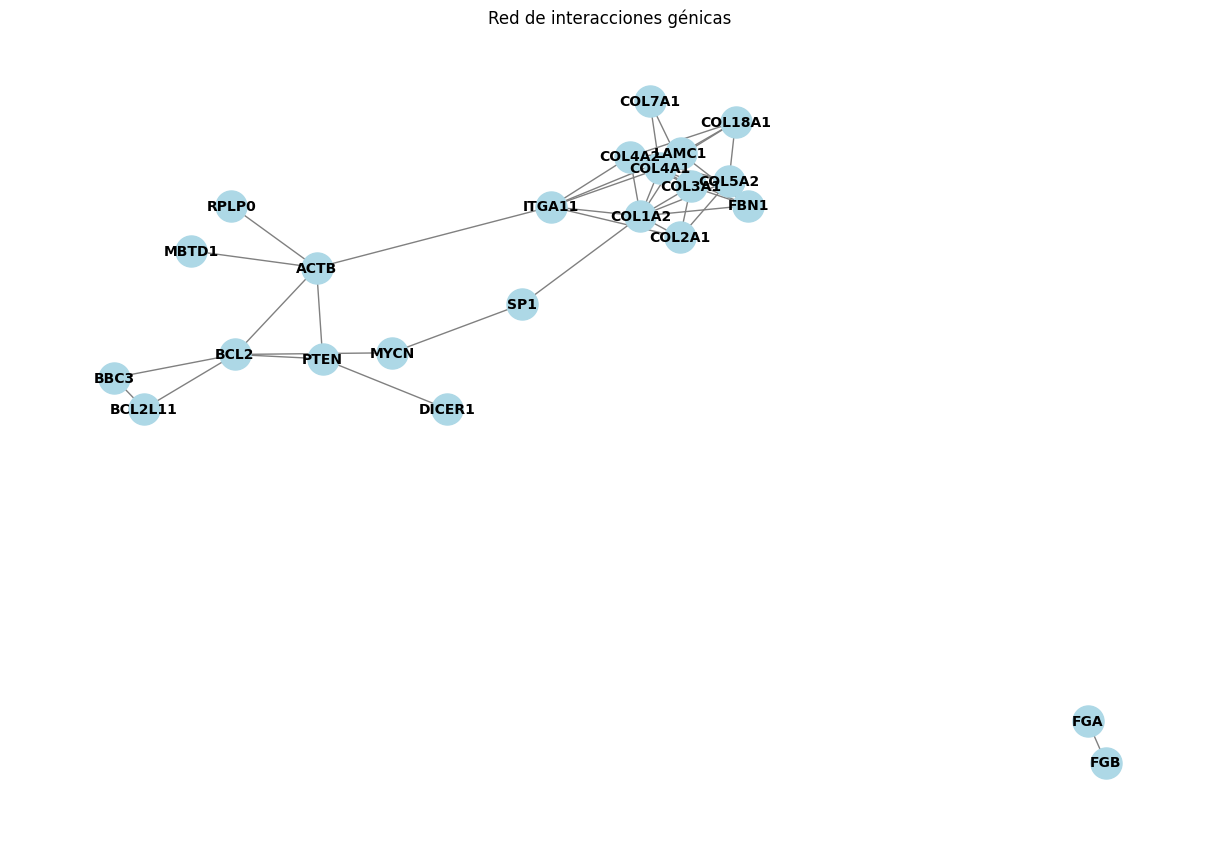

Archivo exportado con éxito: interacciones_para_cytoscape.csv


In [ ]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt

# Lista de genes
organismo = "9606"  # Homo sapiens
required_score = 700  # Umbral de confianza (opcional)

# Construir los identificadores separados por '%0d'
identificadores = "%0d".join(lista_subexpresados)

# URL de la consulta a STRING
url = (
    f"https://string-db.org/api/json/network?"
    f"identifiers={identificadores}&species={organismo}&required_score={required_score}"
)

# Realizar la consulta
response = requests.get(url)

if response.status_code == 200:
    datos = response.json()
    print("Consulta exitosa. Total de interacciones:", len(datos))
else:
    print("Error en la consulta:", response.status_code)
    datos = []

# Convertir datos a DataFrame
if datos:
    df_interacciones = pd.DataFrame(datos)
    print("DataFrame creado con éxito. Primeras filas:")
    # print(df_interacciones.head())

    # Crear el grafo de interacciones
    G = nx.Graph()

    for _, fila in df_interacciones.iterrows():
        G.add_edge(fila['preferredName_A'], fila['preferredName_B'], weight=fila['score'])

    # Dibujar el grafo
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Disposición de nodos
    nx.draw(
        G, pos, with_labels=True, node_size=500, node_color="lightblue",
        font_size=10, font_weight="bold", edge_color="gray"
    )
    plt.title("Red de interacciones génicas")
    plt.show()


    df_interacciones[['preferredName_A', 'preferredName_B']].to_csv("./interacciones_para_cytoscape.tsv", sep='\t', header=False, index=False)
    print("Archivo exportado con éxito: interacciones_para_cytoscape.csv")

else:
    print("No hay datos para convertir en DataFrame.")



# Anotación de genes y visualización de niveles de expresión

En esta sección se realiza la anotación de los genes con información de **Ensembl**, así como la generación de un gráfico que muestra la distribución de los niveles de expresión génica (subexpresado, estable y sobreexpresado).

## Anotación de genes

### Proceso de anotación:

1. **Función `add_ensembl_info_batch`**:
   - Consulta los IDs y descripciones de Ensembl para cada gen en lotes utilizando la API de **Ensembl REST**.
   - Los resultados se almacenan en dos nuevas columnas: `'ensembl_id'` y `'description'`.

2. **Parámetros de la función**:
   - `df`: DataFrame que contiene una columna `'target'` con los nombres de los genes.
   - `batch_size`: Número de genes a consultar por lote (valor por defecto: 50).

3. **Salida**:
   - Retorna el DataFrame original con las columnas adicionales `'ensembl_id'` y `'description'`.

4. **Aplicación de la función**:
   - Se aplica la función a tres DataFrames independientes:
     - `df_genes_subexpresados`
     - `df_genes_estables`
     - `df_genes_sobreexpresados`


In [ ]:

def add_ensembl_info_batch(df, batch_size=50):
    """
    Agrega columnas con IDs de Ensembl y descripciones usando consultas en lotes.

    Args:
        df (pd.DataFrame): DataFrame que contiene una columna 'target' con nombres de genes.
        batch_size (int): Número de genes a consultar por lote.

    Returns:
        pd.DataFrame: DataFrame con las columnas adicionales 'ensembl_id' y 'description'.
    """
    base_url = "https://rest.ensembl.org"
    headers = {"Content-Type": "application/json"}

    # Dividir genes en lotes
    targets = df['target'].tolist()
    batches = [targets[i:i + batch_size] for i in range(0, len(targets), batch_size)]

    ids = []
    descriptions = []

    # Procesar cada lote
    for batch in batches:
        response = requests.post(
            f"{base_url}/lookup/symbol/homo_sapiens",
            headers=headers,
            json={"symbols": batch}
        )
        if response.status_code == 200:
            data = response.json()
            for gene in batch:
                gene_data = data.get(gene, {})
                ids.append(gene_data.get('id', 'Not found'))
                descriptions.append(gene_data.get('description', 'Not found'))
        else:
            ids.extend(['Not found'] * len(batch))
            descriptions.extend(['Not found'] * len(batch))

    # Agregar columnas al DataFrame
    df['ensembl_id'] = ids
    df['description'] = descriptions
    return df

df_genes_subexpresados = add_ensembl_info_batch(df_genes_subexpresados)
df_genes_estables = add_ensembl_info_batch(df_genes_estables)
df_genes_sobreexpresados = add_ensembl_info_batch(df_genes_sobreexpresados)



## Visualización de niveles de expresión

### Pasos del proceso:

1. **Combinación de DataFrames**:
   - Se combinan los tres DataFrames anotados en uno solo, añadiendo una columna `'expression_level'` que identifica el nivel de expresión de cada gen:
     - `'Subexpresado'`
     - `'Estable'`
     - `'Sobreexpresado'`

2. **Conteo de frecuencias**:
   - Se realiza un conteo de la frecuencia de genes para cada nivel de expresión utilizando `value_counts()`.

3. **Configuración del estilo**:
   - Se utiliza **Seaborn** para definir un estilo minimalista y un tamaño de texto adecuado para presentaciones.

4. **Creación del gráfico de barras**:
   - Se genera un gráfico de barras horizontal con etiquetas de frecuencia al final de cada barra.
   - Se personalizan el título, los ejes y las líneas de la cuadrícula para mejorar la presentación del gráfico.

5. **Salida esperada**:
   - Un gráfico de barras horizontal titulado **"Distribución de Niveles de Expresión (Horizontal)"** que muestra el número de genes en cada nivel de expresión.
   - Un mensaje en consola con el conteo exacto de genes para cada categoría:
     ```
     Se encontraron los siguientes niveles de expresión:
     - Subexpresado: <número> genes
     - Estable: <número> genes
     - Sobreexpresado: <número> genes
     ```

Se encontraron los siguientes niveles de expresión:
 - Subexpresado: 49 genes
 - Estable: 29 genes
 - Sobreexpresado: 12 genes



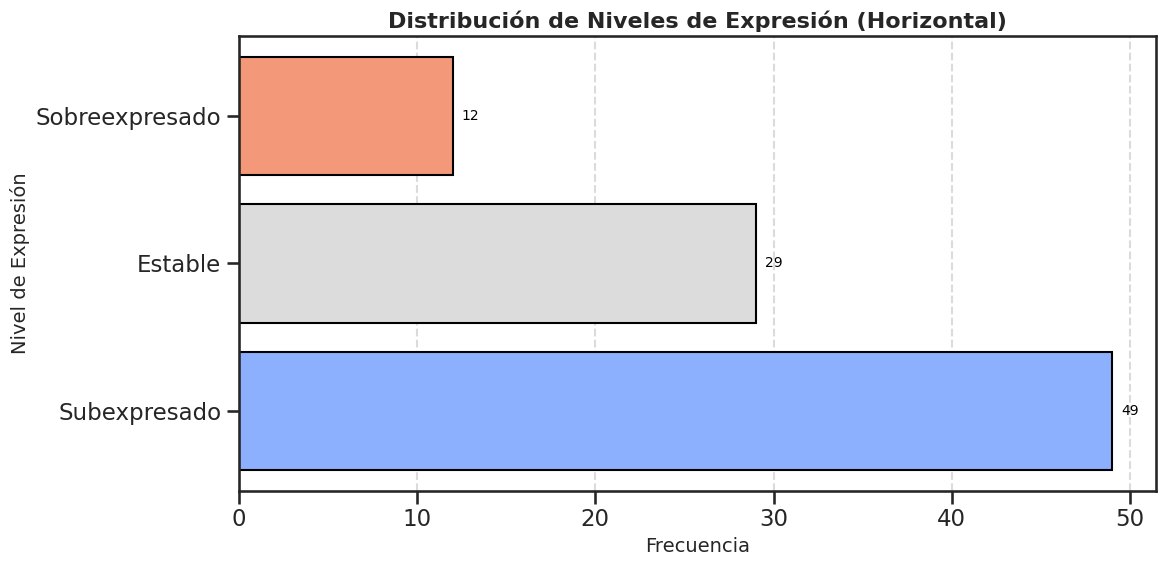

In [ ]:
# Combinar los DataFrames en uno solo
# Agregar la columna 'expression_level'
df_genes_subexpresados['expression_level'] = "Subexpresado"
df_genes_estables['expression_level'] = "Estable"
df_genes_sobreexpresados['expression_level'] = "Sobreexpresado"

df_combined_expresion = pd.concat([df_genes_subexpresados, df_genes_estables, df_genes_sobreexpresados])

# Contar la frecuencia de los niveles de expresión
expression_counts = df_combined_expresion['expression_level'].value_counts()

# Configurar el estilo general
sns.set_context("talk")  # Tamaño de texto ideal para presentaciones o papers
sns.set_style("ticks")  # Estilo minimalista con ejes visibles

# Crear la figura
# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras horizontal
bars = plt.barh(
    expression_counts.index,
    expression_counts.values,
    color=sns.color_palette("coolwarm", len(expression_counts)),
    edgecolor="black"
)

# Añadir etiquetas de frecuencia al final de las barras
for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(xval)}",
        ha="left",
        va="center",
        fontsize=10,
        color="black"
    )

print(f"Se encontraron los siguientes niveles de expresión:\n - Subexpresado: {expression_counts['Subexpresado']} genes\n - Estable: {expression_counts['Estable']} genes\n - Sobreexpresado: {expression_counts['Sobreexpresado']} genes\n")

# Personalizar el gráfico
plt.title("Distribución de Niveles de Expresión (Horizontal)", fontsize=16, weight="bold")
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Nivel de Expresión", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Ajustar el diseño para evitar recortes
plt.tight_layout()
plt.show()


# Visualización de Fold Change por nivel de expresión

Este segmento de código genera gráficos de barras separados para cada nivel de expresión génica, mostrando el **Fold Change** de los genes agrupados por nivel.

## Descripción del proceso

1. **Identificación de niveles únicos**:
   - Se extraen los niveles únicos de la columna `'expression_level'` del DataFrame `df_combined_expresion`.
   - El número total de niveles se almacena en `num_levels`.

2. **Configuración de la figura**:
   - Se crea una figura con subplots, utilizando una fila por cada nivel de expresión.
   - La figura tiene un tamaño proporcional al número de niveles, ajustado mediante `figsize=(8, 5 * num_levels)`.

3. **Manejo de casos especiales**:
   - Si solo hay un nivel de expresión, `axes` no será una lista, por lo que se convierte en una lista para unificar el manejo en el bucle.

4. **Generación de gráficos de barras**:
   - Se recorre cada nivel de expresión único y se filtra el DataFrame para obtener solo los datos correspondientes a ese nivel.
   - Se genera un gráfico de barras con **Seaborn** (`sns.barplot`), donde:
     - El eje X representa los genes (`'target'`).
     - El eje Y muestra el **Fold Change** (`'fold_change'`).
     - Se utiliza la paleta de colores `'magma'`.
   - Cada subplot se personaliza con un título y etiquetas de los ejes.

5. **Personalización final**:
   - Se rotan las etiquetas del eje X (`rotation=90`) para mejorar la legibilidad si hay muchos genes.
   - Se aplica `plt.tight_layout()` para ajustar el espaciado entre los subplots y evitar superposiciones.

## Salida esperada

- **Gráficos de barras por nivel de expresión**:
  - Un gráfico individual para cada nivel de expresión, con los genes en el eje X y el Fold Change en el eje Y.
  - Títulos descriptivos que indican el nivel de expresión correspondiente.
  - Etiquetas rotadas en el eje X para facilitar la lectura de los nombres de los genes.


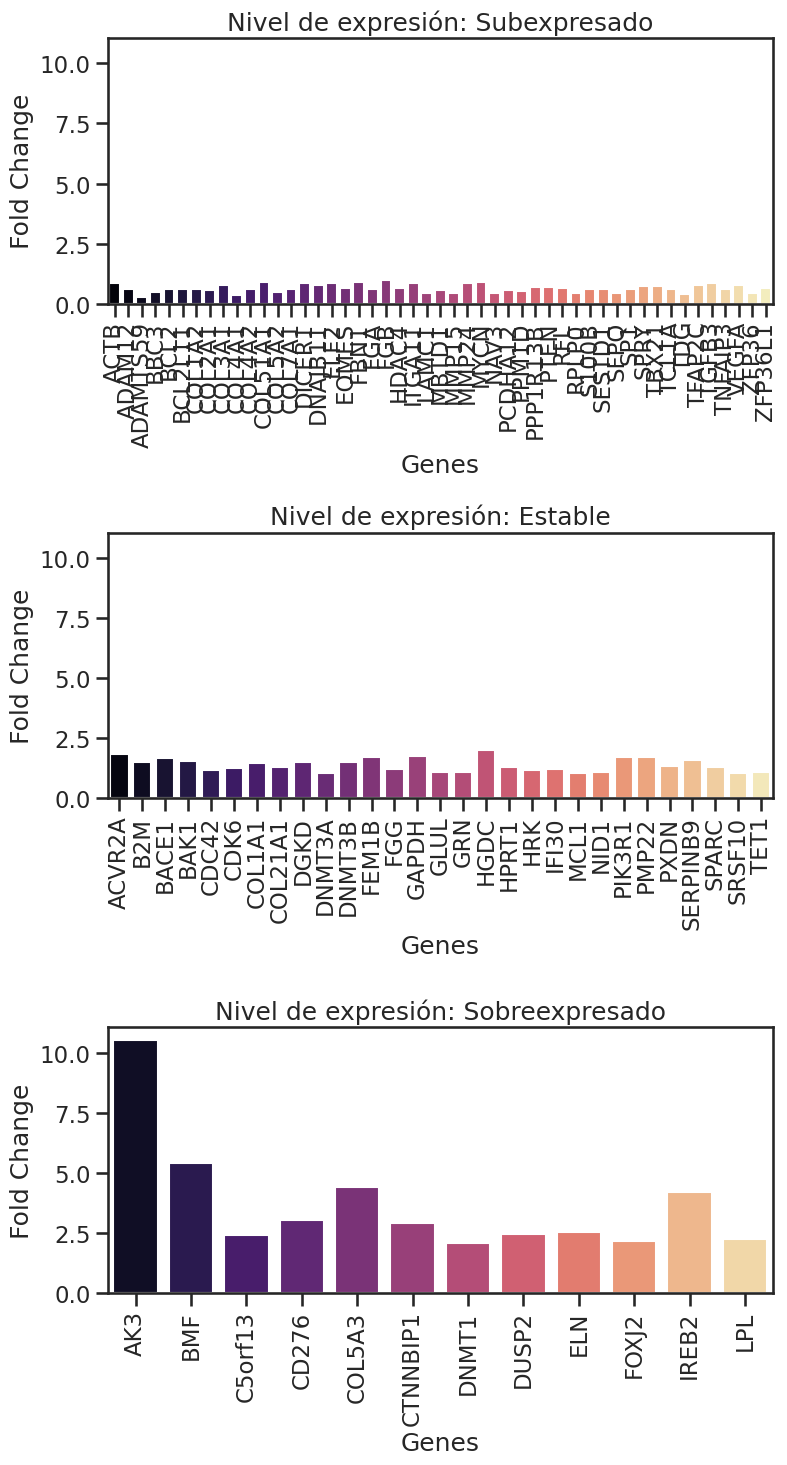

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifica los niveles únicos de la columna expression_level
unique_expression_levels = df_combined_expresion['expression_level'].unique()
num_levels = len(unique_expression_levels)

# Crea la figura y los ejes: 1 columna y tantas filas como niveles
fig, axes = plt.subplots(
    nrows=num_levels,
    ncols=1,
    figsize=(8, 5 * num_levels),  # Ajusta el tamaño según tus datos
    sharey=True  # Comparte el eje Y si quieres comparar escalas
)

# Para el caso de un solo nivel, axes no será una lista
if num_levels == 1:
    axes = [axes]

# Recorre cada nivel y genera un gráfico en su respectivo subplot
for i, level in enumerate(unique_expression_levels):
    # Filtra el DataFrame para el nivel correspondiente
    data_subset = df_combined_expresion[df_combined_expresion['expression_level'] == level]

    # Gráfico de barras
    sns.barplot(
        data=data_subset,
        x='target',
        y='fold_change',
        palette='magma',
        ax=axes[i]
    )

    # Personaliza cada subplot
    axes[i].set_title(f'Nivel de expresión: {level}')
    axes[i].set_xlabel('Genes')
    axes[i].set_ylabel('Fold Change')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Consulta de enriquecimiento funcional utilizando la API de STRING

Este segmento del código implementa la consulta de enriquecimiento funcional de genes mediante la API de **STRING**, permitiendo identificar procesos biológicos, vías de señalización y asociaciones relevantes en los genes proporcionados.

## Descripción del proceso

1. **Definición de la URL de solicitud**:
   - Se construye la URL base a partir de la versión de la API, el formato de salida (`json`) y el método de enriquecimiento funcional (`enrichment`).

2. **Función `realizar_enriquecimiento`**:
   - Esta función realiza la consulta a la API de STRING y devuelve un **DataFrame** con los resultados del enriquecimiento funcional.
   - **Parámetros**:
     - `lista_genes`: Lista de genes a analizar.
   - **Salida**:
     - Devuelve un **DataFrame** que contiene los términos enriquecidos y sus descripciones.
   - **Manejo de errores**:
     - Se gestionan posibles errores durante la consulta, como errores de conexión, de tiempo de espera y de respuesta HTTP.
     - Si la lista de genes está vacía, la función imprime un mensaje y retorna un **DataFrame** vacío.

3. **Realización de consultas por nivel de expresión**:
   - Se realizan tres consultas independientes, una para cada categoría de genes:
     - **Genes sobreexpresados**.
     - **Genes estables**.
     - **Genes subexpresados**.
   - Los resultados se almacenan en los siguientes **DataFrames**:
     - `enriquecimiento_sobreexpresados`.
     - `enriquecimiento_estables`.
     - `enriquecimiento_subexpresados`.

## Salida esperada

- Tres **DataFrames** que contienen los resultados de enriquecimiento funcional para cada nivel de expresión génica.
- Mensajes en consola que indican si hubo errores durante las consultas o si la lista de genes estaba vacía.

In [ ]:
# Definir la URL base y el formato de salida para la API de STRING
url_api_base = "https://version-12-0.string-db.org/api"
formato_salida = "json"
metodo = "enrichment"

# Construir la URL de solicitud
url_solicitud = "/".join([url_api_base, formato_salida, metodo])

# Definir una función para realizar el enriquecimiento funcional
def realizar_enriquecimiento(lista_genes):
    """
    Realiza un análisis de enriquecimiento funcional utilizando la API de STRING.

    Parámetros:
    lista_genes (list): Lista de genes a analizar.

    Retorna:
    pd.DataFrame: DataFrame con los resultados del enriquecimiento funcional.
    """
    if not lista_genes:
        print("La lista de genes está vacía. No se puede realizar el enriquecimiento.")
        return pd.DataFrame()

    # Convertir lista en string separado por '%0d' como lo requiere la API
    genes_principales = "%0d".join(lista_genes)
    parametros = {
        "identifiers": genes_principales,
        "species": 9606,  # Código taxonómico para Homo sapiens
        "caller_identity": "UIMEO"
    }

    try:
        respuesta = requests.post(url_solicitud, data=parametros)
        respuesta.raise_for_status()
        datos = respuesta.json()
        return pd.DataFrame(datos)
    except requests.exceptions.HTTPError as errh:
        print(f"Error HTTP: {errh}")
    except requests.exceptions.ConnectionError as errc:
        print(f"Error de conexión: {errc}")
    except requests.exceptions.Timeout as errt:
        print(f"Tiempo de espera agotado: {errt}")
    except requests.exceptions.RequestException as err:
        print(f"Error en la solicitud: {err}")
    except ValueError:
        print("Error al decodificar la respuesta JSON.")
    return pd.DataFrame()

# Realizar el enriquecimiento para cada nivel de expresión
enriquecimiento_sobreexpresados = realizar_enriquecimiento(lista_sobreexpresion)
enriquecimiento_estables = realizar_enriquecimiento(lista_estables)
enriquecimiento_subexpresados = realizar_enriquecimiento(lista_subexpresados)

# Concatenar los tres DataFrames en uno solo
df_enriquecimiento_concatenado = pd.concat([enriquecimiento_sobreexpresados, enriquecimiento_estables, enriquecimiento_subexpresados], keys=["Sobreexpresados", "Estables", "Subexpresados"], names=["Nivel de Expresión", "Índice"])

# Exportar a un archivo CSV
nombre_archivo = "./resultados/enriquecimiento_STRING_completo.csv"
df_enriquecimiento_concatenado.to_csv(nombre_archivo, index=True)

display(Markdown(f"**Archivo exportado con éxito:** `{nombre_archivo}`"))

**Archivo exportado con éxito:** `./resultados/enriquecimiento_STRING_completo.csv`

# Diccionario de significados de las categorías

Este diccionario detalla el significado de las categorías utilizadas en el análisis genómico, proporcionando descripciones ampliadas y precisas para cada término:


In [ ]:
# Diccionario de significados de las categorías ampliado y detallado
categorias_significados = {
    "HPO": (
        "Human Phenotype Ontology: Un sistema de clasificación que describe los fenotipos observados en humanos. "
        "Es utilizado para vincular características clínicas con genes específicos, facilitando el diagnóstico de enfermedades genéticas y la investigación biomédica."
    ),
    "Process": (
        "Procesos biológicos generales asociados a los genes: Actividades celulares, fisiológicas o moleculares llevadas a cabo por uno o más genes. "
        "Incluye funciones como señalización, metabolismo, división celular y respuesta inmune, esenciales para el funcionamiento normal de los organismos."
    ),
    "PMID": (
        "Publicaciones científicas referenciadas mediante PubMed ID: Proporciona enlaces a estudios y artículos revisados por pares disponibles en PubMed. "
        "Estos identificadores únicos permiten acceder a la evidencia científica que respalda las asociaciones o descubrimientos relacionados con los términos enriquecidos."
    ),
    "RCTM": (
        "Reactome: Base de datos centrada en vías metabólicas y de señalización celular. "
        "Detalla reacciones biológicas y procesos organizados en rutas específicas, como la regulación de la apoptosis, metabolismo de lípidos o señalización de receptores, apoyando el análisis de vías celulares complejas."
    ),
    "COMPARTMENTS": (
        "Localizaciones subcelulares y estructuras biológicas: Describe las ubicaciones dentro de la célula, como el núcleo, citoplasma, membrana plasmática y organelos. "
        "Estas localizaciones son cruciales para entender dónde ocurren las funciones biológicas y cómo los genes contribuyen a la estructura y funcionamiento celular."
    ),
    "WikiPathways": (
        "Rutas metabólicas y biológicas de la base WikiPathways: Una base de datos colaborativa que documenta y organiza rutas biológicas. "
        "Incluye diagramas visuales que conectan genes, proteínas y metabolitos, facilitando la comprensión de procesos biológicos clave y su interacción en diversas condiciones fisiológicas y patológicas."
    ),
    "KEGG": (
        "Rutas y procesos biológicos anotados en KEGG (Kyoto Encyclopedia of Genes and Genomes): Proporciona información detallada sobre procesos metabólicos, enfermedades humanas, vías de señalización y la interacción entre genes y productos genéticos. "
        "Es una herramienta esencial para la interpretación de datos genómicos y la comprensión de las funciones biológicas a nivel molecular."
    ),
    "Component": (
        "Componentes celulares asociados a los genes: Identifica las estructuras específicas dentro de la célula donde los genes o sus productos desempeñan un papel funcional. "
        "Ejemplos incluyen ribosomas, citoesqueleto, mitocondrias y complejos de membrana, que son fundamentales para diversas actividades celulares."
    ),
    "TISSUES": (
        "Asociaciones específicas con tejidos biológicos: Describe la relación entre genes y su expresión preferencial o específica en tejidos como cerebro, hígado, pulmón o tejidos tumorales. "
        "Esto ayuda a identificar el contexto fisiológico o patológico de los genes y su relevancia en diferentes tipos de células y órganos."
    ),
    "Keyword": (
        "Palabras clave relacionadas con las funciones genéticas: Etiquetas utilizadas para clasificar y agrupar genes según sus roles funcionales, como 'transporte de electrones', 'respuesta al estrés oxidativo' o 'metabolismo de carbohidratos'. "
        "Facilitan la búsqueda y el análisis de genes con funciones similares."
    ),
    "DISEASES": (
        "Relación con enfermedades humanas conocidas: Vincula genes y términos con patologías específicas como cáncer, enfermedades cardiovasculares o trastornos genéticos. "
        "Basado en evidencia clínica y experimental, permite comprender el impacto de los genes en la salud humana y el desarrollo de enfermedades."
    ),
    "Function": (
        "Funciones moleculares de los genes: Define las actividades bioquímicas llevadas a cabo por los productos génicos, como proteínas y ARN. "
        "Ejemplos incluyen actividad enzimática, unión a ADN, transporte de iones y regulación de la expresión génica, esenciales para los procesos vitales de las células."
    ),
    "NetworkNeighborAL": (
        "Genes conectados en redes de interacción cercanas: Representa la proximidad funcional o física de genes en redes biológicas. "
        "Incluye interacciones proteína-proteína, regulación transcripcional o participación en procesos comunes, lo que ayuda a entender las interrelaciones entre genes en contextos biológicos complejos."
    ),
    "SMART": (
        "Dominios específicos de proteínas anotados en SMART (Simple Modular Architecture Research Tool): Identifica regiones funcionales dentro de las proteínas, como dominios catalíticos, regiones de unión a lípidos o estructuras repetitivas. "
        "Estos dominios son cruciales para la función y la interacción de las proteínas en diversas vías biológicas."
    ),
    "InterPro": (
        "Clasificación y anotación de familias de proteínas: Integra múltiples bases de datos para identificar relaciones evolutivas y dominios funcionales en proteínas. "
        "Ayuda a comprender la función y el origen de las proteínas, facilitando la clasificación de nuevas secuencias proteicas en familias conocidas."
    ),
    "Pfam": (
        "Familias de proteínas definidas en la base Pfam: Ofrece información detallada sobre agrupaciones de proteínas relacionadas por secuencia y estructura. "
        "Es clave para entender cómo ciertos genes codifican funciones similares en distintos organismos, permitiendo la identificación de dominios conservados y su función."
    )
}


# Función para procesar DataFrame de enriquecimiento y generar gráficos de categorías

Esta función se encarga de procesar un **DataFrame** que contiene resultados de enriquecimiento funcional, mostrando un resumen detallado de las categorías en formato **Markdown** y generando un gráfico de barras que representa la frecuencia de cada categoría.

## Descripción del proceso

1. **Verificación del DataFrame**:
   - Se comprueba si el DataFrame está vacío.
   - Se verifica que la columna `'category'` exista en el DataFrame para evitar errores de procesamiento.

2. **Conteo de categorías**:
   - Se cuentan las ocurrencias de cada categoría en la columna `'category'` y se ordenan de forma descendente según su frecuencia.

3. **Generación del resumen**:
   - Se inicia un texto formateado en **Markdown** que incluye cada categoría, su frecuencia y una breve descripción extraída del diccionario `categorias_significados`.
   - Si no se encuentra una descripción para una categoría específica, se añade el texto "Significado no especificado".

4. **Visualización del resumen**:
   - Se utiliza `display(Markdown(resumen_texto))` para mostrar el resumen en formato **Markdown** dentro del notebook.

5. **Generación del gráfico de barras**:
   - Se crea un gráfico de barras que muestra la distribución de categorías ordenada por frecuencia.
   - Se utilizan colores de la paleta `coolwarm` de **Seaborn** y se añade un borde negro a las barras.
   - Se añaden etiquetas encima de cada barra que indican la frecuencia de cada categoría.
   - Se personalizan los títulos, etiquetas de los ejes y la cuadrícula del gráfico.

6. **Personalización del diseño**:
   - Se ajusta el tamaño del gráfico a `(12, 8)` para garantizar una mejor visualización.
   - Se rotan las etiquetas del eje X para evitar superposiciones.
   - Se aplica un espaciado automático con `plt.tight_layout()` para evitar recortes en la visualización.

## Parámetros de la función

- **dataframe** (*pd.DataFrame*):  
  DataFrame que contiene una columna llamada `'category'`, donde se almacenan las categorías a procesar.
  
- **nombre_dataframe** (*str*):  
  Nombre descriptivo que se utilizará en los títulos y etiquetas del resumen y del gráfico.

## Salida esperada

1. **Resumen en formato Markdown**:
   - Se genera un resumen detallado que muestra cada categoría con su frecuencia y descripción.
   
2. **Gráfico de barras**:
   - Un gráfico que representa la distribución de categorías, con etiquetas de frecuencia encima de cada barra y un diseño personalizado.



### Resumen de categorías en genes sobreexpresados

- **Process** (1): Procesos biológicos generales asociados a los genes: Actividades celulares, fisiológicas o moleculares llevadas a cabo por uno o más genes. Incluye funciones como señalización, metabolismo, división celular y respuesta inmune, esenciales para el funcionamiento normal de los organismos.



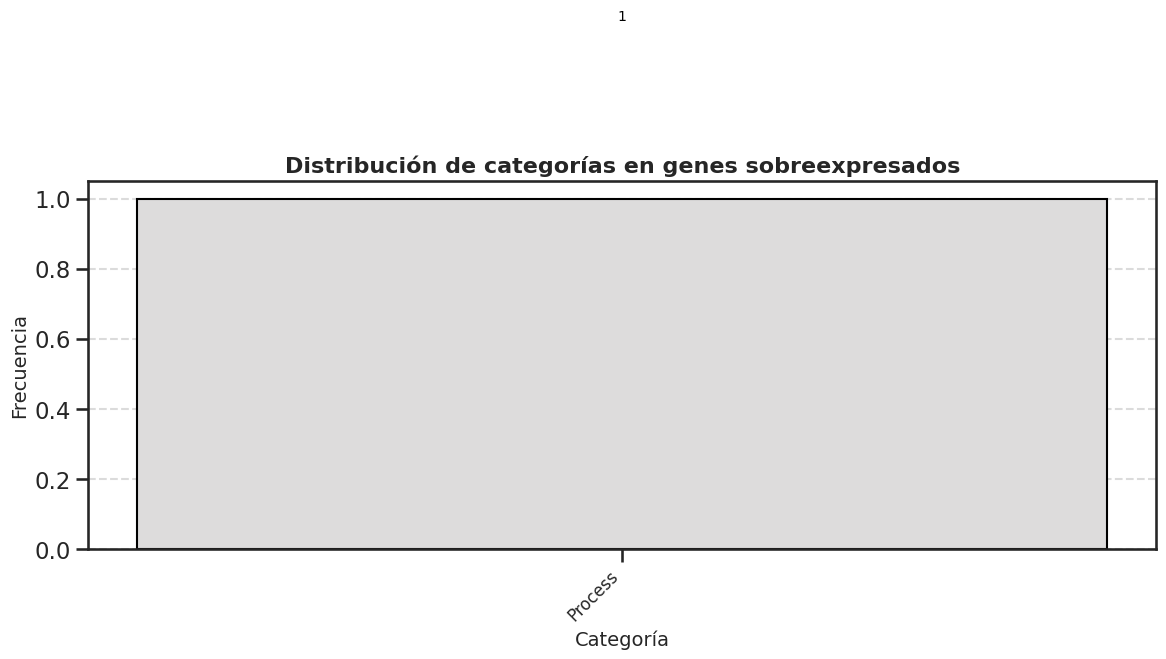


### Resumen de categorías en genes estables

- **PMID** (100): Publicaciones científicas referenciadas mediante PubMed ID: Proporciona enlaces a estudios y artículos revisados por pares disponibles en PubMed. Estos identificadores únicos permiten acceder a la evidencia científica que respalda las asociaciones o descubrimientos relacionados con los términos enriquecidos.

- **Process** (39): Procesos biológicos generales asociados a los genes: Actividades celulares, fisiológicas o moleculares llevadas a cabo por uno o más genes. Incluye funciones como señalización, metabolismo, división celular y respuesta inmune, esenciales para el funcionamiento normal de los organismos.

- **KEGG** (35): Rutas y procesos biológicos anotados en KEGG (Kyoto Encyclopedia of Genes and Genomes): Proporciona información detallada sobre procesos metabólicos, enfermedades humanas, vías de señalización y la interacción entre genes y productos genéticos. Es una herramienta esencial para la interpretación de datos genómicos y la comprensión de las funciones biológicas a nivel molecular.

- **COMPARTMENTS** (28): Localizaciones subcelulares y estructuras biológicas: Describe las ubicaciones dentro de la célula, como el núcleo, citoplasma, membrana plasmática y organelos. Estas localizaciones son cruciales para entender dónde ocurren las funciones biológicas y cómo los genes contribuyen a la estructura y funcionamiento celular.

- **TISSUES** (21): Asociaciones específicas con tejidos biológicos: Describe la relación entre genes y su expresión preferencial o específica en tejidos como cerebro, hígado, pulmón o tejidos tumorales. Esto ayuda a identificar el contexto fisiológico o patológico de los genes y su relevancia en diferentes tipos de células y órganos.

- **WikiPathways** (17): Rutas metabólicas y biológicas de la base WikiPathways: Una base de datos colaborativa que documenta y organiza rutas biológicas. Incluye diagramas visuales que conectan genes, proteínas y metabolitos, facilitando la comprensión de procesos biológicos clave y su interacción en diversas condiciones fisiológicas y patológicas.

- **Component** (6): Componentes celulares asociados a los genes: Identifica las estructuras específicas dentro de la célula donde los genes o sus productos desempeñan un papel funcional. Ejemplos incluyen ribosomas, citoesqueleto, mitocondrias y complejos de membrana, que son fundamentales para diversas actividades celulares.

- **RCTM** (3): Reactome: Base de datos centrada en vías metabólicas y de señalización celular. Detalla reacciones biológicas y procesos organizados en rutas específicas, como la regulación de la apoptosis, metabolismo de lípidos o señalización de receptores, apoyando el análisis de vías celulares complejas.

- **NetworkNeighborAL** (3): Genes conectados en redes de interacción cercanas: Representa la proximidad funcional o física de genes en redes biológicas. Incluye interacciones proteína-proteína, regulación transcripcional o participación en procesos comunes, lo que ayuda a entender las interrelaciones entre genes en contextos biológicos complejos.

- **Keyword** (1): Palabras clave relacionadas con las funciones genéticas: Etiquetas utilizadas para clasificar y agrupar genes según sus roles funcionales, como 'transporte de electrones', 'respuesta al estrés oxidativo' o 'metabolismo de carbohidratos'. Facilitan la búsqueda y el análisis de genes con funciones similares.

- **InterPro** (1): Clasificación y anotación de familias de proteínas: Integra múltiples bases de datos para identificar relaciones evolutivas y dominios funcionales en proteínas. Ayuda a comprender la función y el origen de las proteínas, facilitando la clasificación de nuevas secuencias proteicas en familias conocidas.



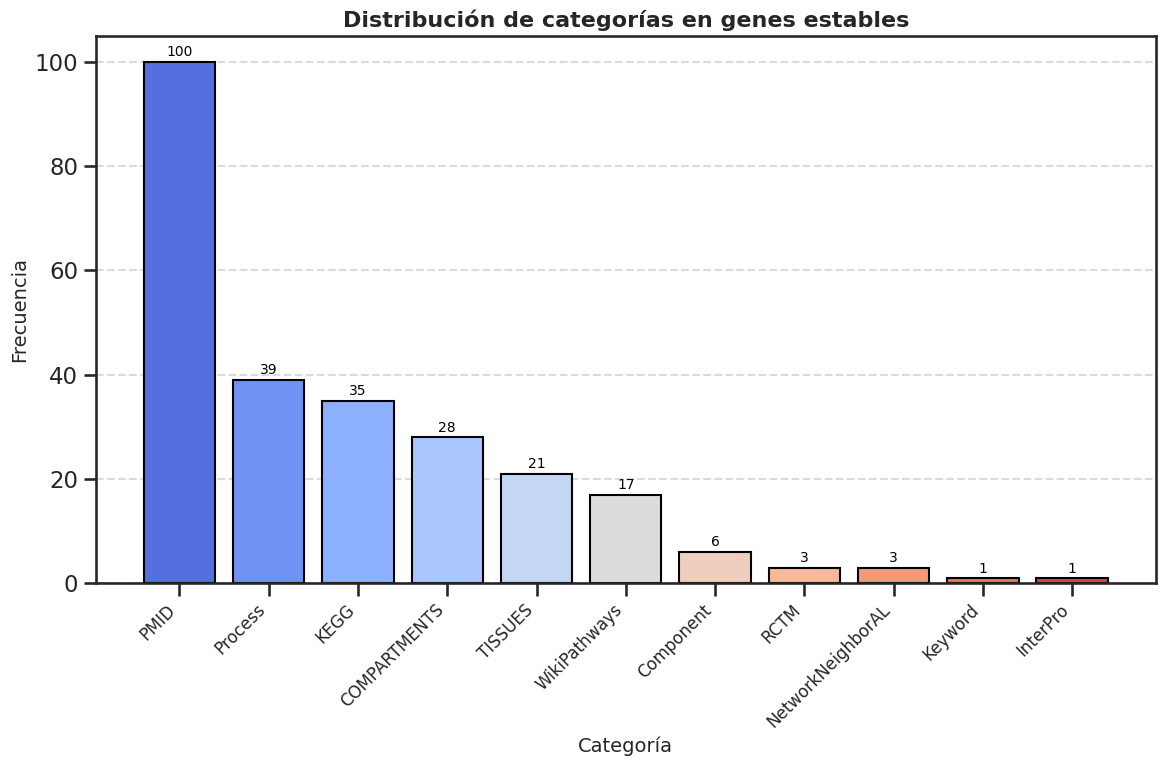


### Resumen de categorías en genes subexpresados

- **HPO** (434): Human Phenotype Ontology: Un sistema de clasificación que describe los fenotipos observados en humanos. Es utilizado para vincular características clínicas con genes específicos, facilitando el diagnóstico de enfermedades genéticas y la investigación biomédica.

- **Process** (150): Procesos biológicos generales asociados a los genes: Actividades celulares, fisiológicas o moleculares llevadas a cabo por uno o más genes. Incluye funciones como señalización, metabolismo, división celular y respuesta inmune, esenciales para el funcionamiento normal de los organismos.

- **PMID** (100): Publicaciones científicas referenciadas mediante PubMed ID: Proporciona enlaces a estudios y artículos revisados por pares disponibles en PubMed. Estos identificadores únicos permiten acceder a la evidencia científica que respalda las asociaciones o descubrimientos relacionados con los términos enriquecidos.

- **RCTM** (38): Reactome: Base de datos centrada en vías metabólicas y de señalización celular. Detalla reacciones biológicas y procesos organizados en rutas específicas, como la regulación de la apoptosis, metabolismo de lípidos o señalización de receptores, apoyando el análisis de vías celulares complejas.

- **COMPARTMENTS** (34): Localizaciones subcelulares y estructuras biológicas: Describe las ubicaciones dentro de la célula, como el núcleo, citoplasma, membrana plasmática y organelos. Estas localizaciones son cruciales para entender dónde ocurren las funciones biológicas y cómo los genes contribuyen a la estructura y funcionamiento celular.

- **WikiPathways** (30): Rutas metabólicas y biológicas de la base WikiPathways: Una base de datos colaborativa que documenta y organiza rutas biológicas. Incluye diagramas visuales que conectan genes, proteínas y metabolitos, facilitando la comprensión de procesos biológicos clave y su interacción en diversas condiciones fisiológicas y patológicas.

- **KEGG** (23): Rutas y procesos biológicos anotados en KEGG (Kyoto Encyclopedia of Genes and Genomes): Proporciona información detallada sobre procesos metabólicos, enfermedades humanas, vías de señalización y la interacción entre genes y productos genéticos. Es una herramienta esencial para la interpretación de datos genómicos y la comprensión de las funciones biológicas a nivel molecular.

- **Component** (21): Componentes celulares asociados a los genes: Identifica las estructuras específicas dentro de la célula donde los genes o sus productos desempeñan un papel funcional. Ejemplos incluyen ribosomas, citoesqueleto, mitocondrias y complejos de membrana, que son fundamentales para diversas actividades celulares.

- **TISSUES** (18): Asociaciones específicas con tejidos biológicos: Describe la relación entre genes y su expresión preferencial o específica en tejidos como cerebro, hígado, pulmón o tejidos tumorales. Esto ayuda a identificar el contexto fisiológico o patológico de los genes y su relevancia en diferentes tipos de células y órganos.

- **Keyword** (18): Palabras clave relacionadas con las funciones genéticas: Etiquetas utilizadas para clasificar y agrupar genes según sus roles funcionales, como 'transporte de electrones', 'respuesta al estrés oxidativo' o 'metabolismo de carbohidratos'. Facilitan la búsqueda y el análisis de genes con funciones similares.

- **DISEASES** (14): Relación con enfermedades humanas conocidas: Vincula genes y términos con patologías específicas como cáncer, enfermedades cardiovasculares o trastornos genéticos. Basado en evidencia clínica y experimental, permite comprender el impacto de los genes en la salud humana y el desarrollo de enfermedades.

- **Function** (12): Funciones moleculares de los genes: Define las actividades bioquímicas llevadas a cabo por los productos génicos, como proteínas y ARN. Ejemplos incluyen actividad enzimática, unión a ADN, transporte de iones y regulación de la expresión génica, esenciales para los procesos vitales de las células.

- **NetworkNeighborAL** (11): Genes conectados en redes de interacción cercanas: Representa la proximidad funcional o física de genes en redes biológicas. Incluye interacciones proteína-proteína, regulación transcripcional o participación en procesos comunes, lo que ayuda a entender las interrelaciones entre genes en contextos biológicos complejos.

- **SMART** (4): Dominios específicos de proteínas anotados en SMART (Simple Modular Architecture Research Tool): Identifica regiones funcionales dentro de las proteínas, como dominios catalíticos, regiones de unión a lípidos o estructuras repetitivas. Estos dominios son cruciales para la función y la interacción de las proteínas en diversas vías biológicas.

- **InterPro** (2): Clasificación y anotación de familias de proteínas: Integra múltiples bases de datos para identificar relaciones evolutivas y dominios funcionales en proteínas. Ayuda a comprender la función y el origen de las proteínas, facilitando la clasificación de nuevas secuencias proteicas en familias conocidas.

- **Pfam** (1): Familias de proteínas definidas en la base Pfam: Ofrece información detallada sobre agrupaciones de proteínas relacionadas por secuencia y estructura. Es clave para entender cómo ciertos genes codifican funciones similares en distintos organismos, permitiendo la identificación de dominios conservados y su función.



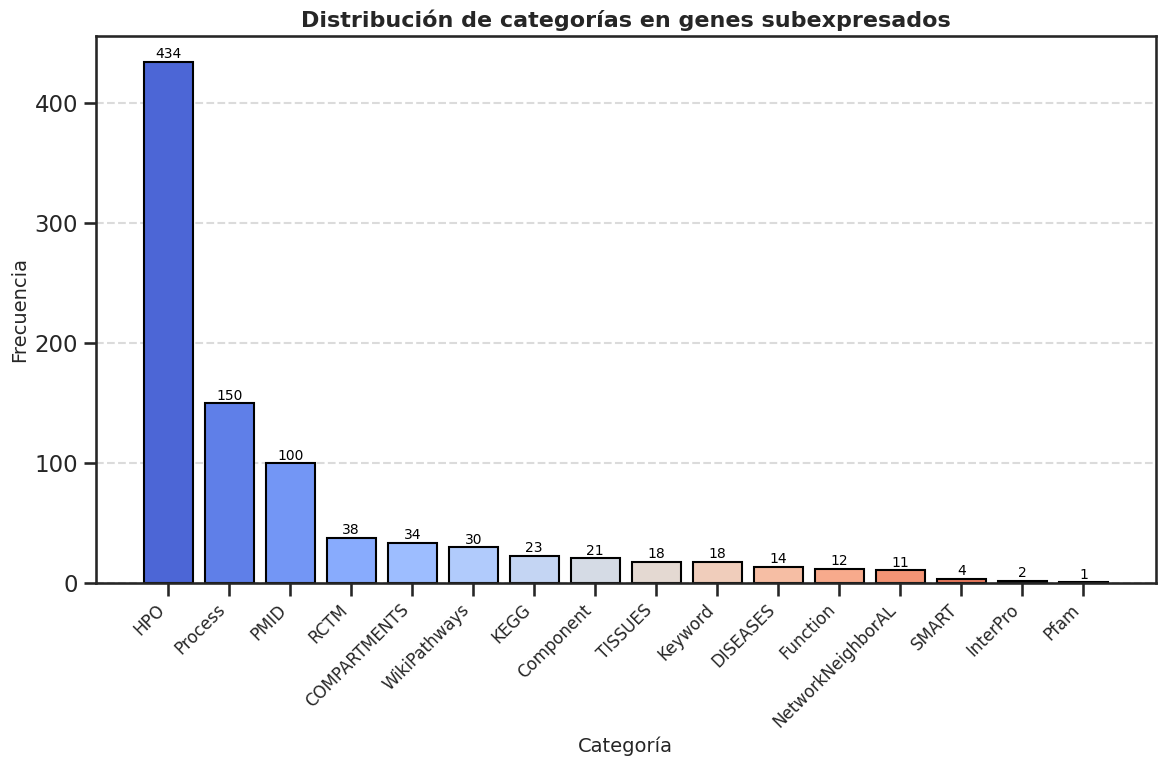

In [ ]:
def procesar_dataframe(dataframe, nombre_dataframe):
    """
    Procesa un DataFrame de enriquecimiento y muestra la información de categorías en texto línea por línea,
    utilizando Markdown para formateo, además de generar un gráfico de barras ordenado por frecuencia.

    Parámetros:
    dataframe (pd.DataFrame): DataFrame que contiene una columna 'category'.
    nombre_dataframe (str): Nombre descriptivo del DataFrame para títulos y etiquetas.
    """
    # Verificar si el DataFrame está vacío
    if dataframe.empty:
        print(f"El DataFrame {nombre_dataframe} está vacío.")
        return

    # Verificar si la columna 'category' existe en el DataFrame
    if 'category' not in dataframe.columns:
        print(f"El DataFrame {nombre_dataframe} no contiene la columna 'category'.")
        return

    # Contar ocurrencias por categoría y ordenar por frecuencia
    categorias_frecuencia = dataframe['category'].value_counts().sort_values(ascending=False)

    # Iniciar el resumen como una cadena vacía
    resumen_texto = f"\n### Resumen de categorías en {nombre_dataframe}\n\n"

    # Iterar sobre las categorías y construir el resumen
    for categoria, frecuencia in categorias_frecuencia.items():
        descripcion = categorias_significados.get(categoria, "Significado no especificado.")
        # Añadir la línea formateada al resumen
        resumen_texto += f"- **{categoria}** ({frecuencia}): {descripcion}\n\n"

    # Mostrar el resumen utilizando Markdown
    display(Markdown(resumen_texto))

    # Crear el gráfico de barras ordenado por frecuencia
    sns.set_context("talk")
    sns.set_style("ticks")
    plt.figure(figsize=(12, 8))
    barras = plt.bar(
        categorias_frecuencia.index,
        categorias_frecuencia.values,
        color=sns.color_palette("coolwarm", len(categorias_frecuencia)),
        edgecolor="black"
    )

    # Añadir etiquetas de frecuencia encima de las barras
    for barra in barras:
        yval = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width() / 2,
            yval + 0.5,
            f"{int(yval)}",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black"
        )

    # Personalizar el gráfico
    plt.title(f"Distribución de categorías en {nombre_dataframe}", fontsize=16, weight="bold")
    plt.xlabel("Categoría", fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Ajustar el diseño para evitar recortes
    plt.tight_layout()
    plt.show()

    # Procesar y visualizar los DataFrames de enriquecimiento
procesar_dataframe(enriquecimiento_sobreexpresados, "genes sobreexpresados")
procesar_dataframe(enriquecimiento_estables, "genes estables")
procesar_dataframe(enriquecimiento_subexpresados, "genes subexpresados")

# Filtrado y ordenamiento de términos GO en el enriquecimiento funcional via la API de STRING

Esta función filtra un **DataFrame** de enriquecimiento funcional para incluir solo los términos de **Gene Ontology (GO)**, ordena los resultados según el valor de **FDR** (False Discovery Rate) y elimina columnas irrelevantes para el análisis posterior.

## Descripción del proceso

1. **Validación de columnas**:
   - Se define una lista de columnas requeridas: `'term'`, `'fdr'`, `'ncbiTaxonId'` y `'preferredNames'`.
   - Se comprueba que el DataFrame contenga todas las columnas requeridas.
   - Si alguna columna falta, se lanza una excepción `ValueError` con un mensaje indicando las columnas faltantes.

2. **Filtrado de términos GO**:
   - Se filtran las filas del DataFrame donde la columna `'term'` comienza con el prefijo `"GO:"`, que identifica términos de **Gene Ontology**.

3. **Ordenamiento por FDR**:
   - Se ordena el DataFrame filtrado en orden ascendente según el valor de **FDR**, priorizando los términos más significativos.

4. **Eliminación de columnas innecesarias**:
   - Se eliminan las columnas `'ncbiTaxonId'` y `'preferredNames'`, que no son relevantes para el análisis de términos GO.

5. **Reinicio de índices**:
   - Se reinician los índices del DataFrame, descartando los antiguos.

## Aplicación de la función

La función `filtrar_enriquecimiento_go` se aplica a tres conjuntos de datos diferentes:

- **`enriquecimiento_sobreexpresados`**: Conjunto de datos de genes sobreexpresados.
- **`enriquecimiento_estables`**: Conjunto de datos de genes estables.
- **`enriquecimiento_subexpresados`**: Conjunto de datos de genes subexpresados.

Se obtienen tres DataFrames filtrados y ordenados:

- **`enriquecimiento_go_sobreexpresados`**  
- **`enriquecimiento_go_estables`**  
- **`enriquecimiento_go_subexpresados`**

## Manejo de excepciones

Si el DataFrame de entrada no contiene las columnas requeridas, la función lanza una excepción `ValueError` con un mensaje detallado. En este caso, se imprime un mensaje de error indicando el problema.

## Salida esperada

- Tres **DataFrames** filtrados que contienen únicamente los términos GO ordenados por su significancia.
- Las columnas innecesarias se eliminan y los índices se reinician para facilitar el análisis posterior.


In [ ]:
def filtrar_enriquecimiento_go(dataframe, category):
    """
    Filtra un DataFrame para incluir solo las filas donde la columna 'term' comienza con 'GO:',
    ordena el DataFrame por el valor de 'fdr' en orden ascendente y elimina las columnas
    'ncbiTaxonId' y 'preferredNames'.

    Parámetros:
    dataframe (pd.DataFrame): DataFrame que contiene los datos de enriquecimiento con al menos las columnas 'term', 'fdr', 'ncbiTaxonId' y 'preferredNames'.

    Retorna:
    pd.DataFrame: DataFrame filtrado, ordenado y con las columnas especificadas eliminadas.

    Excepciones:
    ValueError: Si el DataFrame no contiene las columnas necesarias.
    """
    # Validar que las columnas requeridas están presentes
    columnas_requeridas = ['term', 'fdr', 'ncbiTaxonId', 'preferredNames']
    columnas_faltantes = [col for col in columnas_requeridas if col not in dataframe.columns]
    if columnas_faltantes:
        raise ValueError(f"El DataFrame no contiene las columnas requeridas: {', '.join(columnas_faltantes)}")

    # Filtrar filas donde 'term' comienza con "GO:"
    dataframe_filtrado = dataframe[dataframe['term'].str.startswith("GO:")]

    # Ordenar el DataFrame por 'fdr' en orden ascendente
    dataframe_ordenado = dataframe_filtrado.sort_values(by='fdr', ascending=True)

    # Eliminar las columnas 'ncbiTaxonId' y 'preferredNames'
    dataframe_ordenado = dataframe_ordenado.drop(['ncbiTaxonId', 'preferredNames'], axis=1)
    # Reiniciar los índices y descartar los antiguos
    dataframe_ordenado.reset_index(drop=True, inplace=True)

    # Agregar la columna 'GeneCategory' a cada DataFrame
    dataframe_ordenado['GeneCategory'] = category

    return dataframe_ordenado

# Aplicar la función de filtrado a los diferentes conjuntos de datos
try:
    enriquecimiento_go_sobreexpresados = filtrar_enriquecimiento_go(enriquecimiento_sobreexpresados, 'Sobreexpresados')
    enriquecimiento_go_estables = filtrar_enriquecimiento_go(enriquecimiento_estables, 'Estables')
    enriquecimiento_go_subexpresados = filtrar_enriquecimiento_go(enriquecimiento_subexpresados, 'Subexpresados')
except ValueError as e:
    print(f"Error al procesar los datos: {e}")



# Visualización del número de términos GO enriquecidos por categoría de genes y tipo de GO

Este segmento de código genera un gráfico de barras agrupadas que muestra el número de términos GO enriquecidos para cada categoría de genes (**sobreexpresados**, **estables** y **subexpresados**), desglosado por el tipo de GO.

## Descripción del proceso

1. **Creación del DataFrame resumen**:
   - Se crea un **DataFrame** llamado `df_resumen` que contiene dos columnas:
     - `'Categoría'`: Las categorías de genes (*Sobreexpresados*, *Estables* y *Subexpresados*).
     - `'Número de términos GO enriquecidos'`: El número total de términos GO enriquecidos en cada categoría.

2. **Adición de la columna `'GeneCategory'`**:
   - A cada DataFrame filtrado (`enriquecimiento_go_sobreexpresados`, `enriquecimiento_go_estables` y `enriquecimiento_go_subexpresados`) se le añade una columna `'GeneCategory'` para identificar a qué categoría de genes pertenece cada término GO.

3. **Combinación de los DataFrames**:
   - Se combinan los tres DataFrames filtrados en uno solo llamado `df_combined`.

4. **Conteo de términos GO por categoría y tipo de GO**:
   - Se agrupa el **DataFrame combinado** por `'GeneCategory'` y `'category'`, y se cuenta el número de términos GO para cada combinación.
   - El resultado se almacena en un **DataFrame** llamado `df_counts`.

5. **Asegurar un orden consistente en las categorías**:
   - Se define un orden específico para las categorías de genes (`['Sobreexpresados', 'Estables', 'Subexpresados']`) utilizando `pd.Categorical`.

6. **Creación del gráfico de barras agrupadas**:
   - Se genera un gráfico de barras agrupadas utilizando **Seaborn** (`sns.barplot`), donde:
     - El eje X representa la categoría de genes.
     - El eje Y muestra el número de términos GO enriquecidos.
     - La variable `'category'` se utiliza como *hue* (color) para desglosar los términos GO por tipo.
   - Se emplea la paleta de colores `'magma'`.

7. **Personalización del gráfico**:
   - Se añaden un título, etiquetas de los ejes y una leyenda descriptiva.
   - Se utilizan etiquetas encima de cada barra que indican el número exacto de términos GO enriquecidos.
   - Se aplica `plt.tight_layout()` para ajustar automáticamente el espaciado y evitar superposiciones.

## Salida esperada

- **Gráfico de barras agrupadas**:
  - Un gráfico que muestra el número de términos GO enriquecidos para cada categoría de genes (*Sobreexpresados*, *Estables* y *Subexpresados*), desglosado por tipo de GO.
  - Etiquetas numéricas encima de cada barra que indican el número exacto de términos GO enriquecidos.


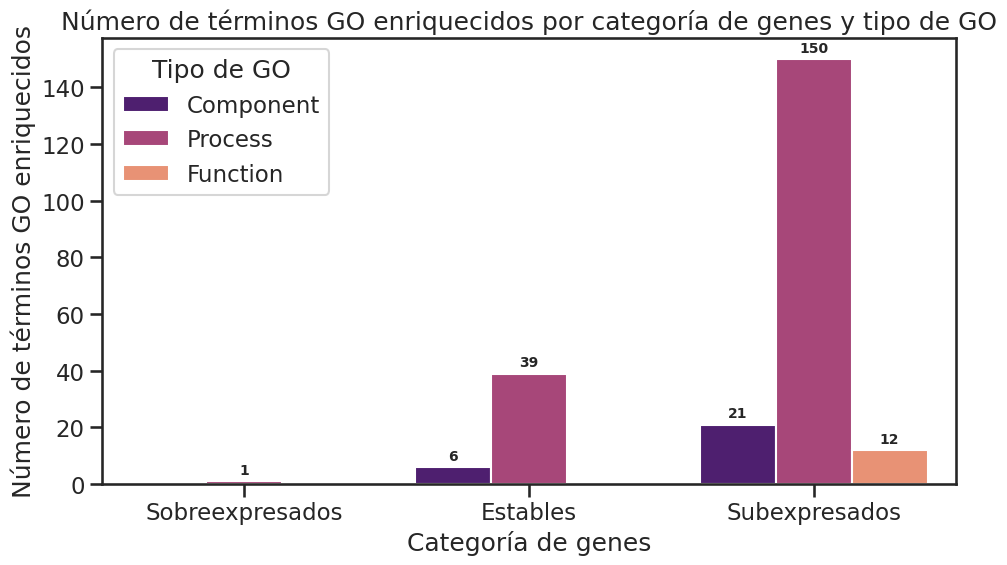

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_enriquecimiento_go(enriquecimiento_go_sobreexpresados, enriquecimiento_go_estables, enriquecimiento_go_subexpresados):
    """
    Función para graficar el número de términos GO enriquecidos por categoría de genes y tipo de GO.

    Parámetros:
    - enriquecimiento_go_sobreexpresados: DataFrame con términos GO de genes sobreexpresados.
    - enriquecimiento_go_estables: DataFrame con términos GO de genes estables.
    - enriquecimiento_go_subexpresados: DataFrame con términos GO de genes subexpresados.
    """
    # Combinar los DataFrames de enriquecimiento GO
    df_combined = pd.concat(
        [enriquecimiento_go_sobreexpresados, enriquecimiento_go_estables, enriquecimiento_go_subexpresados],
        ignore_index=True
    )

    # Contar los términos GO enriquecidos por categoría y tipo de GO
    df_counts = (
        df_combined
        .groupby(['GeneCategory', 'category'])
        .size()
        .reset_index(name='Número de términos GO enriquecidos')
    )

    # Establecer un orden consistente en las categorías de genes
    categoria_orden = ['Sobreexpresados', 'Estables', 'Subexpresados']
    df_counts['GeneCategory'] = pd.Categorical(df_counts['GeneCategory'], categories=categoria_orden, ordered=True)

    # Configurar el gráfico de barras agrupadas
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='GeneCategory',
        y='Número de términos GO enriquecidos',
        hue='category',
        data=df_counts,
        palette='magma'
    )

    # Personalizar el gráfico
    plt.title('Número de términos GO enriquecidos por categoría de genes y tipo de GO')
    plt.xlabel('Categoría de genes')
    plt.ylabel('Número de términos GO enriquecidos')
    plt.legend(title='Tipo de GO')

    # Añadir etiquetas encima de cada barra
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[int(v.get_height()) if v.get_height() > 0 else '' for v in container],
            fontsize=10,
            fontweight='bold',
            padding=3
        )

    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
graficar_enriquecimiento_go(enriquecimiento_go_sobreexpresados, enriquecimiento_go_estables, enriquecimiento_go_subexpresados)

# Visualización y exportación de términos GO más significativos por categoría de genes

Este segmento de código genera gráficos de barras para los términos GO más significativos en función de su valor **p** y exporta los resultados concatenados en un archivo **CSV**.

## Descripción del proceso

### 1. Función `plot_top_terms`

#### **Propósito**:
Generar gráficos de barras que muestran los **top N términos GO** más significativos, ordenados por el valor **p**, y desglosados por tipo de GO.

#### **Pasos del proceso**:

1. **Validación de datos**:
   - Si el DataFrame está vacío, se imprime un mensaje indicando que no hay datos para la categoría correspondiente y la función termina.

2. **Selección de los términos GO más significativos**:
   - Se ordena el DataFrame por el valor `'p_value'` en orden ascendente.
   - Se seleccionan los **top N** términos más significativos (por defecto, 25).

3. **Cálculo de `-log10(p_value)`**:
   - Se calcula el valor `-log10(p_value)` para mejorar la visualización de la significancia estadística en escala logarítmica.

4. **Abreviación de descripciones**:
   - Se abrevia la columna `'description'` a un máximo de 50 caracteres, añadiendo `"..."` al final si la longitud excede este límite.

5. **Generación del gráfico de barras**:
   - Se crea un gráfico de barras utilizando **Seaborn** (`sns.barplot`), donde:
     - El eje X representa `-log10(p_value)`.
     - El eje Y muestra la descripción abreviada del término GO.
     - Los colores de las barras se asignan según el tipo de GO utilizando una paleta personalizada basada en `'magma'`.
   - Se añaden un título, etiquetas de los ejes y una leyenda descriptiva.
   - Se ajusta el diseño final utilizando `plt.tight_layout()`.

### 2. Gráficos generados por categoría de genes

La función `plot_top_terms` se llama tres veces, una por cada categoría de genes:

- **Genes sobreexpresados**.
- **Genes estables**.
- **Genes subexpresados**.

Cada llamada genera un gráfico independiente que muestra los términos GO más significativos para esa categoría.

### 3. Exportación del DataFrame concatenado

- Se concatenan los tres DataFrames filtrados (`enriquecimiento_go_sobreexpresados`, `enriquecimiento_go_estables`, `enriquecimiento_go_subexpresados`) en un único **DataFrame** llamado `df_concatenado`.
- El **DataFrame concatenado** se exporta a un archivo **CSV** llamado `enriquecimiento_STRING_GO.csv`, ubicado en la carpeta `./resultados`.
- Se muestra un mensaje de confirmación utilizando **Markdown** para informar al usuario que el archivo ha sido creado con éxito.

## Salida esperada

1. **Gráficos de barras**:
   - Tres gráficos, uno por cada categoría de genes, que muestran los términos GO más significativos ordenados por su valor **p** en escala logarítmica.

2. **Archivo CSV**:
   - Un archivo llamado `enriquecimiento_STRING_GO.csv` que contiene los términos GO concatenados de las tres categorías de genes, listo para ser explorado en detalle.

3. **Mensaje de confirmación**:
   - Un mensaje en formato **Markdown** que confirma la creación exitosa del archivo CSV.


Valores únicos en 'category' para genes subexpresados: ['Function' 'Component' 'Process']


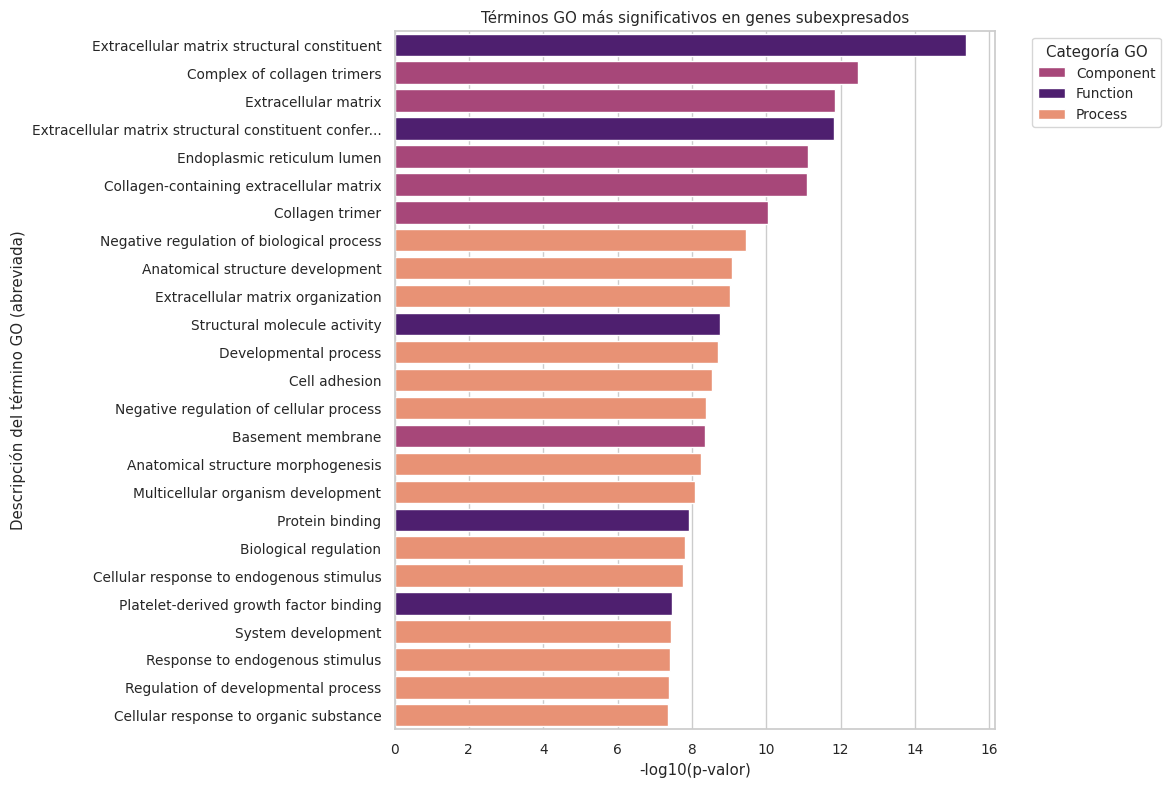

Valores únicos en 'category' para genes estables: ['Process' 'Component']


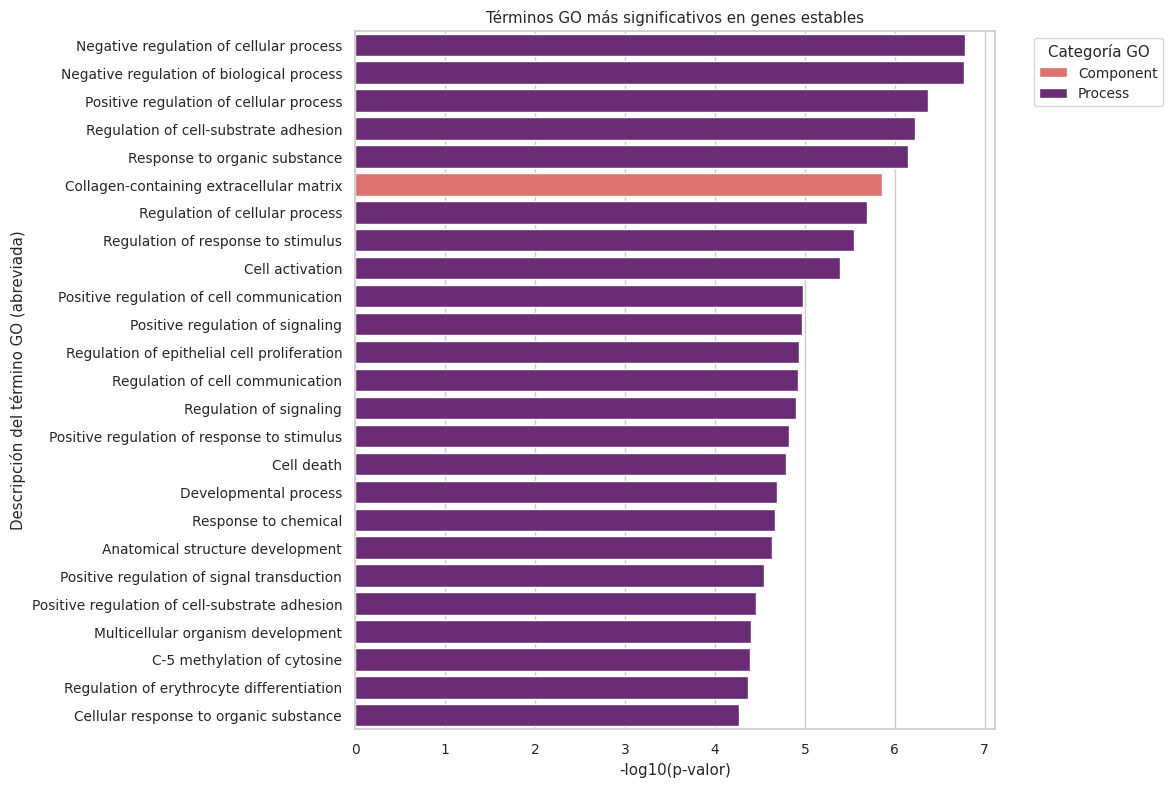

Valores únicos en 'category' para genes sobreexpresados: ['Process']


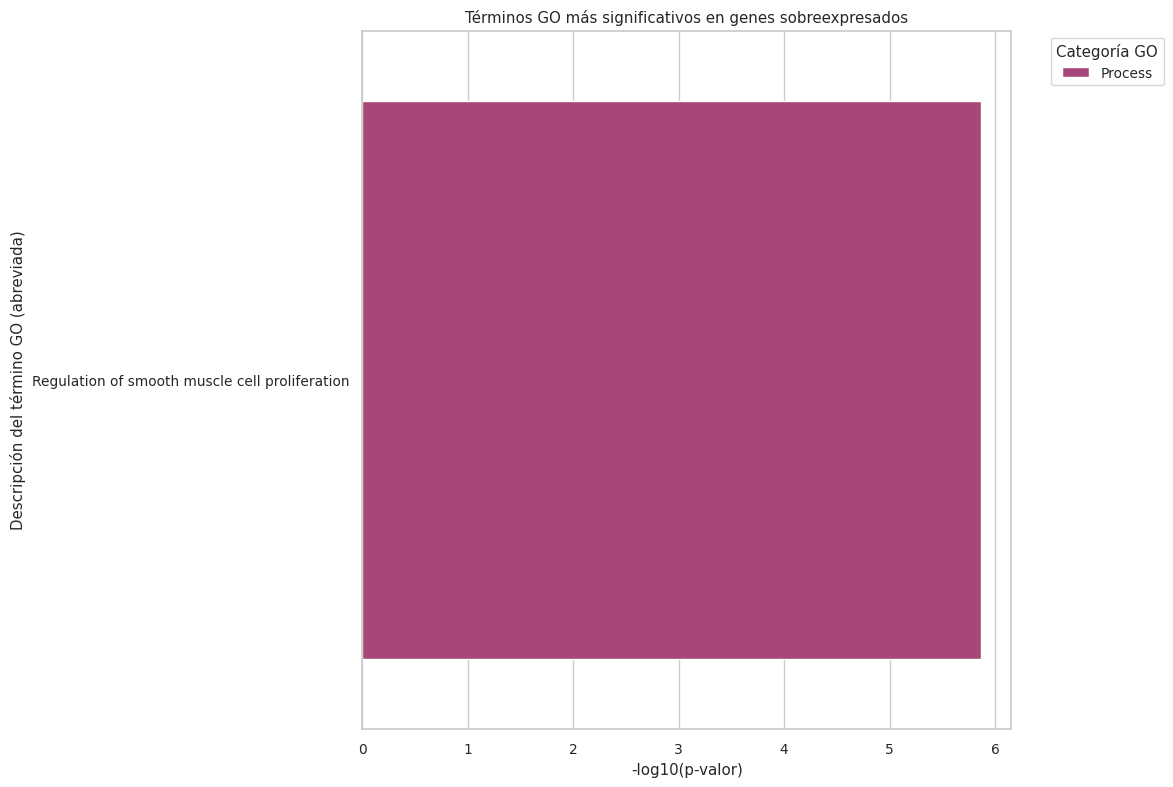

### Archivo **enriquecimiento_STRING_GO.csv** creado con éxito para explorarlo en detalle.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

def plot_top_terms(df, categoria_genes, top_n=25):
    if df.empty:
        print(f"No hay datos para {categoria_genes}.")
        return

    df_top = df.sort_values('p_value').head(top_n).copy()
    df_top['-log10(p_value)'] = -np.log10(df_top['p_value'])
    max_length = 50
    df_top['short_description'] = df_top['description'].apply(
        lambda x: x if len(x) <= max_length else x[:max_length] + '...'
    )

    # Imprimimos los valores únicos de 'category'
    print(f"Valores únicos en 'category' para {categoria_genes}: {df_top['category'].unique()}")

    # Creamos una paleta de colores utilizando la paleta 'magma'
    unique_categories = df_top['category'].unique()
    palette = sns.color_palette("magma", n_colors=len(unique_categories))

    # Creamos un diccionario que asigna un color a cada categoría
    palette_dict = dict(zip(unique_categories, palette))

    df_top['category'] = df_top['category'].astype('category')

    df_top = df_top.sort_values('-log10(p_value)', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid", font_scale=0.9)
    ax = sns.barplot(
        x='-log10(p_value)',
        y='short_description',
        hue='category',
        data=df_top,
        dodge=False,
        palette=palette_dict
    )

    plt.title(f'Términos GO más significativos en {categoria_genes}')
    plt.xlabel('-log10(p-valor)')
    plt.ylabel('Descripción del término GO (abreviada)')
    plt.legend(title='Categoría GO', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Gráficos para cada categoría (suponiendo que ya tienes cargados los DataFrames)


if len(enriquecimiento_go_subexpresados) > 0:
    plot_top_terms(enriquecimiento_go_subexpresados, 'genes subexpresados')

if len(enriquecimiento_go_estables) > 0:
    plot_top_terms(enriquecimiento_go_estables, 'genes estables')

if len(enriquecimiento_go_sobreexpresados) > 0:
    plot_top_terms(enriquecimiento_go_sobreexpresados, 'genes sobreexpresados')

# Concatenación de los 3 DataFrames
df_concatenado = pd.concat(
    [
        enriquecimiento_go_sobreexpresados,
        enriquecimiento_go_estables,
        enriquecimiento_go_subexpresados
    ],
    ignore_index=True
)

# Exportamos el DataFrame concatenado a un archivo CSV
df_concatenado.to_csv("./resultados/enriquecimiento_STRING_GO.csv", index=False)

# Mostramos el DataFrame y un mensaje de confirmación
display(Markdown("### Archivo **enriquecimiento_STRING_GO.csv** creado con éxito para explorarlo en detalle."))


# Filtrado y ordenamiento de términos PMID en el enriquecimiento funcional

Este segmento de código filtra un **DataFrame** de enriquecimiento funcional para incluir solo los términos referenciados por **PubMed ID (PMID)**, ordena los resultados según el valor de **FDR** y elimina columnas irrelevantes para el análisis.

## Descripción del proceso

### 1. Función `filtrar_enriquecimiento_pmid`

#### **Propósito**:
Filtrar el **DataFrame** de enriquecimiento para términos relacionados con **PMID** y preparar los datos para un análisis detallado.

#### **Pasos del proceso**:

1. **Validación de columnas**:
   - Se verifica que el **DataFrame** contenga las columnas requeridas: `'term'`, `'fdr'`, `'ncbiTaxonId'` y `'preferredNames'`.
   - Si alguna columna falta, se lanza una excepción `ValueError` con un mensaje indicando las columnas faltantes.

2. **Filtrado de términos PMID**:
   - Se filtran las filas del **DataFrame** donde la columna `'term'` comienza con el prefijo `"PMID:"`, lo que identifica términos referenciados por **PubMed ID**.

3. **Ordenamiento por FDR**:
   - Se ordena el **DataFrame filtrado** en orden ascendente según el valor de **FDR**, priorizando los términos más significativos.

4. **Eliminación de columnas innecesarias**:
   - Se eliminan las columnas `'ncbiTaxonId'` y `'preferredNames'`, que no son relevantes para el análisis de términos PMID.

5. **Reinicio de índices**:
   - Se reinician los índices del **DataFrame**, descartando los anteriores.

### 2. Aplicación de la función

La función `filtrar_enriquecimiento_pmid` se aplica a tres conjuntos de datos diferentes:

- **`enriquecimiento_sobreexpresados`**: Conjunto de datos de genes sobreexpresados.
- **`enriquecimiento_estables`**: Conjunto de datos de genes estables.
- **`enriquecimiento_subexpresados`**: Conjunto de datos de genes subexpresados.

Los resultados se almacenan en los siguientes **DataFrames** filtrados:

- **`enriquecimiento_pmid_sobreexpresados`**  
- **`enriquecimiento_pmid_estables`**  
- **`enriquecimiento_pmid_subexpresados`**

### 3. Manejo de excepciones

- Si el **DataFrame** de entrada no contiene las columnas requeridas, se lanza una excepción `ValueError` con un mensaje detallado.
- En caso de error, se imprime un mensaje indicando el problema durante el procesamiento de los datos.

## Salida esperada

- Tres **DataFrames** filtrados que contienen únicamente los términos relacionados con **PMID**, ordenados por su significancia.
- Las columnas irrelevantes se eliminan y los índices se reinician para facilitar el análisis posterior.


In [ ]:
def filtrar_enriquecimiento_pmid(dataframe):

    # Validar que las columnas requeridas están presentes
    columnas_requeridas = ['term', 'fdr', 'ncbiTaxonId', 'preferredNames']
    columnas_faltantes = [col for col in columnas_requeridas if col not in dataframe.columns]
    if columnas_faltantes:
        raise ValueError(f"El DataFrame no contiene las columnas requeridas: {', '.join(columnas_faltantes)}")

    # Filtrar filas donde 'term' comienza con "PMID:"
    dataframe_filtrado = dataframe[dataframe['term'].str.startswith("PMID:")]

    # Ordenar el DataFrame por 'fdr' en orden ascendente
    dataframe_ordenado = dataframe_filtrado.sort_values(by='fdr', ascending=True)

    # Eliminar las columnas 'ncbiTaxonId' y 'preferredNames'
    dataframe_ordenado = dataframe_ordenado.drop(['ncbiTaxonId', 'preferredNames'], axis=1)
    # Reiniciar los índices y descartar los antiguos
    dataframe_ordenado.reset_index(drop=True, inplace=True)

    return dataframe_ordenado

# Aplicar la función de filtrado a los diferentes conjuntos de datos
try:
    enriquecimiento_pmid_sobreexpresados = filtrar_enriquecimiento_pmid(enriquecimiento_sobreexpresados)
    enriquecimiento_pmid_estables = filtrar_enriquecimiento_pmid(enriquecimiento_estables)
    enriquecimiento_pmid_subexpresados = filtrar_enriquecimiento_pmid(enriquecimiento_subexpresados)
except ValueError as e:
    print(f"Error al procesar los datos: {e}")



# Análisis temporal de estudios relacionados con cáncer y miRNAs en términos PMID

Este segmento de código realiza un análisis temporal de estudios referenciados por **PubMed ID (PMID)**, filtrando aquellos relacionados con **cáncer** y **miRNAs**, y genera un gráfico de tendencias a lo largo de los años.

## Descripción del proceso

### 1. Extracción del año de publicación
- Se extrae el año de la columna `'description'` utilizando una expresión regular que busca patrones de cuatro dígitos entre paréntesis.
- El resultado se almacena en una nueva columna llamada `'year'`.

### 2. Definición de palabras clave
- Se definen listas de palabras clave relevantes para:
  - **Cáncer**: Palabras como `"cancer"`, `"tumor"`, `"oncology"` y términos relacionados con las características del cáncer.
  - **miRNAs**: Palabras como `"microRNA"`, `"miRNA"` y `"non-coding RNA"`.

### 3. Creación de patrones de búsqueda
- Se crean patrones de búsqueda a partir de las listas de palabras clave utilizando el carácter `'|'` (OR lógico) para combinarlas.

### 4. Filtrado de estudios
- Se filtran los estudios relacionados con:
  - **Cáncer**: Filas cuya columna `'description'` contiene alguna de las palabras clave de cáncer.
  - **miRNAs**: Filas cuya columna `'description'` contiene alguna de las palabras clave de miRNAs.
- Se combinan ambos filtros y se eliminan duplicados en el **DataFrame resultante**.

### 5. Conteo de estudios por año
- Se cuentan los estudios totales y los estudios filtrados (relacionados con cáncer y miRNAs) por año.
- Los resultados se almacenan en tres series:
  - `estudios_totales`
  - `estudios_cancer`
  - `estudios_mir`

### 6. Generación del gráfico de líneas
- Se genera un gráfico de líneas que muestra las tendencias temporales de:
  - **Estudios totales**.
  - **Estudios relacionados con cáncer**.
  - **Estudios relacionados con miRNAs**.
- Se personaliza el gráfico con:
  - Títulos y etiquetas de los ejes.
  - Leyenda descriptiva.
  - Rejilla con transparencia (`alpha=0.3`).
  - Rotación de etiquetas del eje X para mejor legibilidad.
  - Ajuste automático del diseño con `plt.tight_layout()`.

### 7. Generación de enlaces a PubMed
- Se elimina el prefijo `"PMID:"` de la columna `'term'` y se extrae el identificador de PubMed.
- Se genera un enlace directo a **PubMed** concatenando el identificador con la URL base de PubMed.
- El resultado se almacena en una nueva columna `'pubmed_link'`.

### 8. Visualización del resultado
- Se muestra un **DataFrame** final con las columnas:
  - `'description'`: Descripción del estudio.
  - `'year'`: Año de publicación.
  - `'pubmed_link'`: Enlace directo al estudio en **PubMed**.

## Salida esperada

1. **Gráfico de líneas**:
   - Un gráfico que muestra las tendencias temporales del número de estudios totales, relacionados con cáncer y relacionados con miRNAs a lo largo de los años.

2. **DataFrame con enlaces a PubMed**:
   - Un **DataFrame** que incluye la descripción del estudio, el año de publicación y un enlace directo a **PubMed** para consultar el estudio completo.


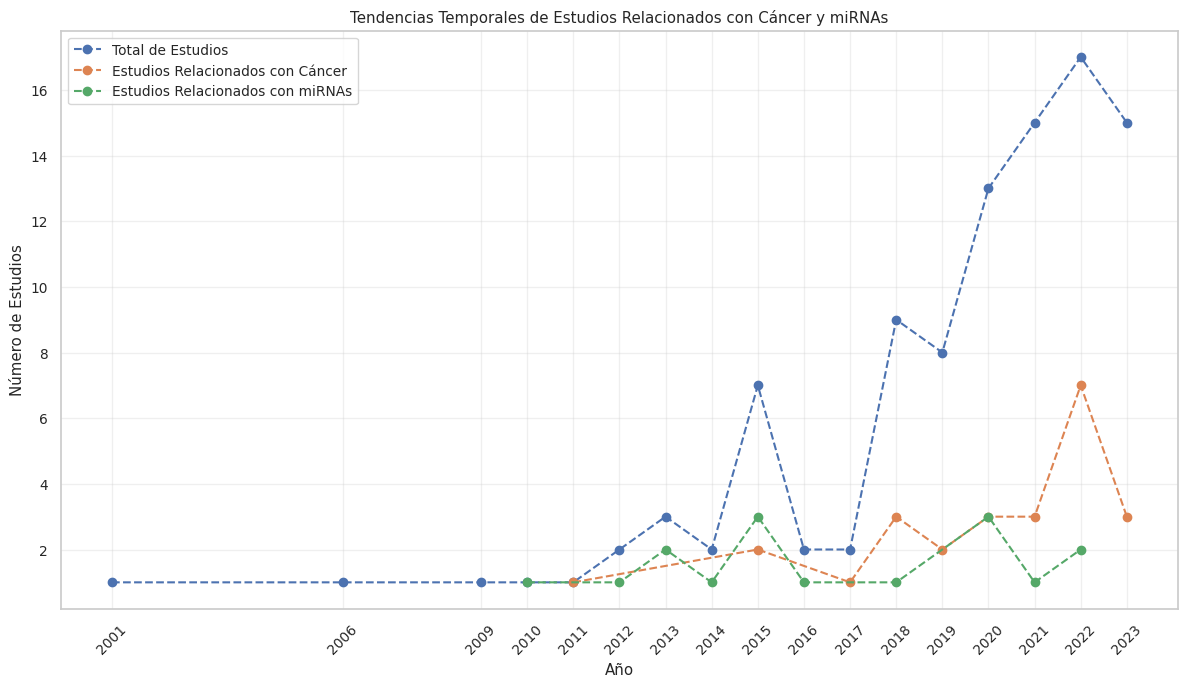

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# Extraer el año de la columna 'description'
enriquecimiento_pmid_subexpresados['year'] = enriquecimiento_pmid_subexpresados['description'].str.extract(r'\((\d{4})\)')[0].astype(int)

# Definir palabras clave relacionadas con cáncer
keywords_cancer = [
    "cancer", "tumor", "oncology", "neoplasm", "carcinogenesis", "malignancy",
    "metastasis", "biomarker", "cell proliferation", "cell differentiation",
    "evading inmune destruction", "genome instability", "replicative immoratlity",
    "reprogramming energy metabolism", "resisting cell death", "sustained angiogenesis",
    "sustaining proliferative signaling", "tissue invasion and metastasis",
    "tumor-promoting inflammation", "tumor promoting inflammation"
]

# Definir palabras clave relacionadas con miRNAs
keywords_mir = [
    "microRNA", "miRNA", "non-coding RNA", "ncRNA", "post-transcriptional regulation"
]

# Crear patrones de búsqueda
pattern_cancer = '|'.join(keywords_cancer)
pattern_mir = '|'.join(keywords_mir)

# Filtrar estudios relacionados con cáncer
filtro_cancer = enriquecimiento_pmid_subexpresados.loc[
    enriquecimiento_pmid_subexpresados['description'].str.contains(
        pattern_cancer, case=False, na=False
    )
]

# Filtrar estudios relacionados con miRNAs
filtro_mir = enriquecimiento_pmid_subexpresados.loc[
    enriquecimiento_pmid_subexpresados['description'].str.contains(
        pattern_mir, case=False, na=False
    )
]

# Combinar ambos filtros, convertir listas a cadenas y eliminar duplicados
df_interes = pd.concat([filtro_cancer, filtro_mir])
df_interes = df_interes.applymap(lambda x: str(x) if isinstance(x, list) else x).drop_duplicates().reset_index(drop=True)

# Contar estudios por año para cada categoría
estudios_totales = enriquecimiento_pmid_subexpresados['year'].value_counts().sort_index()
estudios_cancer = filtro_cancer['year'].value_counts().sort_index()
estudios_mir = filtro_mir['year'].value_counts().sort_index()

# Crear gráfico de líneas
plt.figure(figsize=(12, 7))
plt.plot(estudios_totales.index, estudios_totales.values, marker='o', linestyle='--', label='Total de Estudios')
plt.plot(estudios_cancer.index, estudios_cancer.values, marker='o', linestyle='--', label='Estudios Relacionados con Cáncer')
plt.plot(estudios_mir.index, estudios_mir.values, marker='o', linestyle='--', label='Estudios Relacionados con miRNAs')

# Etiquetas y diseño del gráfico
plt.xlabel('Año')
plt.ylabel('Número de Estudios')
plt.title('Tendencias Temporales de Estudios Relacionados con Cáncer y miRNAs')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(estudios_totales.index, rotation=45)
plt.tight_layout()
plt.show()

# Eliminar el prefijo "PMID:" y extraer el número identificador
df_interes["pubmed_id"] = df_interes["term"].str.replace("PMID:", "")

# Generar el enlace a PubMed
df_interes["pubmed_link"] = "https://pubmed.ncbi.nlm.nih.gov/" + df_interes["pubmed_id"]

# Mostrar el resultado

# Personalizar el estilo del DataFrame
df_interes[["description", "year", "pubmed_link"]]

df_interes.to_csv("./resultados/bibliografia_STRING_GEN.csv")


# Búsqueda automatizada y clasificación de artículos en PubMed para términos GO

Este segmento de código realiza una búsqueda automatizada en **PubMed** utilizando la API de **Entrez**, tomando como entrada términos **GO** y sus descripciones. Los artículos recuperados se clasifican en tres categorías: **miRNA**, **cáncer** y **ambas categorías**.

## Descripción del proceso

### 1. Configuración de la API de Entrez
- Se establece un correo electrónico y una **API Key** para el uso de la API de **Entrez**.
- Se definen las listas de términos **GO** y sus descripciones a partir del **DataFrame `enriquecimiento_go_subexpresados`**.

### 2. Definición de palabras clave
- Se crean dos listas de palabras clave:
  - **miRNA**: Contiene términos como `"microRNA"`, `"miRNA"` y `"miR-"`.
  - **Cáncer**: Contiene términos como `"cancer"`, `"tumor"`, `"oncology"` y otras palabras clave relacionadas con el cáncer y sus características.
- Se combinan ambas listas para construir una consulta general.

### 3. Función `fetch_pubmed_data`
#### **Propósito**:
Buscar artículos en **PubMed** utilizando los términos **GO** y palabras clave, y extraer la información relevante de cada artículo.

#### **Pasos del proceso**:
1. **Construcción de la consulta**:
   - Se construye una consulta combinando el término **GO**, su descripción y las palabras clave.
   
2. **Reintento automático en caso de error**:
   - Si la solicitud falla por exceder el límite de solicitudes (`HTTPError 429`), se implementa una espera exponencial antes de reintentar, hasta un máximo de 5 intentos.
   
3. **Extracción de información**:
   - Si se encuentran artículos, se extrae la siguiente información de cada uno utilizando expresiones regulares:
     - **Título** del artículo (`TI`).
     - **Año de publicación** (`DP`).
     - **Resumen** del artículo (`AB`).
     - **PMID** (`PMID`), que se utiliza para generar un enlace directo a **PubMed**.
   
4. **Clasificación por categoría**:
   - Se normaliza el texto del título y el resumen a minúsculas.
   - Se busca coincidencia con las palabras clave de **miRNA** y **cáncer**.
   - Los artículos se clasifican en tres categorías:
     - `"miRNA"`: Si contienen solo palabras clave de **miRNA**.
     - `"cancer"`: Si contienen solo palabras clave de **cáncer**.
     - `"both"`: Si contienen palabras clave de ambas categorías.

5. **Filtrado de resultados**:
   - Solo se agregan al conjunto de datos los artículos clasificados en alguna de las categorías anteriores.

### 4. Ejecución en paralelo
- Se utiliza un **ThreadPoolExecutor** para ejecutar la función en paralelo, mejorando el tiempo de procesamiento.
- Se muestra una barra de progreso utilizando **tqdm**.

### 5. Creación y exportación del DataFrame
- Se combinan los resultados en una lista y se crea un **DataFrame** con las siguientes columnas:
  - `'GO_Term'`: Término GO utilizado en la búsqueda.
  - `'GO_Description'`: Descripción del término GO.
  - `'Title'`: Título del artículo.
  - `'Year'`: Año de publicación.
  - `'Abstract'`: Resumen del artículo.
  - `'Link'`: Enlace directo al artículo en **PubMed**.
  - `'Keyword_Category'`: Categoría asignada al artículo (*miRNA*, *cancer* o *both*).
- El **DataFrame** se exporta a un archivo **CSV** llamado `'bibliografia_pubmed_STRING_GO_TERM.csv'` en la carpeta `./resultados`.

## Salida esperada

1. **DataFrame**:
   - Un **DataFrame** que contiene información detallada sobre artículos de **PubMed** relacionados con los términos GO y clasificados por categoría (*miRNA*, *cancer* o *both*).

2. **Archivo CSV**:
   - Un archivo llamado `'bibliografia_pubmed_STRING_GO_TERM.csv'` que incluye los artículos recuperados, listo para ser explorado en detalle.

3. **Mensajes en consola**:
   - Un mensaje indicando el número total de registros creados y confirmación de que los datos se guardaron correctamente en el archivo **CSV**.


In [ ]:
from Bio import Entrez
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import time
from urllib.error import HTTPError

# Configuración de la API de Entrez
Entrez.email = "sergio.castelarf@gmail.com"
Entrez.api_key = "cbcc86f288ac31140c7e0978fd743cfb0808"  # Tu API Key

# Palabras clave separadas por categoría
miRNA_keywords = ["microRNA", "miRNA", "miR-"]
cancer_keywords = [
    "cancer", "tumor", "oncology", "neoplasm", "carcinogenesis", "malignancy", "metastasis",
    "tumour", "oncogene", "oncogenic", "evading immune destruction", "genome instability",
    "replicative immortality", "reprogramming energy metabolism", "resisting cell death",
    "sustained angiogenesis", "sustaining proliferative signaling", "tissue invasion and metastasis",
    "tumor-promoting inflammation", "tumor promoting inflammation", "carcinoma", "epstein-barr", "EBV",
    "apoptosis resistance", "resistance to apoptosis", "cancer hallmark", "driver mutation",
    "immune checkpoint", "angiogenic switch", "cancer stem cell"
]

# Lista de keywords combinadas para la búsqueda en PubMed
keywords = miRNA_keywords + cancer_keywords

# Función para realizar la consulta y extraer datos
def fetch_pubmed_data(term_desc):
    term, desc = term_desc
    query = f'("{term}"[All Fields] OR "{desc}"[All Fields]) AND ("{" OR ".join(keywords)}")'

    # Reintento automático hasta 5 veces
    for attempt in range(5):
        try:
            handle = Entrez.esearch(db="pubmed", term=query, retmax=50)
            record = Entrez.read(handle)
            handle.close()
            break  # Salir del bucle si la solicitud es exitosa
        except HTTPError as e:
            if e.code == 429:
                print(f"Demasiadas solicitudes, esperando {2**attempt} segundos antes de reintentar...")
                time.sleep(2 ** attempt)  # Espera exponencial (1, 2, 4, 8, 16 segundos)
            else:
                raise e  # Re-lanzar otros errores
    else:
        print(f"No se pudo completar la solicitud para {term}")
        return []  # Retornar lista vacía si falla después de 5 intentos

    article_ids = record["IdList"]
    article_data = []

    if article_ids:
        handle = Entrez.efetch(db="pubmed", id=article_ids, rettype="medline", retmode="text")
        records = handle.read()
        handle.close()

        # Procesar cada artículo
        for record_item in records.split("\n\n"):
            title_match = re.search(r"TI  - (.+)", record_item)
            date_match = re.search(r"DP  - (\d{4})", record_item)
            abstract_match = re.search(r"AB  - (.+)", record_item, re.DOTALL)
            pmid_match = re.search(r"PMID- (\d+)", record_item)

            title = title_match.group(1) if title_match else "No title"
            year = int(date_match.group(1)) if date_match else None
            abstract = abstract_match.group(1).strip() if abstract_match else "No abstract"
            pmid = pmid_match.group(1) if pmid_match else None
            link = f"https://pubmed.ncbi.nlm.nih.gov/{pmid}" if pmid else "No link"

            # Normalizamos a minúsculas el texto para buscar coincidencias
            text_for_search = (title + " " + abstract).lower()

            # Verificamos si hay coincidencia con alguna de las palabras de cada categoría
            found_mirna = any(kw.lower() in text_for_search for kw in miRNA_keywords)
            found_cancer = any(kw.lower() in text_for_search for kw in cancer_keywords)

            # Determinamos la categoría
            if found_mirna and found_cancer:
                category = "both"
            elif found_mirna:
                category = "miRNA"
            elif found_cancer:
                category = "cancer"
            else:
                category = "none"

            # Agregar al conjunto de datos si no es "none"
            if category != "none":
                article_data.append({
                    "GO_Term": term,
                    "GO_Description": desc,
                    "Title": title,
                    "Year": year,
                    "Abstract": abstract,
                    "Link": link,
                    "Keyword_Category": category
                })

    return article_data

# Función para procesar cada DataFrame y guardar el resultado
def procesar_df_y_guardar(df, nombre_archivo):
    go_terms = df['term'].tolist()
    go_descriptions = df['description'].tolist()

    # Ejecutar la consulta en paralelo
    with ThreadPoolExecutor(max_workers=5) as executor:  # Ajusta max_workers según tu CPU
        results = list(tqdm(executor.map(fetch_pubmed_data, zip(go_terms, go_descriptions)),
                            total=len(go_terms),
                            desc=f"Procesando términos GO para {nombre_archivo}"))

    # Combinar los resultados en una sola lista
    articles_data = [article for result in results for article in result]

    # Crear DataFrame
    df_resultado = pd.DataFrame(articles_data)
    print(f"DataFrame creado con {len(df_resultado)} registros para {nombre_archivo}.")

    # Guardar DataFrame en un archivo CSV
    df_resultado.to_csv(f"./resultados/{nombre_archivo}.csv", index=False)
    print(f"Datos guardados en '{nombre_archivo}.csv'.")

    return df_resultado

# Ejecución para cada DataFrame
bibliografia_sobreexpresados_STRING  = procesar_df_y_guardar(enriquecimiento_go_sobreexpresados, "bibliografia_pubmed_STRING_GO_TERM_sobreexpresados")
bibliografia_estables_STRING = procesar_df_y_guardar(enriquecimiento_go_estables, "bibliografia_pubmed_STRING_GO_TERM_estables")
bibliografia_subexpresados_STRING = procesar_df_y_guardar(enriquecimiento_go_subexpresados, "bibliografia_pubmed_STRING_GO_TERM_subexpresados")

Procesando términos GO para bibliografia_pubmed_STRING_GO_TERM_sobreexpresados: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


DataFrame creado con 0 registros para bibliografia_pubmed_STRING_GO_TERM_sobreexpresados.
Datos guardados en 'bibliografia_pubmed_STRING_GO_TERM_sobreexpresados.csv'.


Procesando términos GO para bibliografia_pubmed_STRING_GO_TERM_estables: 100%|██████████| 45/45 [00:20<00:00,  2.24it/s]


DataFrame creado con 913 registros para bibliografia_pubmed_STRING_GO_TERM_estables.
Datos guardados en 'bibliografia_pubmed_STRING_GO_TERM_estables.csv'.


Procesando términos GO para bibliografia_pubmed_STRING_GO_TERM_subexpresados: 100%|██████████| 183/183 [01:13<00:00,  2.50it/s]


DataFrame creado con 3497 registros para bibliografia_pubmed_STRING_GO_TERM_subexpresados.
Datos guardados en 'bibliografia_pubmed_STRING_GO_TERM_subexpresados.csv'.


El DataFrame está vacío. No se generarán los gráficos para la categoría Sobreexpresados


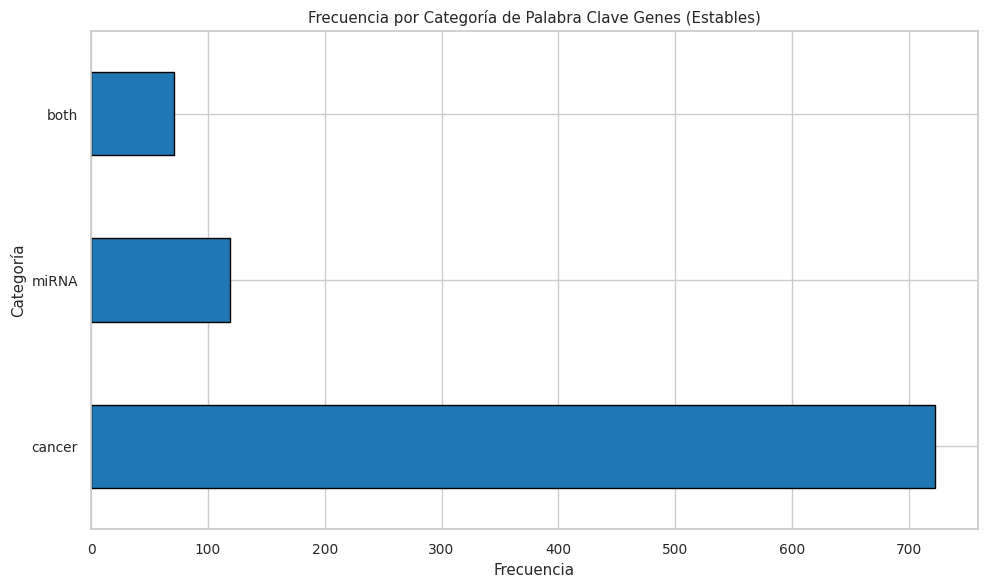

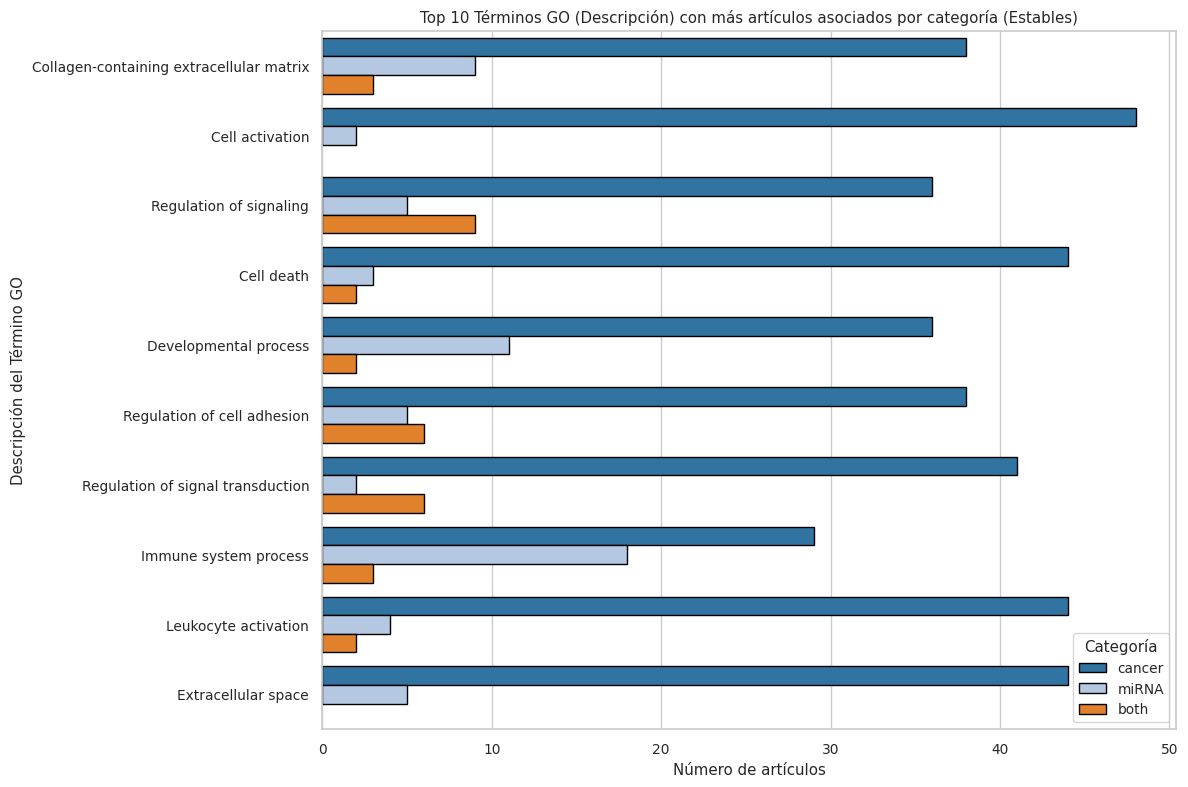

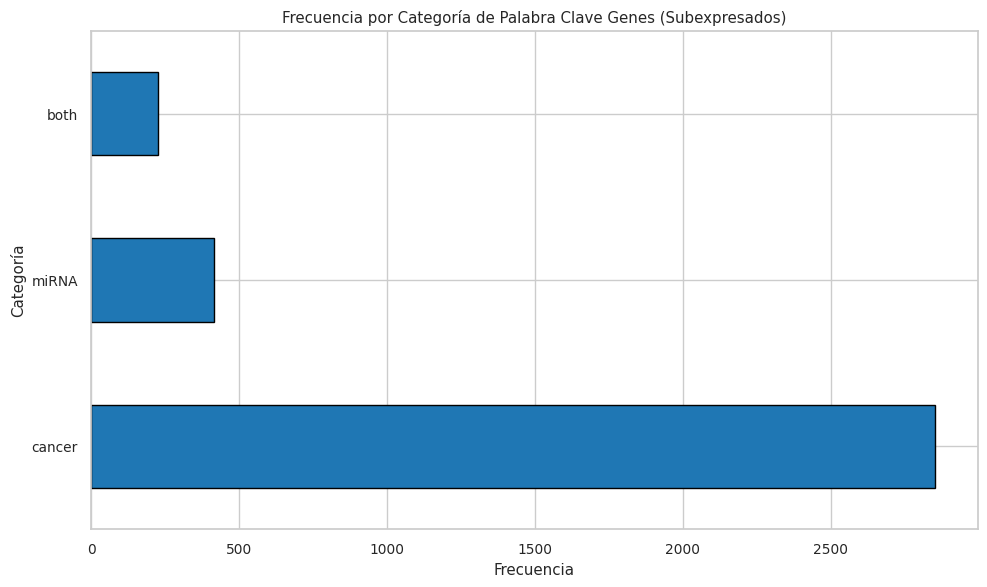

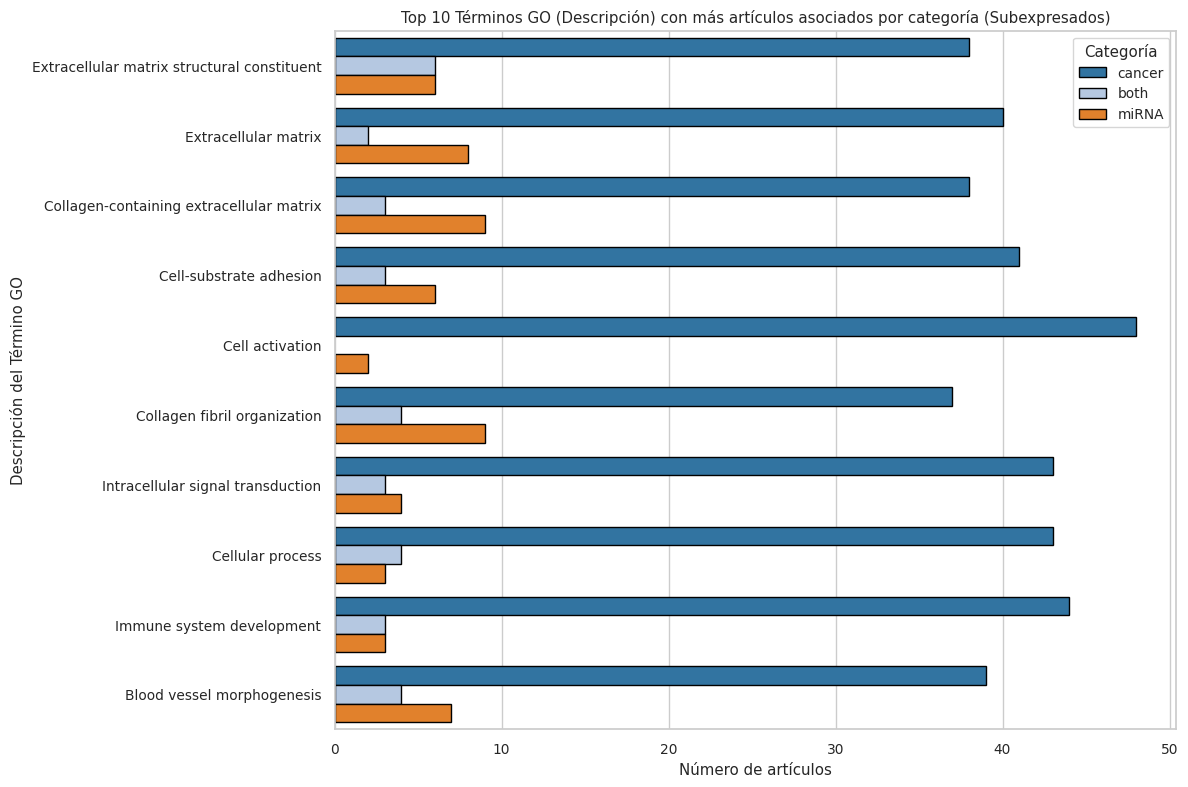

In [ ]:
def graficar_bibliografia(df_bibliografia, top_n, categoria):
    # Verificar si el DataFrame está vacío
    if df_bibliografia.empty:
        print(f"El DataFrame está vacío. No se generarán los gráficos para la categoría {categoria}")
        return

    # 1. Gráfico de barras horizontal: Frecuencia por categoría de palabra clave
    plt.figure(figsize=(10, 6))
    df_bibliografia['Keyword_Category'].value_counts().plot(kind='barh', color='tab:blue', edgecolor='black')
    plt.title(f'Frecuencia por Categoría de Palabra Clave Genes ({categoria})')
    plt.xlabel('Frecuencia')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

    # 2. Gráfico de barras apilado horizontal: Top de términos GO (descripción) con más artículos asociados y sus categorías
    top_go_descriptions = df_bibliografia['GO_Description'].value_counts().head(top_n).index
    df_top_go = df_bibliografia[df_bibliografia['GO_Description'].isin(top_go_descriptions)]

    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_top_go, y='GO_Description', hue='Keyword_Category', palette='tab20', edgecolor='black')
    plt.title(f'Top {top_n} Términos GO (Descripción) con más artículos asociados por categoría ({categoria})')
    plt.xlabel('Número de artículos')
    plt.ylabel('Descripción del Término GO')
    plt.legend(title='Categoría')
    plt.tight_layout()
    plt.show()

# Llamadas a la función para cada DataFrame
graficar_bibliografia(bibliografia_sobreexpresados_STRING, 10, "Sobreexpresados")
graficar_bibliografia(bibliografia_estables_STRING, 10, "Estables")
graficar_bibliografia(bibliografia_subexpresados_STRING, 10, "Subexpresados")

# Análisis de enriquecimiento utilizando GSEApy y conjuntos de genes personalizados

Este segmento de código realiza un análisis de enriquecimiento funcional utilizando la herramienta **GSEApy** y un conjunto de genes personalizado relacionado con **miR-29**. Además, combina los resultados obtenidos con información detallada de términos GO extraída de un archivo **JSON**.

## Descripción del proceso

### 1. Lectura del conjunto de genes de fondo
- Se lee un archivo de texto (`mir-29_gen_set.txt`) que contiene un conjunto de genes relacionados con **miR-29**.
- El contenido se procesa para extraer un conjunto único de genes de fondo.

### 2. Carga de detalles de términos GO
- Se carga un archivo **JSON** (`GO-Gene Ontology gene sets.json`) que contiene información detallada sobre los términos GO, como descripciones y referencias externas.
- Se convierte el contenido del archivo **JSON** en un **DataFrame** llamado `detalles_df`.

### 3. Análisis de enriquecimiento
- Se utiliza la función `gp.enrich` de **GSEApy** para realizar el análisis de enriquecimiento con los siguientes parámetros:
  - `gene_list`: La lista de genes de interés proporcionada por el usuario.
  - `gene_sets`: Un archivo `.gmt` que contiene los conjuntos de genes anotados en términos GO.
  - `background`: No se especifica un fondo personalizado (se usa el fondo por defecto).
  - `outdir`: Se establece como `None` para no generar archivos de salida en disco.
- Los resultados del análisis se almacenan en un **DataFrame**.

### 4. Filtrado de resultados significativos
- Se filtran los términos enriquecidos cuyo **p-value ajustado (FDR)** sea menor a 0.05.

### 5. Combinación de resultados con información adicional
- Se combinan los resultados filtrados con el **DataFrame `detalles_df`**, añadiendo información detallada sobre los términos GO.
- Se eliminan columnas irrelevantes como `'systematicName'`, `'pmid'` y URLs externas.

### 6. Ordenamiento y limpieza final
- Los resultados se ordenan por **p-value ajustado** en orden ascendente.
- Se devuelve un **DataFrame** con los términos GO enriquecidos y su información adicional.


In [ ]:
import gseapy as gp

def realizar_enriquecimiento_gseapy(lista_genes, gene_category):
    """
    Realiza el análisis de enriquecimiento para una lista de genes dada.

    Parámetros:
    - lista_genes: lista de genes de interés
    - gene_category: categoría de los genes (Subexpresados, Sobreexpresados o Estables)

    Retorna:
    - DataFrame con los resultados ordenados por p-value ajustado, incluyendo la columna GeneCategory
    """

    # Ruta al archivo que contiene el conjunto de genes de fondo
    gen_set_miR_29 = './gen-sets_GSEA_MSigDB/mir-29_gen_set.txt'

    # Leer el archivo y extraer genes únicos
    with open(gen_set_miR_29, 'r') as archivo:
        contenido = archivo.read()
        lineas = contenido.splitlines()
        genes_fondo = set()
        for linea in lineas:
            elementos = linea.split('\t')[2:]
            genes_fondo.update(elementos)

    # Ruta al archivo JSON con términos y sus detalles
    ruta_archivo_json = './gen-sets_GSEA_MSigDB/GO-Gene Ontology gene sets.json'

    # Cargar el archivo JSON con los términos y sus IDs generales
    with open(ruta_archivo_json, 'r') as archivo_json:
        datos_detalles = json.load(archivo_json)

    # Crear un DataFrame con información detallada
    detalles_df = pd.DataFrame.from_dict(datos_detalles, orient='index')
    detalles_df.reset_index(inplace=True)
    detalles_df.rename(columns={'index': 'Term'}, inplace=True)

    # Realizar el análisis de enriquecimiento utilizando gseapy
    enriquecimiento = gp.enrich(
        gene_list=lista_genes,
        gene_sets=['./gen-sets_GSEA_MSigDB/GO- Gene Ontology gene sets.gmt'],
        background=None,
        outdir=None  # No guardar resultados en disco
    )

    # Convertir resultados a DataFrame
    resultados_consolidados = enriquecimiento.results

    # Filtrar términos por p-value ajustado (FDR) < 0.05
    resultados_filtrados = resultados_consolidados[resultados_consolidados['Adjusted P-value'] < 0.05]

    # Agregar información adicional desde el JSON
    resultados_filtrados = resultados_filtrados.merge(
        detalles_df,
        on='Term',
        how='left'
    )

    # Agregar la columna 'category' según el contenido de la columna 'collection'
    resultados_filtrados['category'] = resultados_filtrados['collection'].str.extract(r'GO:(\w+)', expand=False)

    # Mapear los sufijos a nombres más legibles
    mapeo_categorias = {
        'BP': 'Process',
        'CC': 'Component',
        'MF': 'Function'
    }
    resultados_filtrados['category'] = resultados_filtrados['category'].map(mapeo_categorias).fillna('Unknown')

    # Limpiar la columna 'Term'
    resultados_filtrados['Term'] = (
        resultados_filtrados['Term']
        .str.replace(r'^GO\w{2}_', '', regex=True)  # Eliminar prefijo GOXX_
        .str.replace('_', ' ')                      # Reemplazar guiones bajos por espacios
        .str.lower()                                # Convertir a minúsculas
    )

    resultados_filtrados[['number_of_genes', 'number_of_genes_in_background']] = (
    resultados_filtrados['Overlap']
    .str.split('/', expand=True)
    .astype(int)  # Convertir a tipo entero
)

    # Agregar la nueva columna GeneCategory
    resultados_filtrados['GeneCategory'] = gene_category

    # Ordenar los resultados por p-value ajustado
    resultados_ordenados = resultados_filtrados.sort_values(by="Adjusted P-value")

    # Renombrar columnas
    resultados_ordenados.rename(columns={'exactSource': 'term', 'Genes': 'inputGenes', 'P-value': 'p_value', 'Term': 'description'}, inplace=True)

    # Convertir la columna 'inputGenes' a listas de Python
    resultados_ordenados['inputGenes'] = resultados_ordenados['inputGenes'].apply(lambda x: x.split(';'))

    # Eliminar columnas innecesarias
    resultados_ordenados = resultados_ordenados.drop(columns=['Gene_set',
        'systematicName', 'pmid', 'externalDetailsURL',
        'msigdbURL', 'filteredBySimilarity', 'externalNamesForSimilarTerms', 'Overlap', 'collection', 'geneSymbols'
    ])

    return resultados_ordenados


# Realizar el análisis de enriquecimiento para las diferentes listas de genes
enriquecimiento_go_gseapy_sobreexpresados = realizar_enriquecimiento_gseapy(lista_sobreexpresion, "Sobreexpresados")
enriquecimiento_go_gseapy_estables = realizar_enriquecimiento_gseapy(lista_estables, "Estables")
enriquecimiento_go_gseapy_subexpresados = realizar_enriquecimiento_gseapy(lista_subexpresados, "Subexpresados")

enriquecimiento_go_gseapy_consolidado = pd.concat([enriquecimiento_go_gseapy_sobreexpresados, enriquecimiento_go_gseapy_estables, enriquecimiento_go_gseapy_subexpresados], axis=0, ignore_index=True)

enriquecimiento_go_gseapy_consolidado.to_csv('./resultados/enriquecimiento_gseapy_go.csv')

## Distribución de términos GO para el enriquecimiento via gseapy

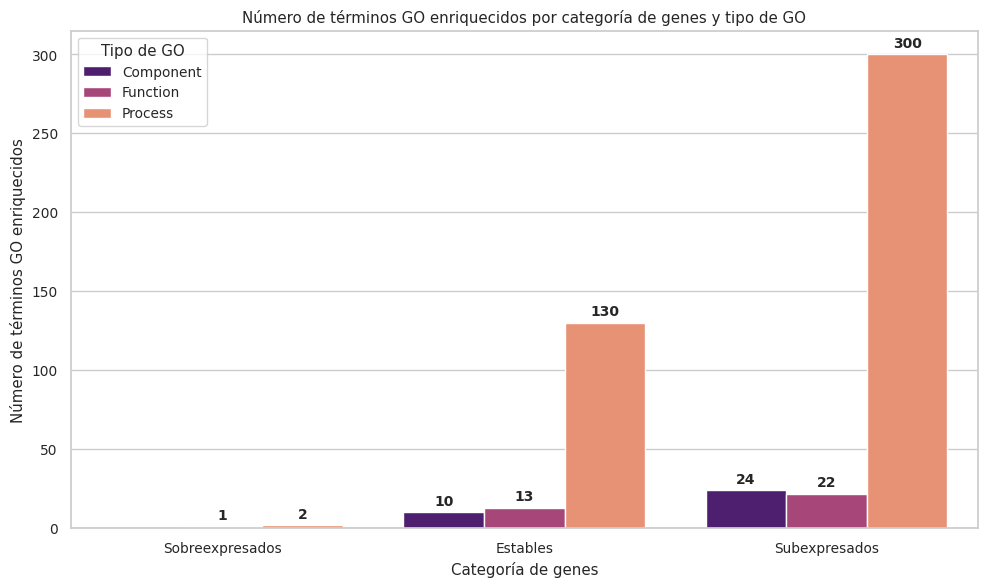

In [ ]:
display(Markdown("## Distribución de términos GO para el enriquecimiento via gseapy"))
graficar_enriquecimiento_go(enriquecimiento_go_gseapy_sobreexpresados, enriquecimiento_go_gseapy_estables, enriquecimiento_go_gseapy_subexpresados)

Valores únicos en 'category' para genes subexpresados: ['Component' 'Function' 'Process']


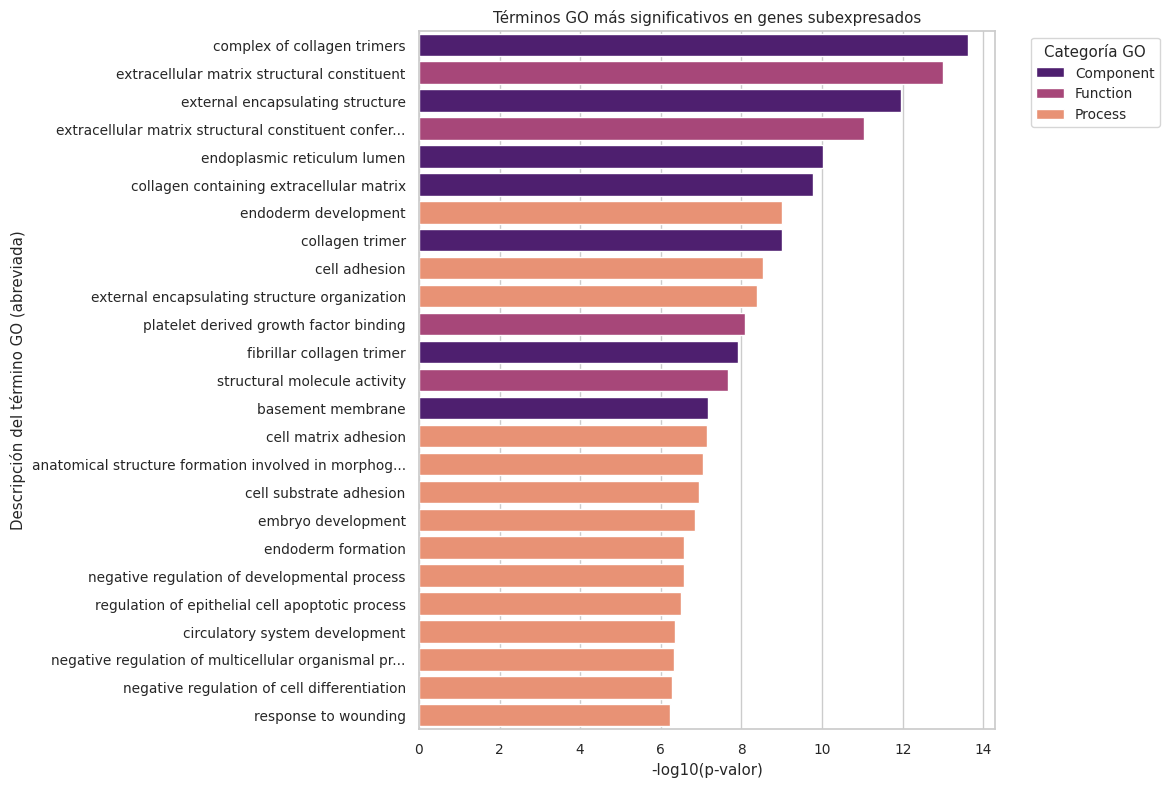

Valores únicos en 'category' para genes estables: ['Function' 'Process' 'Component']


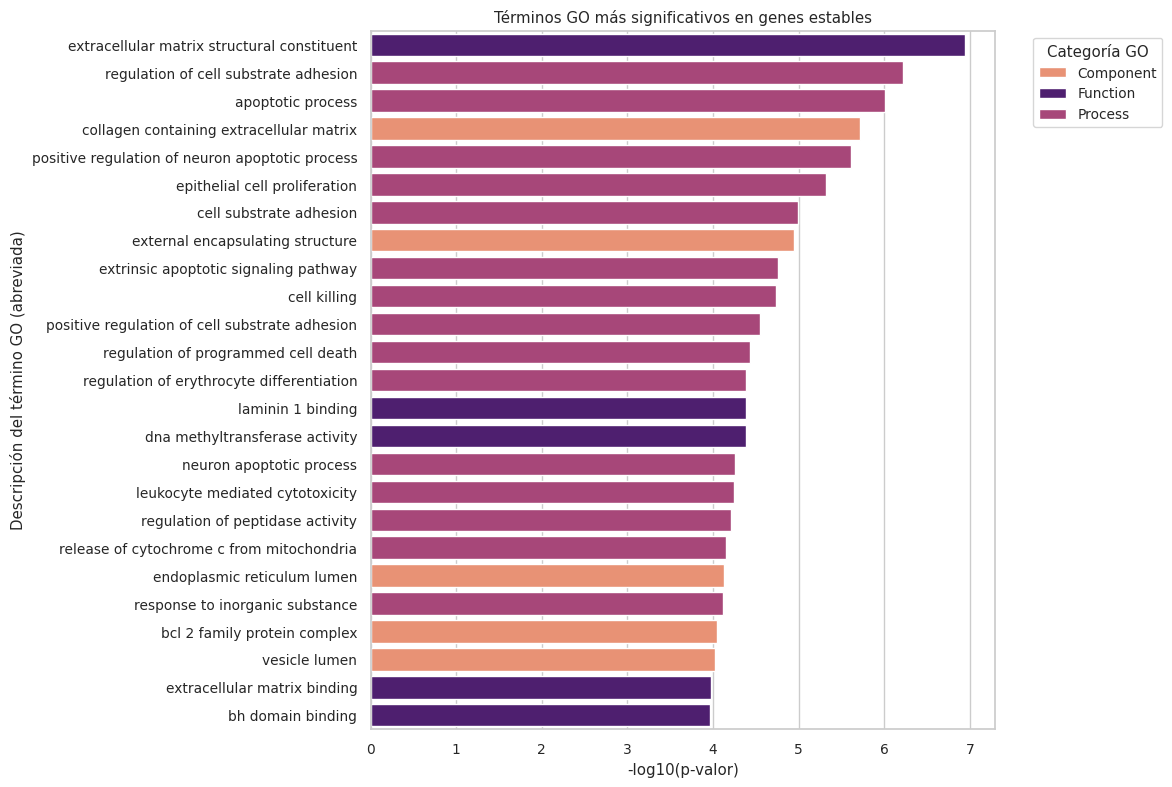

Valores únicos en 'category' para genes sobreexpresados: ['Process' 'Function']


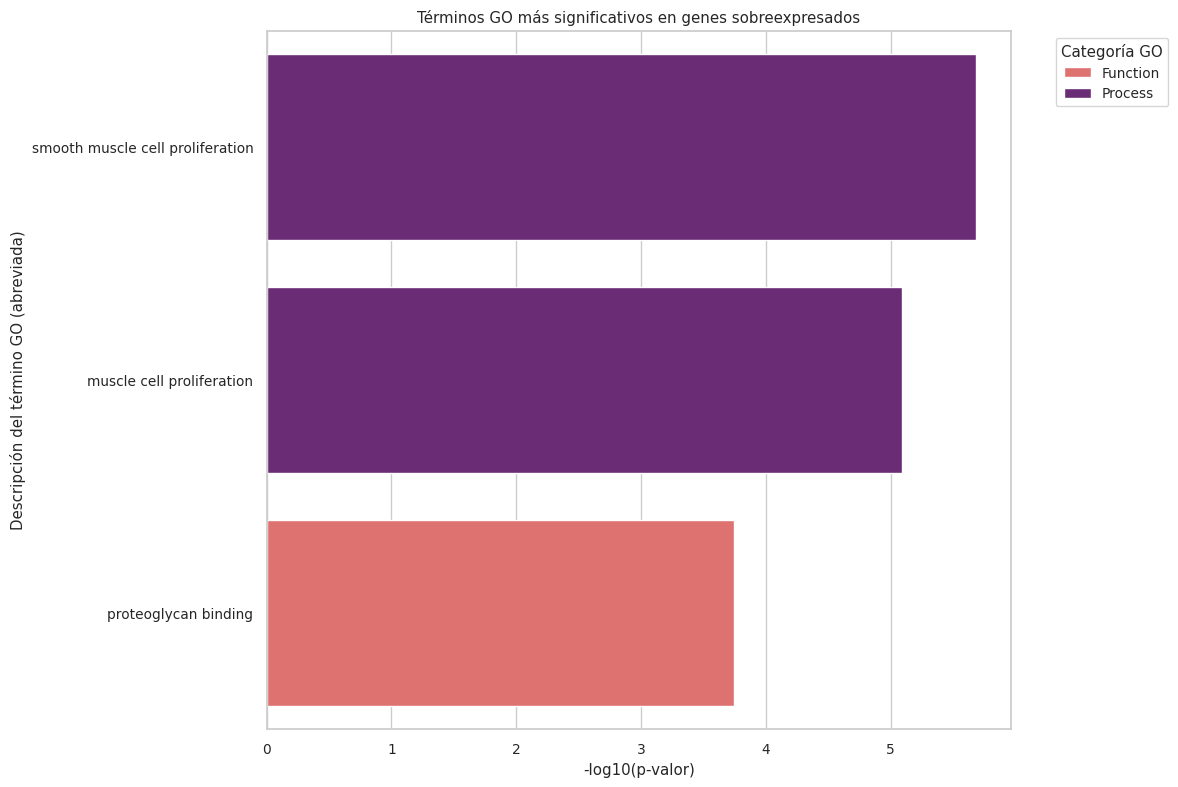

In [ ]:
# Gráficos para cada categoría (suponiendo que ya tienes cargados los DataFrames)

if len(enriquecimiento_go_gseapy_subexpresados) > 0:
    plot_top_terms(enriquecimiento_go_gseapy_subexpresados, 'genes subexpresados')

if len(enriquecimiento_go_gseapy_estables) > 0:
    plot_top_terms(enriquecimiento_go_gseapy_estables, 'genes estables')

if len(enriquecimiento_go_gseapy_sobreexpresados) > 0:
    plot_top_terms(enriquecimiento_go_gseapy_sobreexpresados, 'genes sobreexpresados')



In [ ]:
# Ejecución para cada DataFrame
bibliografia_gseapy_subexpresados = procesar_df_y_guardar(enriquecimiento_go_gseapy_subexpresados, "bibliografia_pubmed_gseapy_GO_subexpresados")
bibliografia_gseapy_estables = procesar_df_y_guardar(enriquecimiento_go_gseapy_estables, "bibliografia_pubmed_gseapy_GO_estables")
bibliografia_gseapy_sobreexpresados = procesar_df_y_guardar(enriquecimiento_go_gseapy_sobreexpresados, "bibliografia_pubmed_gseapy_GO_sobreexpresados")


Procesando términos GO para bibliografia_pubmed_gseapy_GO_subexpresados: 100%|██████████| 346/346 [02:13<00:00,  2.59it/s]


DataFrame creado con 6141 registros para bibliografia_pubmed_gseapy_GO_subexpresados.
Datos guardados en 'bibliografia_pubmed_gseapy_GO_subexpresados.csv'.


Procesando términos GO para bibliografia_pubmed_gseapy_GO_estables: 100%|██████████| 153/153 [00:59<00:00,  2.57it/s]


DataFrame creado con 2795 registros para bibliografia_pubmed_gseapy_GO_estables.
Datos guardados en 'bibliografia_pubmed_gseapy_GO_estables.csv'.


Procesando términos GO para bibliografia_pubmed_gseapy_GO_sobreexpresados: 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

DataFrame creado con 132 registros para bibliografia_pubmed_gseapy_GO_sobreexpresados.
Datos guardados en 'bibliografia_pubmed_gseapy_GO_sobreexpresados.csv'.


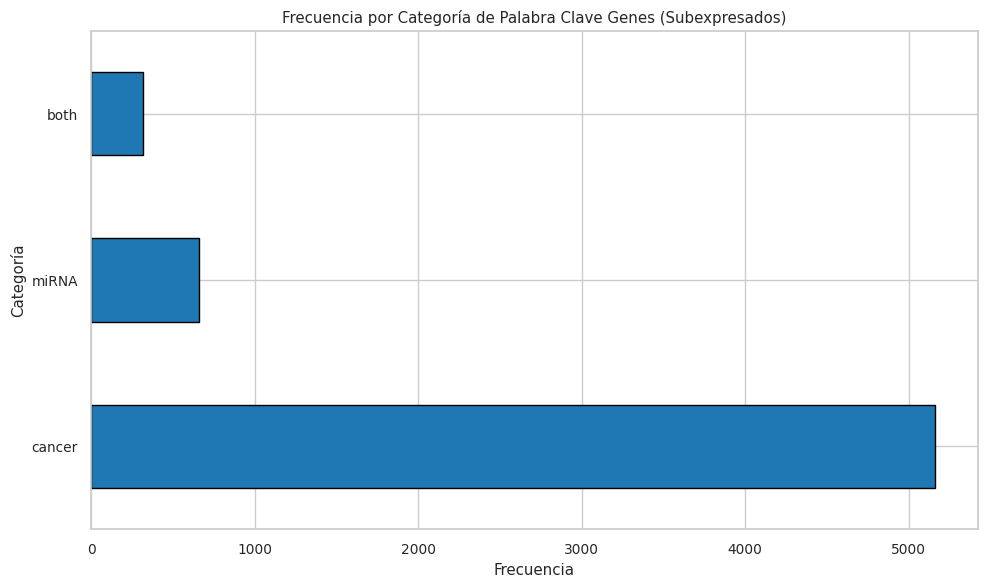

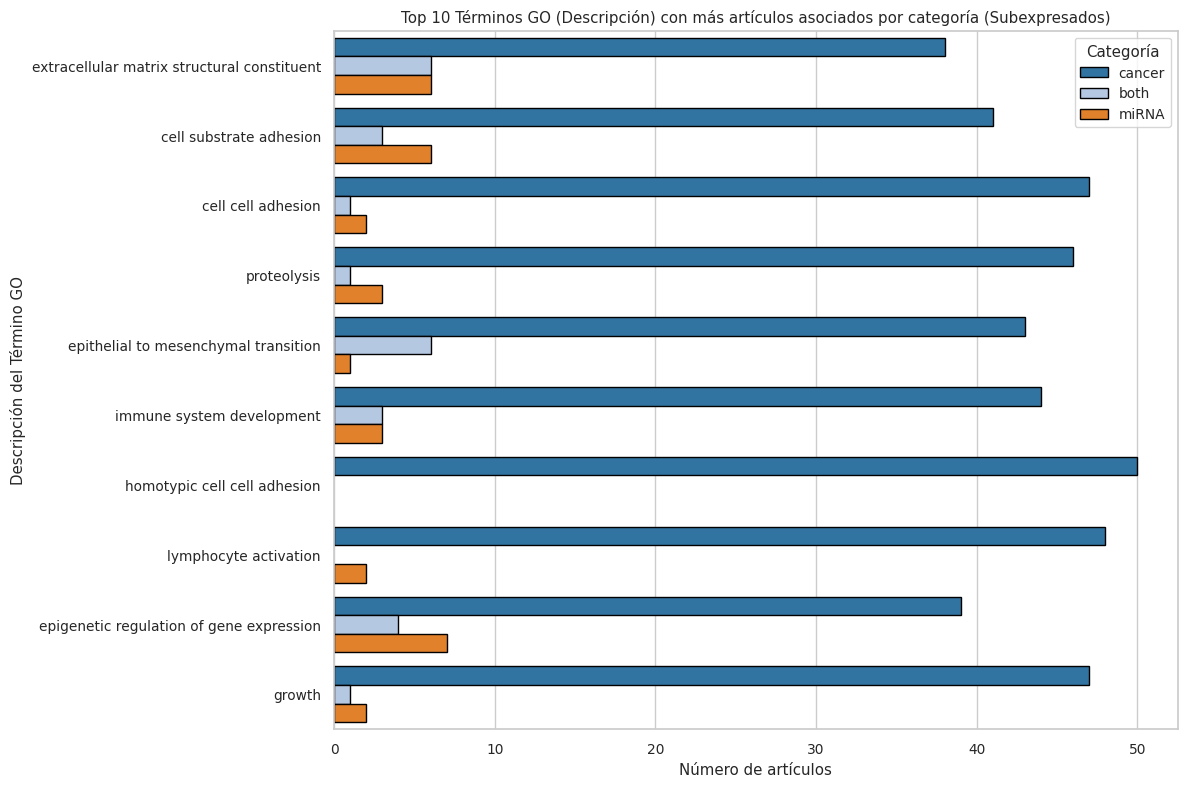

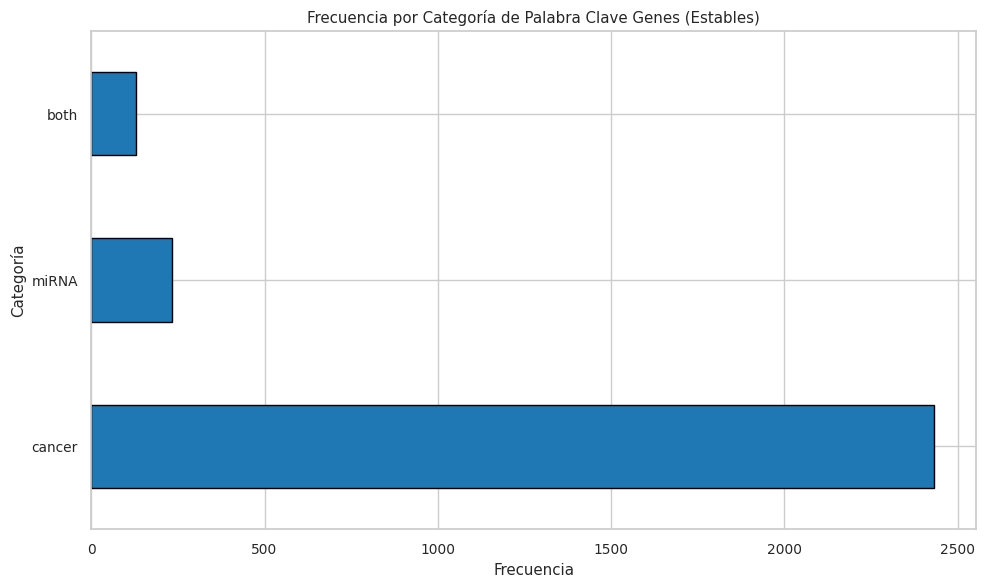

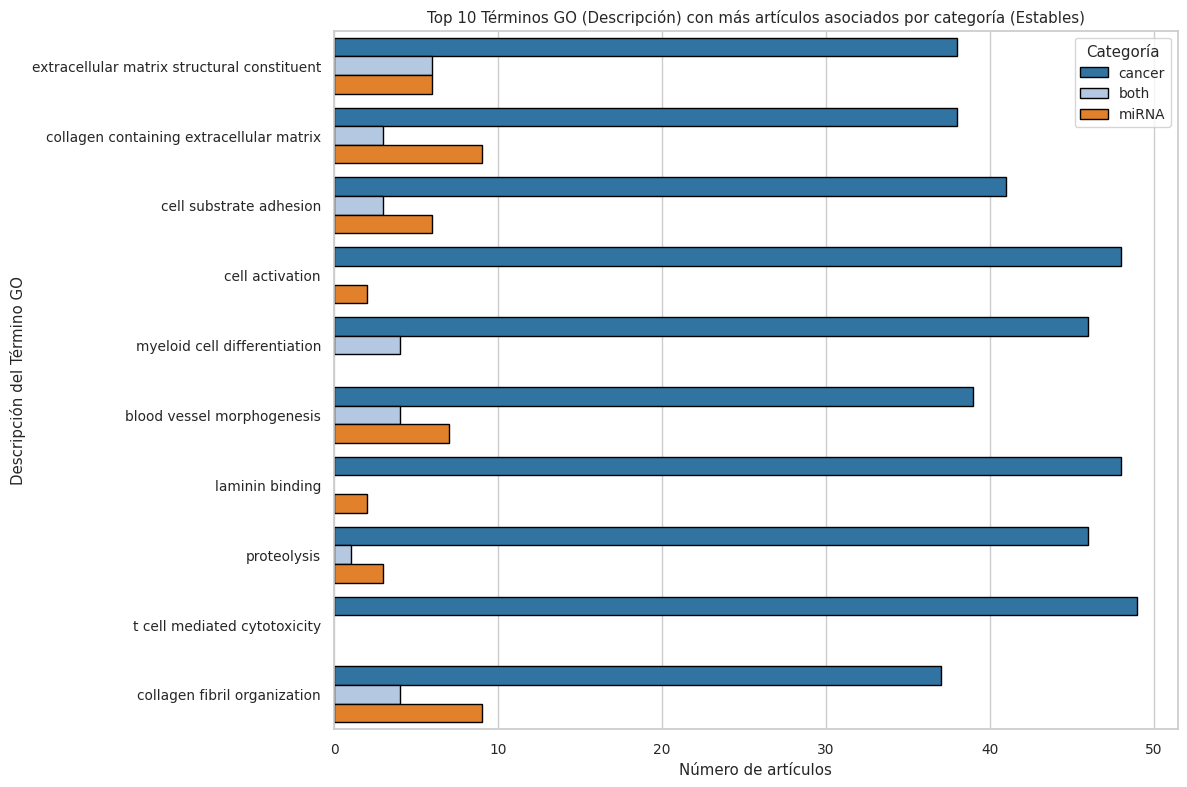

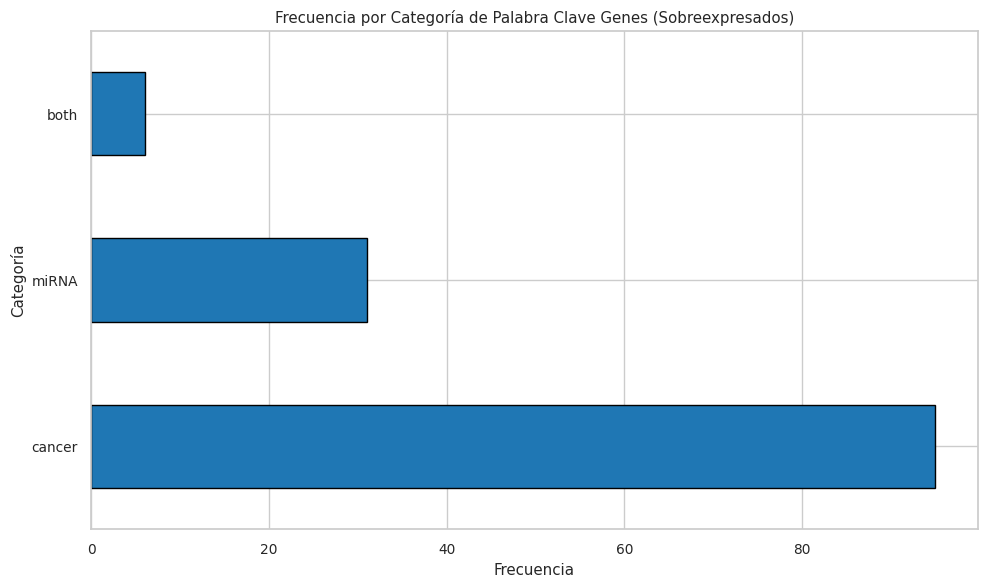

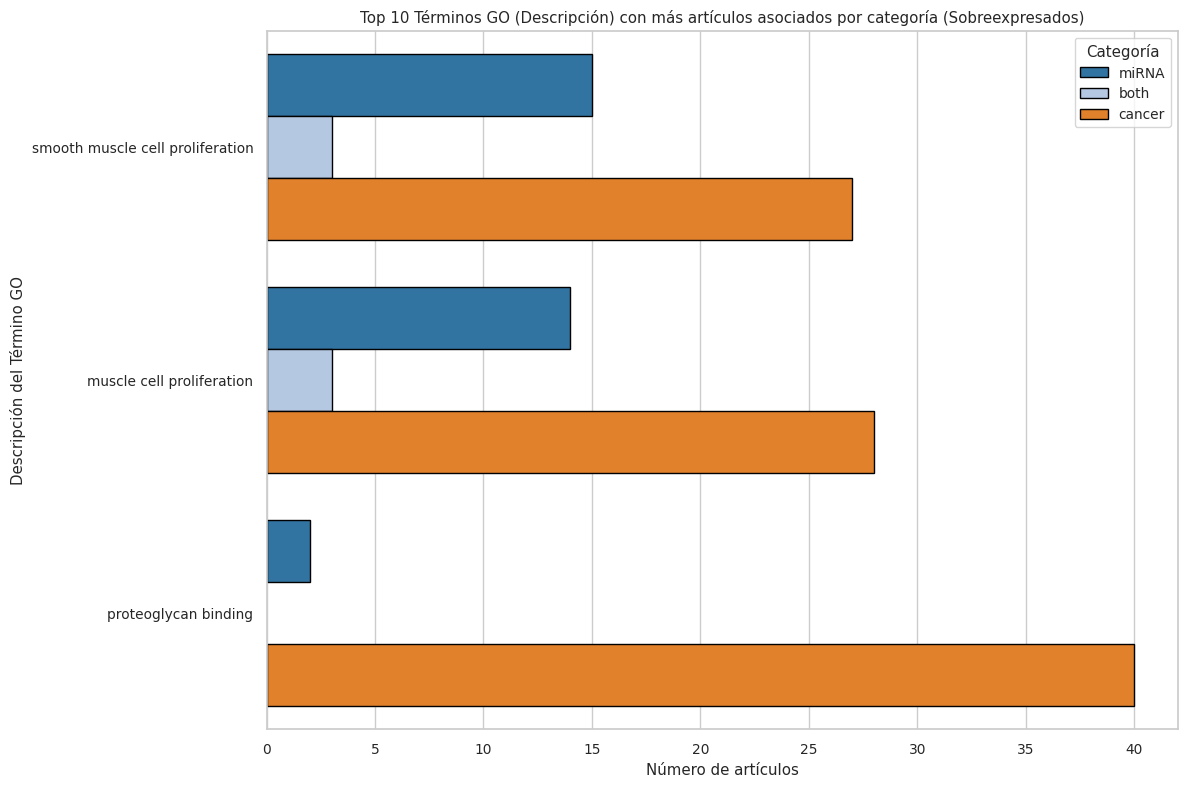

In [ ]:
graficar_bibliografia(bibliografia_gseapy_subexpresados, 10, "Subexpresados")
graficar_bibliografia(bibliografia_gseapy_estables, 10, "Estables")
graficar_bibliografia(bibliografia_gseapy_sobreexpresados, 10, "Sobreexpresados")

## Emulación hallmarkscancer.com


In [ ]:
import pandas as pd
import gseapy as gp

# Paso 1: Procesar el archivo C5-ontology para obtener el conjunto de fondo
unique_genes = set()

with open("./gen-sets_GSEA_MSigDB/C5- ontology gene sets.gmt", "r") as file:

    for line in file:
        # Dividir por tabuladores y tomar los genes a partir de la tercera columna
        genes = line.strip().split("\t")[2:]
        unique_genes.update(genes)

# Convertir el conjunto a una lista ordenada
unique_genes_list = sorted(unique_genes)

# Paso 2: Definir la función de enriquecimiento utilizando el conjunto de fondo
def hallmarks_enrichment(lista_de_expresion, background_genes):
    hallmark_results = gp.enrich(
        gene_list=lista_de_expresion,
        gene_sets="./gen-sets_GSEA_MSigDB/gsea_hallmarks_formatted.gmt",
        background=background_genes,  # Conjunto de fondo generado
        outdir=None,
        verbose=True
    )

    # Convertir los resultados a un DataFrame
    hallmark_df = hallmark_results.results

    # Filtrar y mostrar resultados significativos (p-valor ajustado < 0.05)
    #hallmark_df = hallmark_df[hallmark_df['Adjusted P-value'] < 0.05]

    display(hallmark_df[['Term', 'Adjusted P-value', 'Overlap']])
    return hallmark_df

# Paso 3: Ejecutar la función para diferentes listas de expresión génica
print("\nsobrexpresados")
hallmarks_sobreexpresados = hallmarks_enrichment(lista_sobreexpresion, unique_genes_list)
print("\nestables")
hallmarks_estables = hallmarks_enrichment(lista_estables, unique_genes_list)
print("\nsubexpresados")
hallmarks_subexpresados = hallmarks_enrichment(lista_subexpresados, unique_genes_list)



2025-01-14 01:35:57,922 [INFO] User defined gene sets is given: ./gen-sets_GSEA_MSigDB/gsea_hallmarks_formatted.gmt
2025-01-14 01:35:57,927 [INFO] Run: gsea_hallmarks_formatted.gmt 
2025-01-14 01:35:57,947 [INFO] Done.



sobrexpresados


,Term,Adjusted P-value,Overlap
0,EVADING GROWTH SUPPRESSORS,0.638323,2/3195
1,EVADING IMMUNE DESTRUCTION,0.450962,1/718
2,REPLICATIVE IMMORTALITY,0.450962,1/535
3,REPROGRAMMING ENERGY METABOLISM,0.450962,1/683
4,RESISTING CELL DEATH,0.664722,1/1846
5,SUSTAINING PROLIFERATIVE SIGNALING,0.450962,3/3446
6,TISSUE INVASION AND METASTASIS,0.450962,3/2218
7,TUMOR-PROMOTING INFLAMMATION,0.450962,1/719


2025-01-14 01:35:57,978 [INFO] User defined gene sets is given: ./gen-sets_GSEA_MSigDB/gsea_hallmarks_formatted.gmt
2025-01-14 01:35:57,985 [INFO] Run: gsea_hallmarks_formatted.gmt 
2025-01-14 01:35:58,004 [INFO] Done.



estables


,Term,Adjusted P-value,Overlap
0,EVADING GROWTH SUPPRESSORS,0.002073,12/3195
1,EVADING IMMUNE DESTRUCTION,0.006451,5/718
2,GENOME INSTABILITY,0.275849,2/715
3,REPLICATIVE IMMORTALITY,0.057645,3/535
4,REPROGRAMMING ENERGY METABOLISM,0.091387,3/683
5,RESISTING CELL DEATH,0.000035,12/1846
6,SUSTAINED ANGIOGENESIS,0.002073,6/762
7,SUSTAINING PROLIFERATIVE SIGNALING,0.009542,11/3446
8,TISSUE INVASION AND METASTASIS,0.002073,10/2218
9,TUMOR-PROMOTING INFLAMMATION,0.275849,2/719


2025-01-14 01:35:58,031 [INFO] User defined gene sets is given: ./gen-sets_GSEA_MSigDB/gsea_hallmarks_formatted.gmt
2025-01-14 01:35:58,039 [INFO] Run: gsea_hallmarks_formatted.gmt 
2025-01-14 01:35:58,060 [INFO] Done.



subexpresados


,Term,Adjusted P-value,Overlap
0,EVADING GROWTH SUPPRESSORS,2.758735e-02,13/3195
1,EVADING IMMUNE DESTRUCTION,1.690708e-03,7/718
2,GENOME INSTABILITY,1.690708e-03,7/715
3,REPLICATIVE IMMORTALITY,1.690708e-03,6/535
4,REPROGRAMMING ENERGY METABOLISM,1.690708e-03,7/683
5,RESISTING CELL DEATH,9.155793e-09,20/1846
6,SUSTAINED ANGIOGENESIS,7.761361e-04,8/762
7,SUSTAINING PROLIFERATIVE SIGNALING,9.193633e-05,20/3446
8,TISSUE INVASION AND METASTASIS,1.657440e-08,21/2218
9,TUMOR-PROMOTING INFLAMMATION,8.297327e-02,4/719


### Graficos enriquecimiento hallmarks


Gráfico para genes sobreexpresados


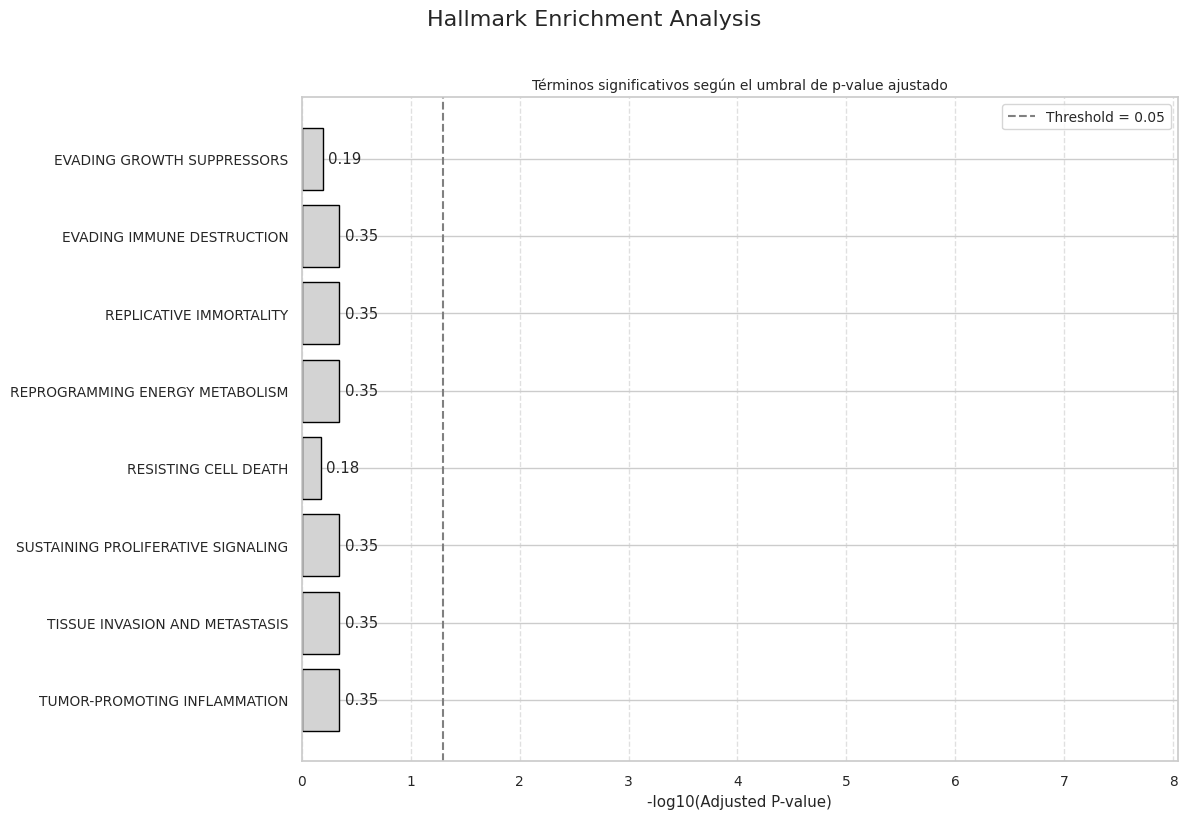


Gráfico para genes estables


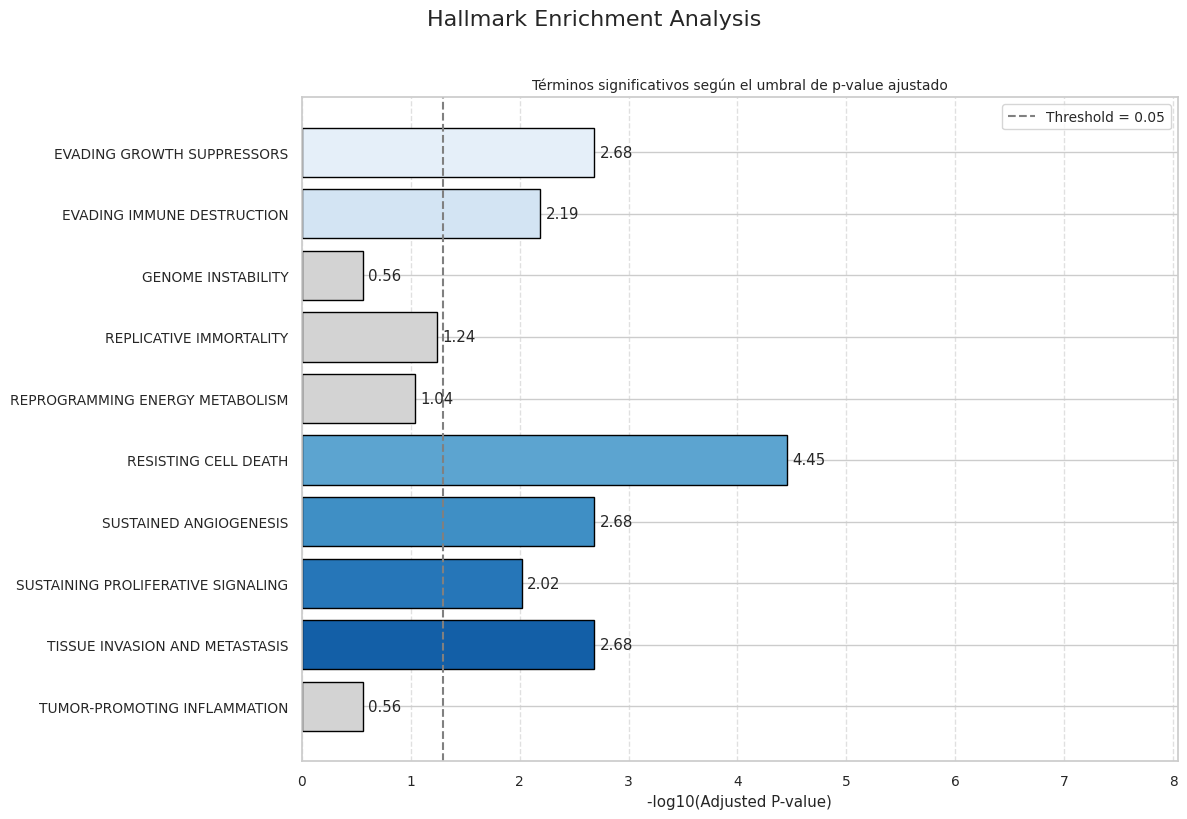


Gráfico para genes subexpresados


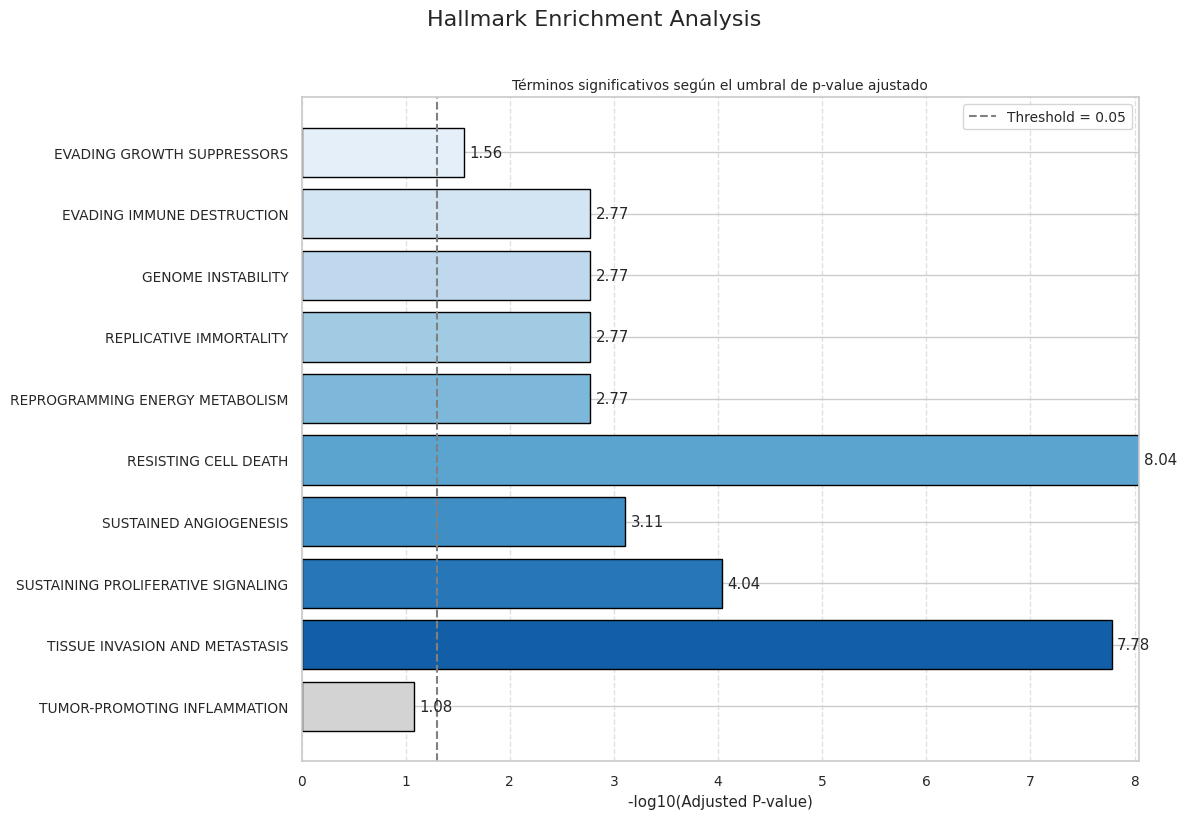

In [ ]:

# Función para graficar los resultados de enriquecimiento
def plot_hallmark_enrichment(hallmark_df, xlim_max):
    # Calcular el -log10 del p-value ajustado
    hallmark_df["-log10(Adjusted P-value)"] = -np.log10(hallmark_df["Adjusted P-value"])

    # Crear una gradación de color usando la paleta "Blues"
    colors = sns.color_palette("Blues", len(hallmark_df))
    colors = [colors[i] if p <= 0.05 else 'lightgray' for i, p in enumerate(hallmark_df["Adjusted P-value"])]

    # Graficar los términos vs -log10 del p-value ajustado
    plt.figure(figsize=(12, 8))
    bars = plt.barh(hallmark_df["Term"], hallmark_df["-log10(Adjusted P-value)"], color=colors, edgecolor='black')

    # Etiquetas sobre las barras
    for bar, value in zip(bars, hallmark_df["-log10(Adjusted P-value)"]):
        plt.text(value + 0.05, bar.get_y() + bar.get_height() / 2, f"{value:.2f}", va='center')

    # Personalización del gráfico
    plt.suptitle("Hallmark Enrichment Analysis", fontsize=16, y=1.02)
    plt.title("Términos significativos según el umbral de p-value ajustado", fontsize=10)
    plt.xlabel("-log10(Adjusted P-value)")
    plt.gca().invert_yaxis()  # Invertir el eje y para que el término con menor p-value esté arriba
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.axvline(-np.log10(0.05), color='gray', linestyle='--', label='Threshold = 0.05')
    plt.xlim(0, xlim_max)  # Establecer el mismo límite del eje X en todos los gráficos
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Calcular el valor máximo de -log10(Adjusted P-value) entre los tres conjuntos de datos
xlim_max = max(
    -np.log10(hallmarks_sobreexpresados["Adjusted P-value"].min()),
    -np.log10(hallmarks_estables["Adjusted P-value"].min()),
    -np.log10(hallmarks_subexpresados["Adjusted P-value"].min())
)

# Ejecutar la función con los DataFrames de resultados y el mismo límite de escala
print("\nGráfico para genes sobreexpresados")
plot_hallmark_enrichment(hallmarks_sobreexpresados, xlim_max)

print("\nGráfico para genes estables")
plot_hallmark_enrichment(hallmarks_estables, xlim_max)

print("\nGráfico para genes subexpresados")
plot_hallmark_enrichment(hallmarks_subexpresados, xlim_max)

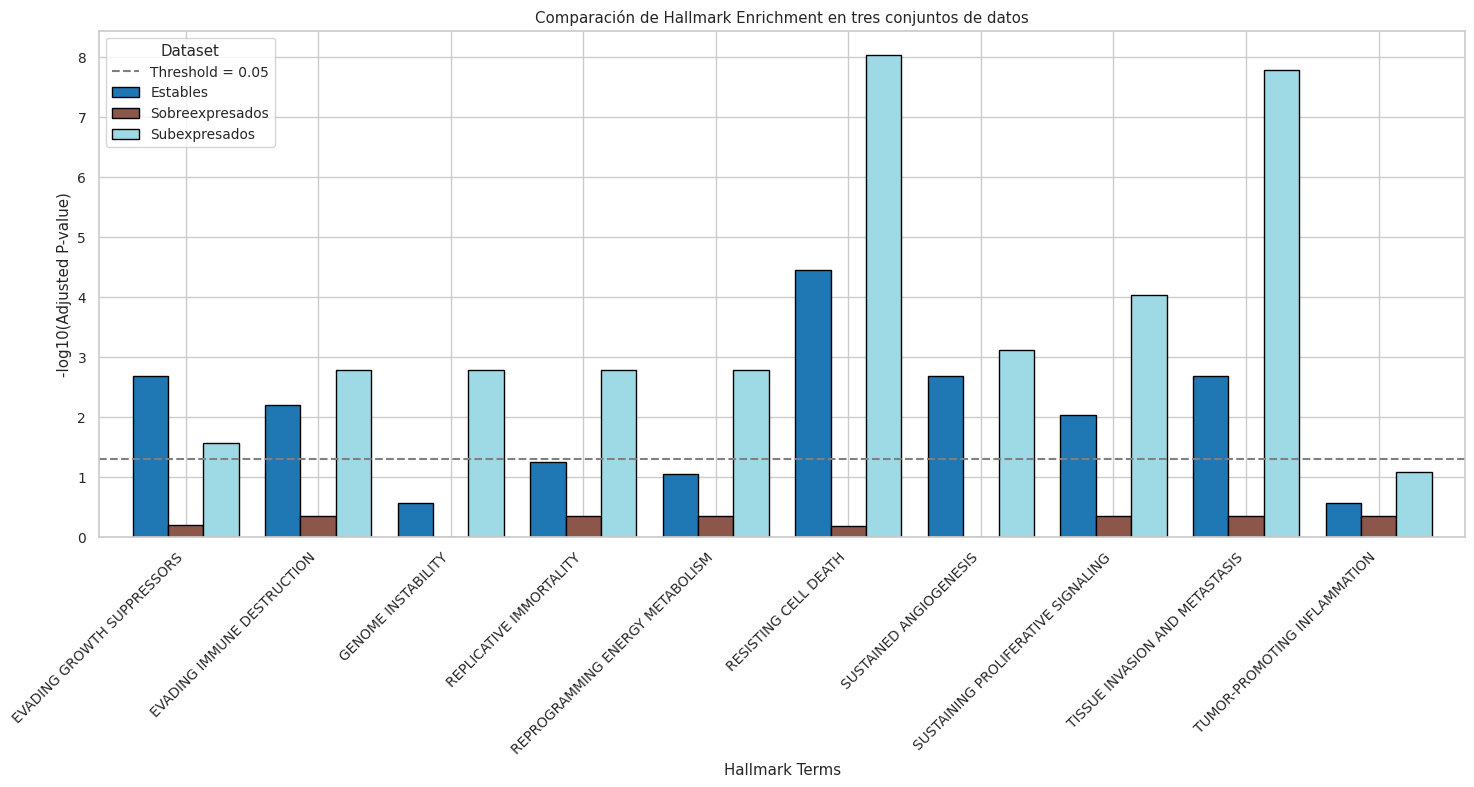

In [ ]:
# Función para preparar los datos de los tres conjuntos
def prepare_comparison_data(datasets, labels):
    comparison_df = pd.DataFrame()
    for data, label in zip(datasets, labels):
        data["-log10(Adjusted P-value)"] = -np.log10(data["Adjusted P-value"])
        data["Dataset"] = label
        comparison_df = pd.concat([comparison_df, data], axis=0)
    return comparison_df

# Preparar los datos para el gráfico comparativo
datasets = [hallmarks_sobreexpresados, hallmarks_estables, hallmarks_subexpresados]
labels = ["Sobreexpresados", "Estables", "Subexpresados"]
comparison_df = prepare_comparison_data(datasets, labels)

# Pivotear los datos para agrupar por términos
comparison_pivot = comparison_df.pivot(index="Term", columns="Dataset", values="-log10(Adjusted P-value)").fillna(0)

# Crear el gráfico de barras agrupadas
comparison_pivot.plot(kind="bar", figsize=(15, 8), width=0.8, colormap="tab20", edgecolor="black")

# Personalización del gráfico
plt.axhline(-np.log10(0.05), color='gray', linestyle='--', label='Threshold = 0.05')
plt.xlabel("Hallmark Terms")
plt.ylabel("-log10(Adjusted P-value)")
plt.title("Comparación de Hallmark Enrichment en tres conjuntos de datos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

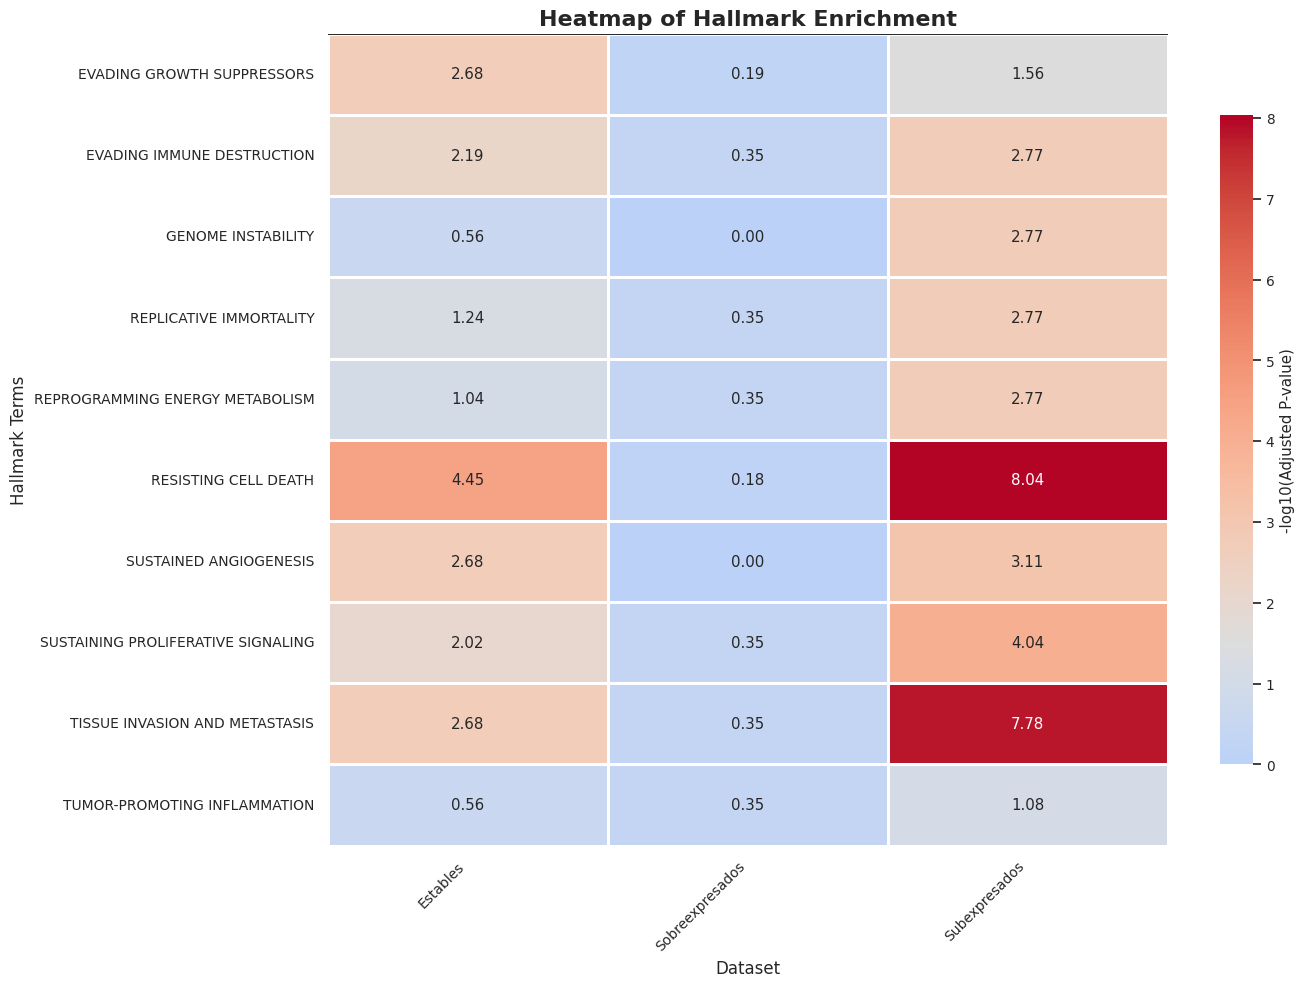

In [ ]:

# Función para preparar los datos del heatmap
def prepare_heatmap_data(datasets, labels):
    heatmap_df = pd.DataFrame()
    for data, label in zip(datasets, labels):
        data["-log10(Adjusted P-value)"] = -np.log10(data["Adjusted P-value"])
        data["Dataset"] = label
        heatmap_df = pd.concat([heatmap_df, data[["Term", "-log10(Adjusted P-value)", "Dataset"]]], axis=0)
    return heatmap_df.pivot(index="Term", columns="Dataset", values="-log10(Adjusted P-value)").fillna(0)

# Preparar los datos para el heatmap
datasets = [hallmarks_sobreexpresados, hallmarks_estables, hallmarks_subexpresados]
labels = ["Sobreexpresados", "Estables", "Subexpresados"]
heatmap_data = prepare_heatmap_data(datasets, labels)

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.8,
    cbar_kws={"label": "-log10(Adjusted P-value)", "shrink": 0.8},
    center=1.5  # Centrar la escala de color en 1.5
)

# Añadir líneas de significancia
threshold_line = -np.log10(0.05)
plt.axhline(y=0, color='black', linewidth=1.2)  # Línea de umbral

# Personalización del gráfico
plt.title("Heatmap of Hallmark Enrichment", fontsize=16, fontweight='bold')
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Hallmark Terms", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

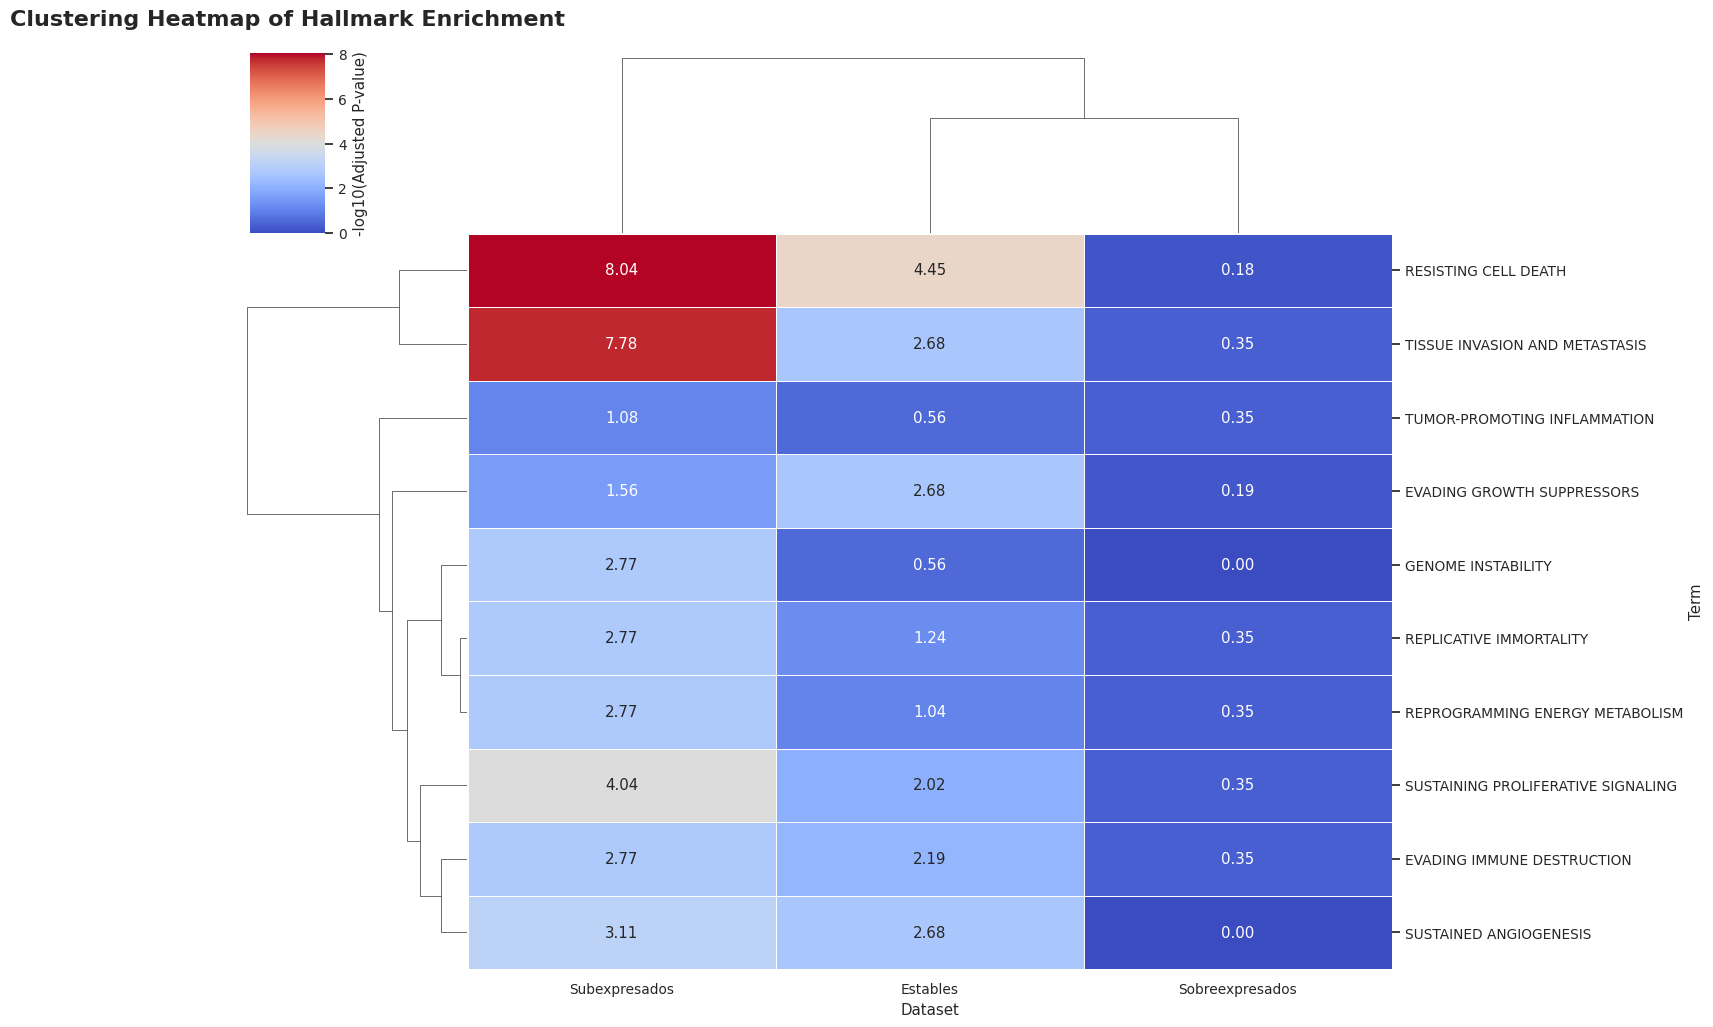

In [ ]:
# Función para preparar los datos del heatmap
def prepare_heatmap_data(datasets, labels):
    heatmap_df = pd.DataFrame()
    for data, label in zip(datasets, labels):
        data["-log10(Adjusted P-value)"] = -np.log10(data["Adjusted P-value"])
        data["Dataset"] = label
        heatmap_df = pd.concat([heatmap_df, data[["Term", "-log10(Adjusted P-value)", "Dataset"]]], axis=0)
    return heatmap_df.pivot(index="Term", columns="Dataset", values="-log10(Adjusted P-value)").fillna(0)

# Preparar los datos para el heatmap
datasets = [hallmarks_sobreexpresados, hallmarks_estables, hallmarks_subexpresados]
labels = ["Sobreexpresados", "Estables", "Subexpresados"]
heatmap_data = prepare_heatmap_data(datasets, labels)

# Crear el clustering heatmap
plt.figure(figsize=(14, 10))
sns.clustermap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    figsize=(15, 10),
    col_cluster=True,  # Clustering en las columnas (datasets)
    row_cluster=True,  # Clustering en las filas (términos de Hallmark)
    dendrogram_ratio=(0.2, 0.2),  # Relación del tamaño de los dendrogramas
    cbar_kws={"label": "-log10(Adjusted P-value)", "shrink": 0.8}
)

# Personalización del gráfico
plt.title("Clustering Heatmap of Hallmark Enrichment", fontsize=16, fontweight='bold', pad=20)
plt.show()



In [ ]:
def limpieza_hallmarks(lista):
    list_prepared = " ".join(lista)
    print(list_prepared)
    print()

limpieza_hallmarks(lista_subexpresados)
limpieza_hallmarks(lista_estables)
limpieza_hallmarks(lista_sobreexpresion)

